In [1]:
 # Import the drive module from google.colab
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.dates as mdates

In [ ]:
# Reading the CSV file
df = pd.read_csv('/content/drive/My Drive/Conflict_data/ACLED/asia_conflict_data.csv')

<ipython-input-3-ac32de8afd68>:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/My Drive/Conflict_data/ACLED/asia_conflict_data.csv')


### Data Preprocessing

In [ ]:
# Convert event_date to datetime
df['event_date'] = pd.to_datetime(df['event_date'])

# Handle missing values
df.fillna({'assoc_actor_1': 'Unknown', 'actor2': 'Unknown', 'assoc_actor_2': 'Unknown', 'civilian_targeting': 'No', 'admin1': 'Unknown', 'admin2': 'Unknown', 'admin3': 'Unknown', 'tags': 'None'}, inplace=True)

# Display the cleaned dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595723 entries, 0 to 595722
Data columns (total 31 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   event_id_cnty       595723 non-null  object        
 1   event_date          595723 non-null  datetime64[ns]
 2   year                595723 non-null  int64         
 3   time_precision      595723 non-null  int64         
 4   disorder_type       595723 non-null  object        
 5   event_type          595723 non-null  object        
 6   sub_event_type      595723 non-null  object        
 7   actor1              595723 non-null  object        
 8   assoc_actor_1       595723 non-null  object        
 9   inter1              595723 non-null  int64         
 10  actor2              595723 non-null  object        
 11  assoc_actor_2       595723 non-null  object        
 12  inter2              595723 non-null  int64         
 13  interaction         595723 no

### Summary Statistics

In [ ]:
# Summary statistics
summary = df.describe(include='all')
summary

event_id_cnty                     event_date           year  \
count         595723                         595723  595723.000000   
unique        595723                            NaN            NaN   
top         BGD27535                            NaN            NaN   
freq               1                            NaN            NaN   
mean             NaN  2019-12-12 06:27:52.566611712    2019.461122   
min              NaN            2010-01-01 00:00:00    2010.000000   
25%              NaN            2018-05-05 00:00:00    2018.000000   
50%              NaN            2020-06-12 00:00:00    2020.000000   
75%              NaN            2022-05-26 00:00:00    2022.000000   
max              NaN            2024-06-28 00:00:00    2024.000000   
std              NaN                            NaN       3.213654   

        time_precision   disorder_type event_type    sub_event_type  \
count     595723.00000          595723     595723            595723   
unique             NaN               4          6                25   
top                NaN  Demonstrations   Protests  Peaceful protest   
freq               NaN          353481     335925            320705   
mean           1.06949             NaN        NaN               NaN   
min            1.00000             NaN        NaN               NaN   
25%            1.00000             NaN        NaN               NaN   
50%            1.00000             NaN        NaN               NaN   
75%            1.00000             NaN        NaN               NaN   
max            3.00000             NaN        NaN               NaN   
std            0.26579             NaN        NaN               NaN   

                    actor1 assoc_actor_1         inter1  ...   location  \
count               595723        595723  595723.000000  ...     595723   
unique                4763         28541            NaN  ...      43809   
top     Protesters (India)       Unknown            NaN  ...  Hyderabad   
freq                120651        299252            NaN  ...       6627   
mean                   NaN           NaN       4.563992  ...        NaN   
min                    NaN           NaN       1.000000  ...        NaN   
25%                    NaN           NaN       2.000000  ...        NaN   
50%                    NaN           NaN       6.000000  ...        NaN   
75%                    NaN           NaN       6.000000  ...        NaN   
max                    NaN           NaN       8.000000  ...        NaN   
std                    NaN           NaN       2.052427  ...        NaN   

             latitude      longitude  geo_precision  \
count   595723.000000  595723.000000  595723.000000   
unique            NaN            NaN            NaN   
top               NaN            NaN            NaN   
freq              NaN            NaN            NaN   
mean        26.356386      85.523293       1.328136   
min        -10.732300      40.271300       1.000000   
25%         22.277600      70.324600       1.000000   
50%         27.183300      79.655000       1.000000   
75%         33.786750      96.096900       2.000000   
max         54.976100     175.252200       3.000000   
std         10.014089      21.360356       0.519511   

                                 source  source_scale  \
count                            595723        595723   
unique                            23242            26   
top     Daily Regional Times (Pakistan)      National   
freq                              27172        370870   
mean                                NaN           NaN   
min                                 NaN           NaN   
25%                                 NaN           NaN   
50%                                 NaN           NaN   
75%                                 NaN           NaN   
max                                 NaN           NaN   
std                                 NaN           NaN   

                                                    notes     fata

### Visualization

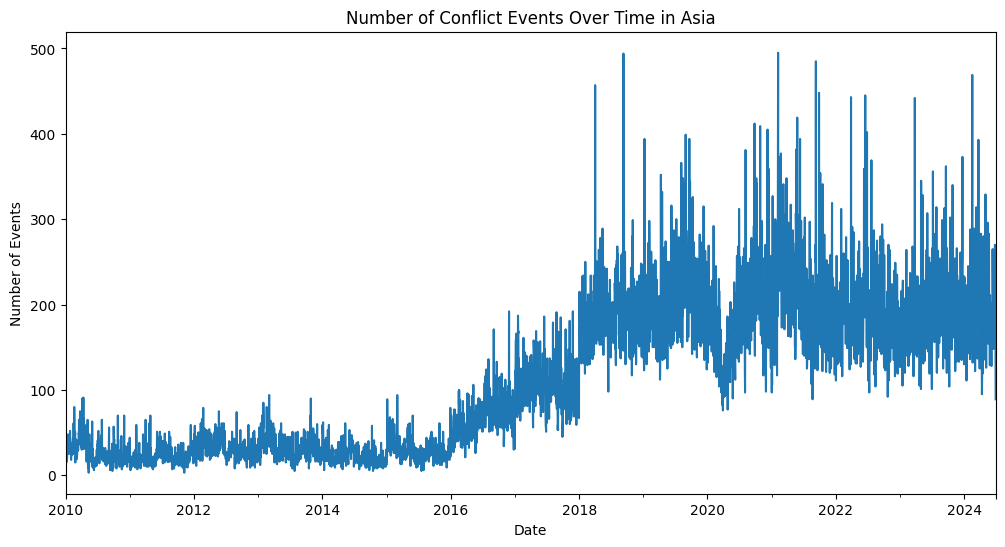

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Number of events over time
plt.figure(figsize=(12, 6))
df['event_date'].value_counts().sort_index().plot()
plt.title('Number of Conflict Events Over Time in Asia')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.show()

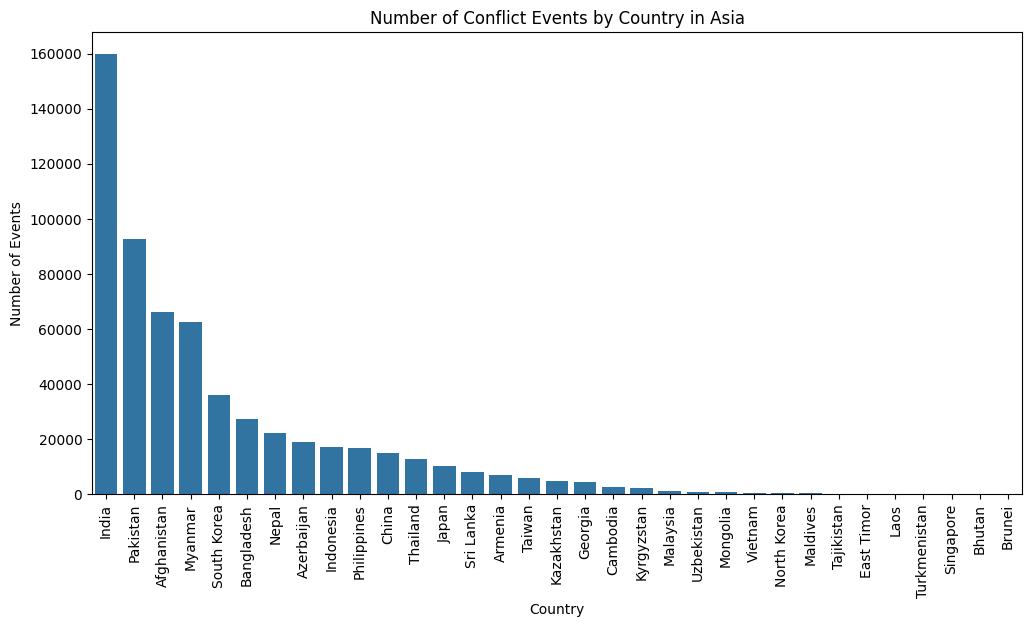

In [ ]:
# Number of events by country
plt.figure(figsize=(12, 6))
country_event_count = df['country'].value_counts()
sns.barplot(x=country_event_count.index, y=country_event_count.values)
plt.title('Number of Conflict Events by Country in Asia')
plt.xlabel('Country')
plt.ylabel('Number of Events')
plt.xticks(rotation=90)
plt.show()

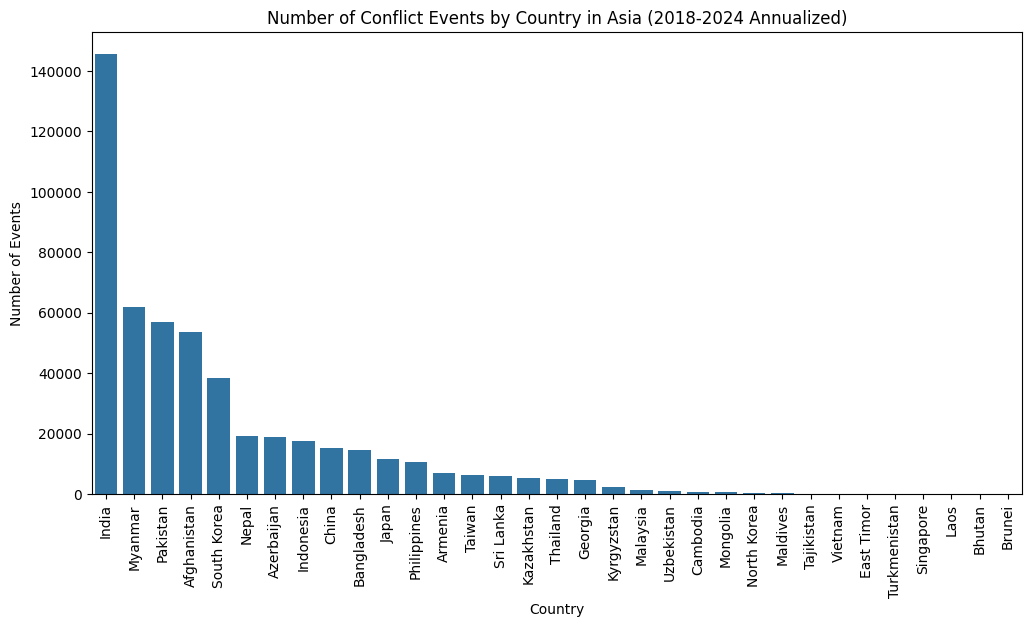

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the dataset for data from 2018 onwards
df_filtered = df[df['year'] >= 2018]

# Count the events per country for each year
event_counts = df_filtered.groupby(['year', 'country']).size().reset_index(name='event_count')

# Annualize the 2024 data
if 2024 in event_counts['year'].unique():
    event_counts_2024 = event_counts[event_counts['year'] == 2024].copy()
    event_counts_2024['event_count'] = (event_counts_2024['event_count'] / 6) * 12
    event_counts = event_counts[event_counts['year'] != 2024]
    event_counts = pd.concat([event_counts, event_counts_2024])

# Aggregate the event counts by country
country_event_count = event_counts.groupby('country')['event_count'].sum()

# Sort the countries by event count in descending order
country_event_count = country_event_count.sort_values(ascending=False)

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x=country_event_count.index, y=country_event_count.values)
plt.title('Number of Conflict Events by Country in Asia (2018-2024 Annualized)')
plt.xlabel('Country')
plt.ylabel('Number of Events')
plt.xticks(rotation=90)
plt.show()

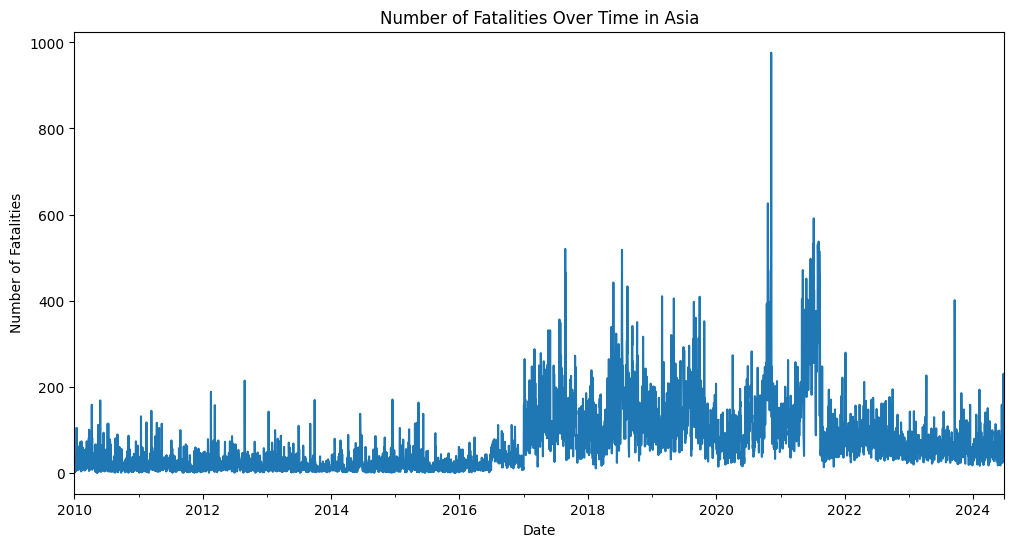

In [ ]:
# Number of fatalities over time
plt.figure(figsize=(12, 6))
df.groupby('event_date')['fatalities'].sum().plot()
plt.title('Number of Fatalities Over Time in Asia')
plt.xlabel('Date')
plt.ylabel('Number of Fatalities')
plt.show()

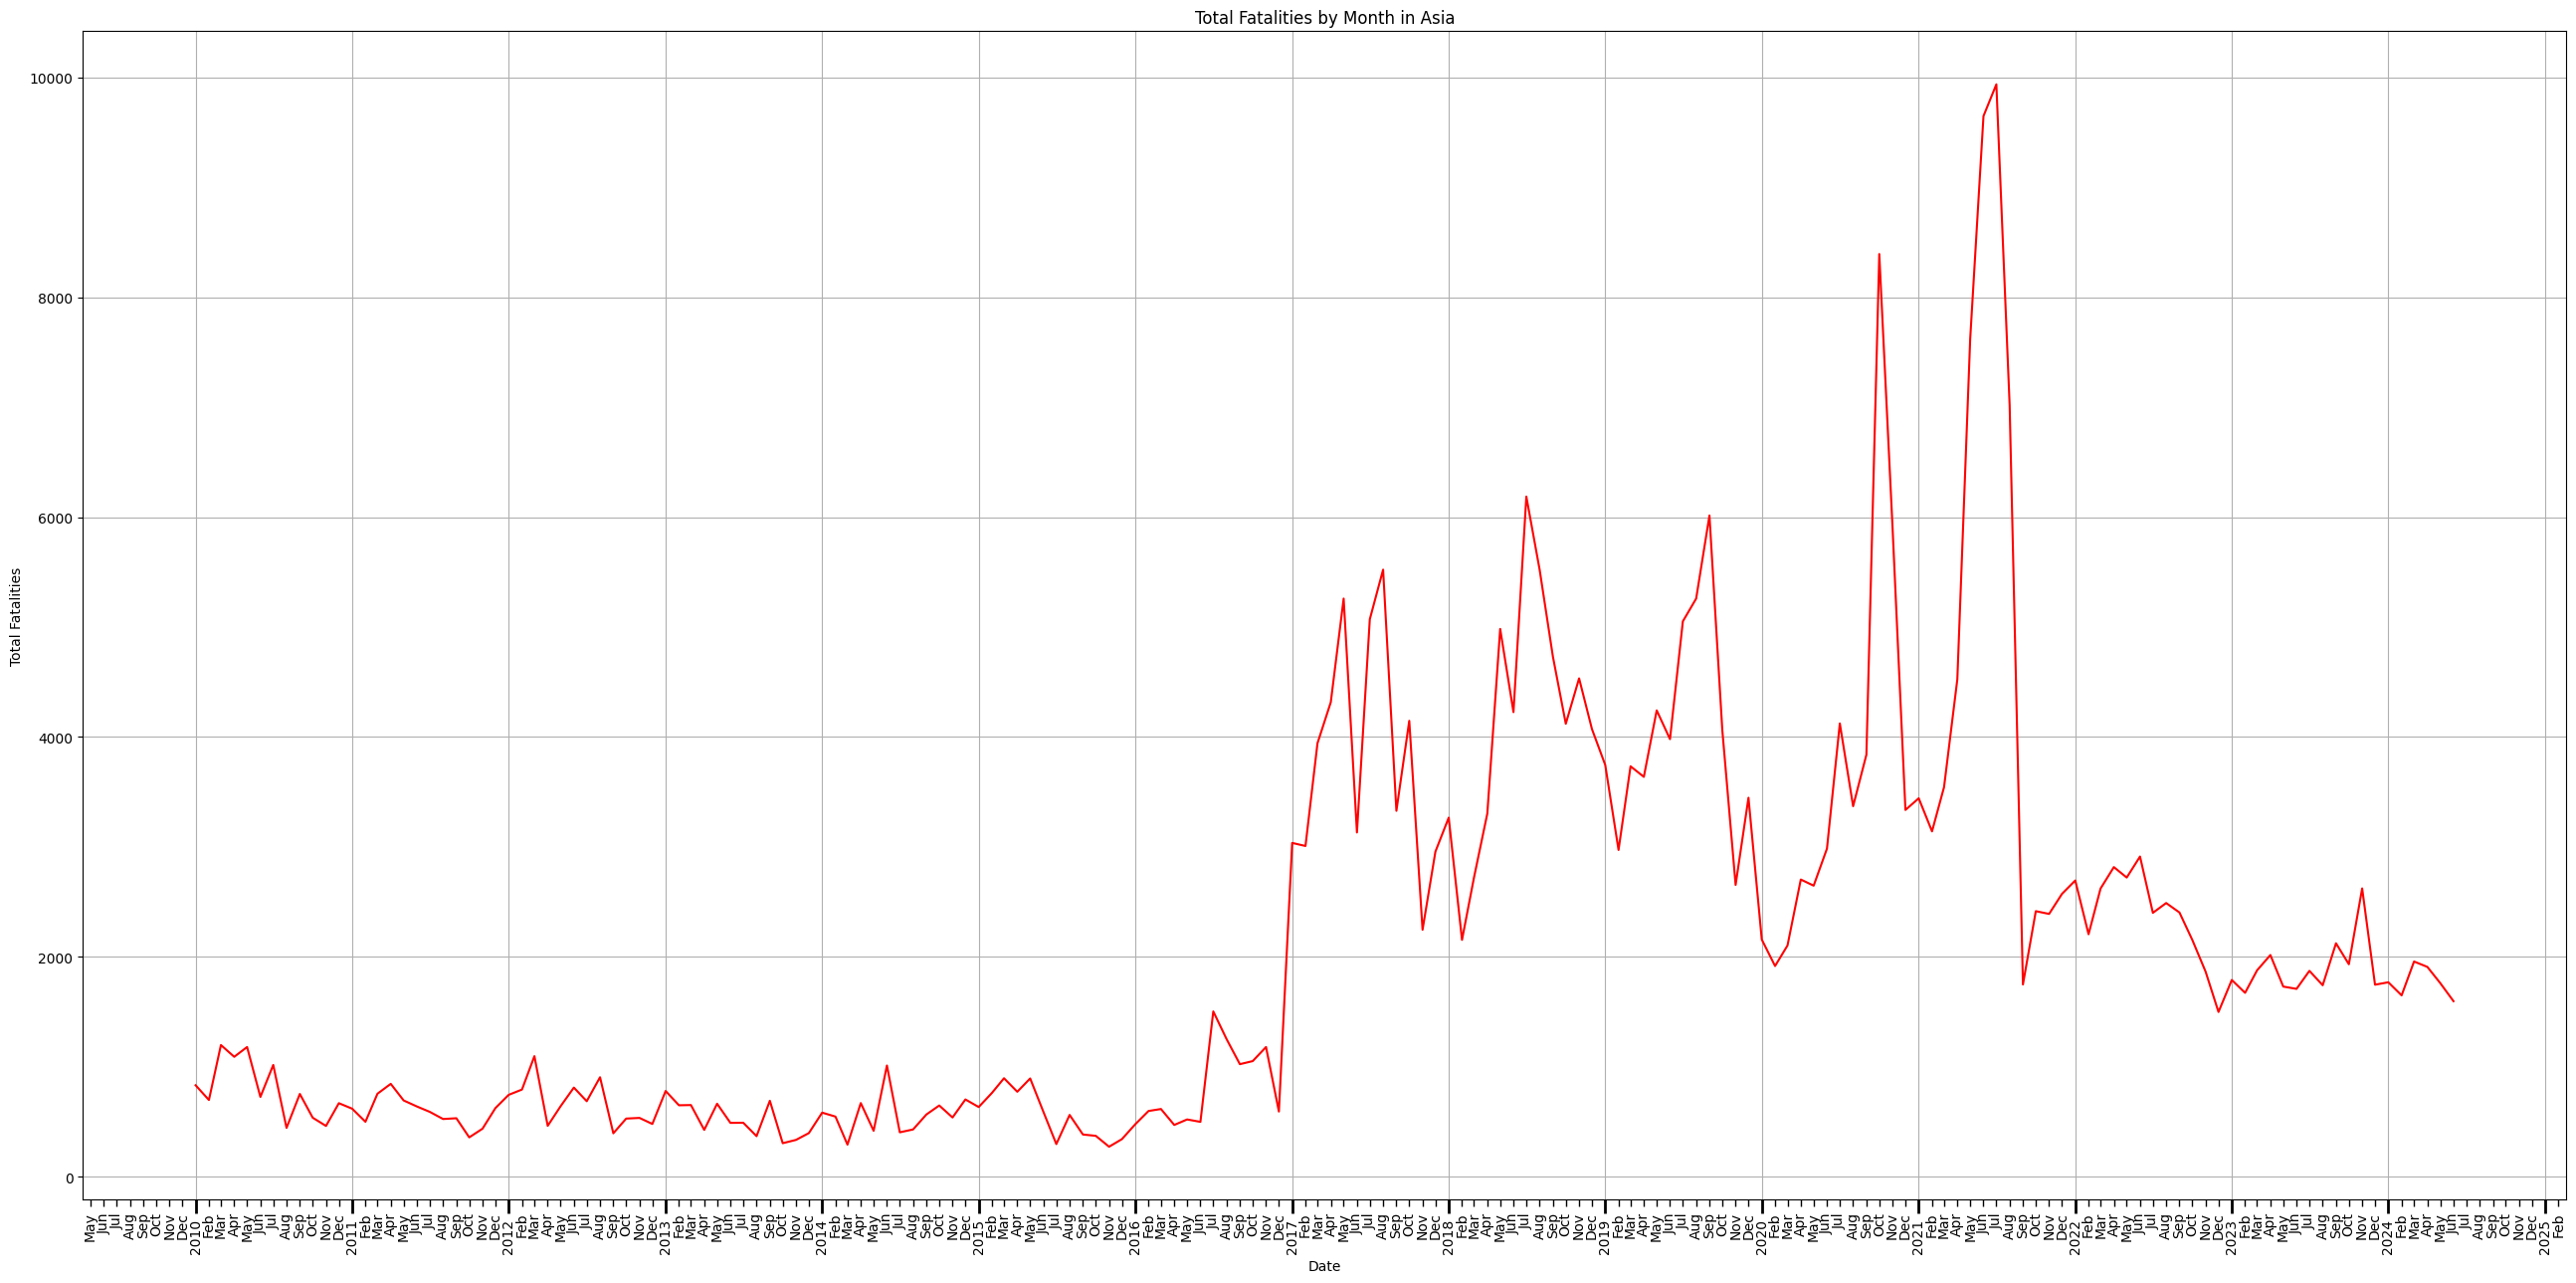

In [ ]:
# Number of fatalities over time by month
# Create a new column for the month
df['year_month'] = df['event_date'].dt.to_period('M')

# Group by year_month to get monthly data
monthly_data = df.groupby('year_month')['fatalities'].sum().reset_index()

# Ensure 'year_month' is in datetime format
monthly_data['year_month'] = monthly_data['year_month'].astype(str) + '-01'
monthly_data['year_month'] = pd.to_datetime(monthly_data['year_month'])

# Set 'year_month' as the index
monthly_data.set_index('year_month', inplace=True)

# Plotting the data with months and years on the x-axis
fig, ax = plt.subplots(figsize=(26, 13))
ax.plot(monthly_data.index, monthly_data['fatalities'], color='red')
ax.set_title('Total Fatalities by Month in Asia')
ax.set_xlabel('Date')
ax.set_ylabel('Total Fatalities')
ax.grid(True)

# Set major and minor ticks format
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))

# Customize the appearance of ticks
ax.tick_params(axis='x', which='major', length=10, width=2)
ax.tick_params(axis='x', which='minor', length=5, width=1)

# Rotate the month and year labels vertically
for label in ax.get_xticklabels(which='minor'):
    label.set_rotation(90)
    label.set_horizontalalignment('center')

for label in ax.get_xticklabels(which='major'):
    label.set_rotation(90)
    label.set_horizontalalignment('center')

fig.tight_layout()
plt.show()

### Total Fatalities by Top 5 Actor 1 Categories

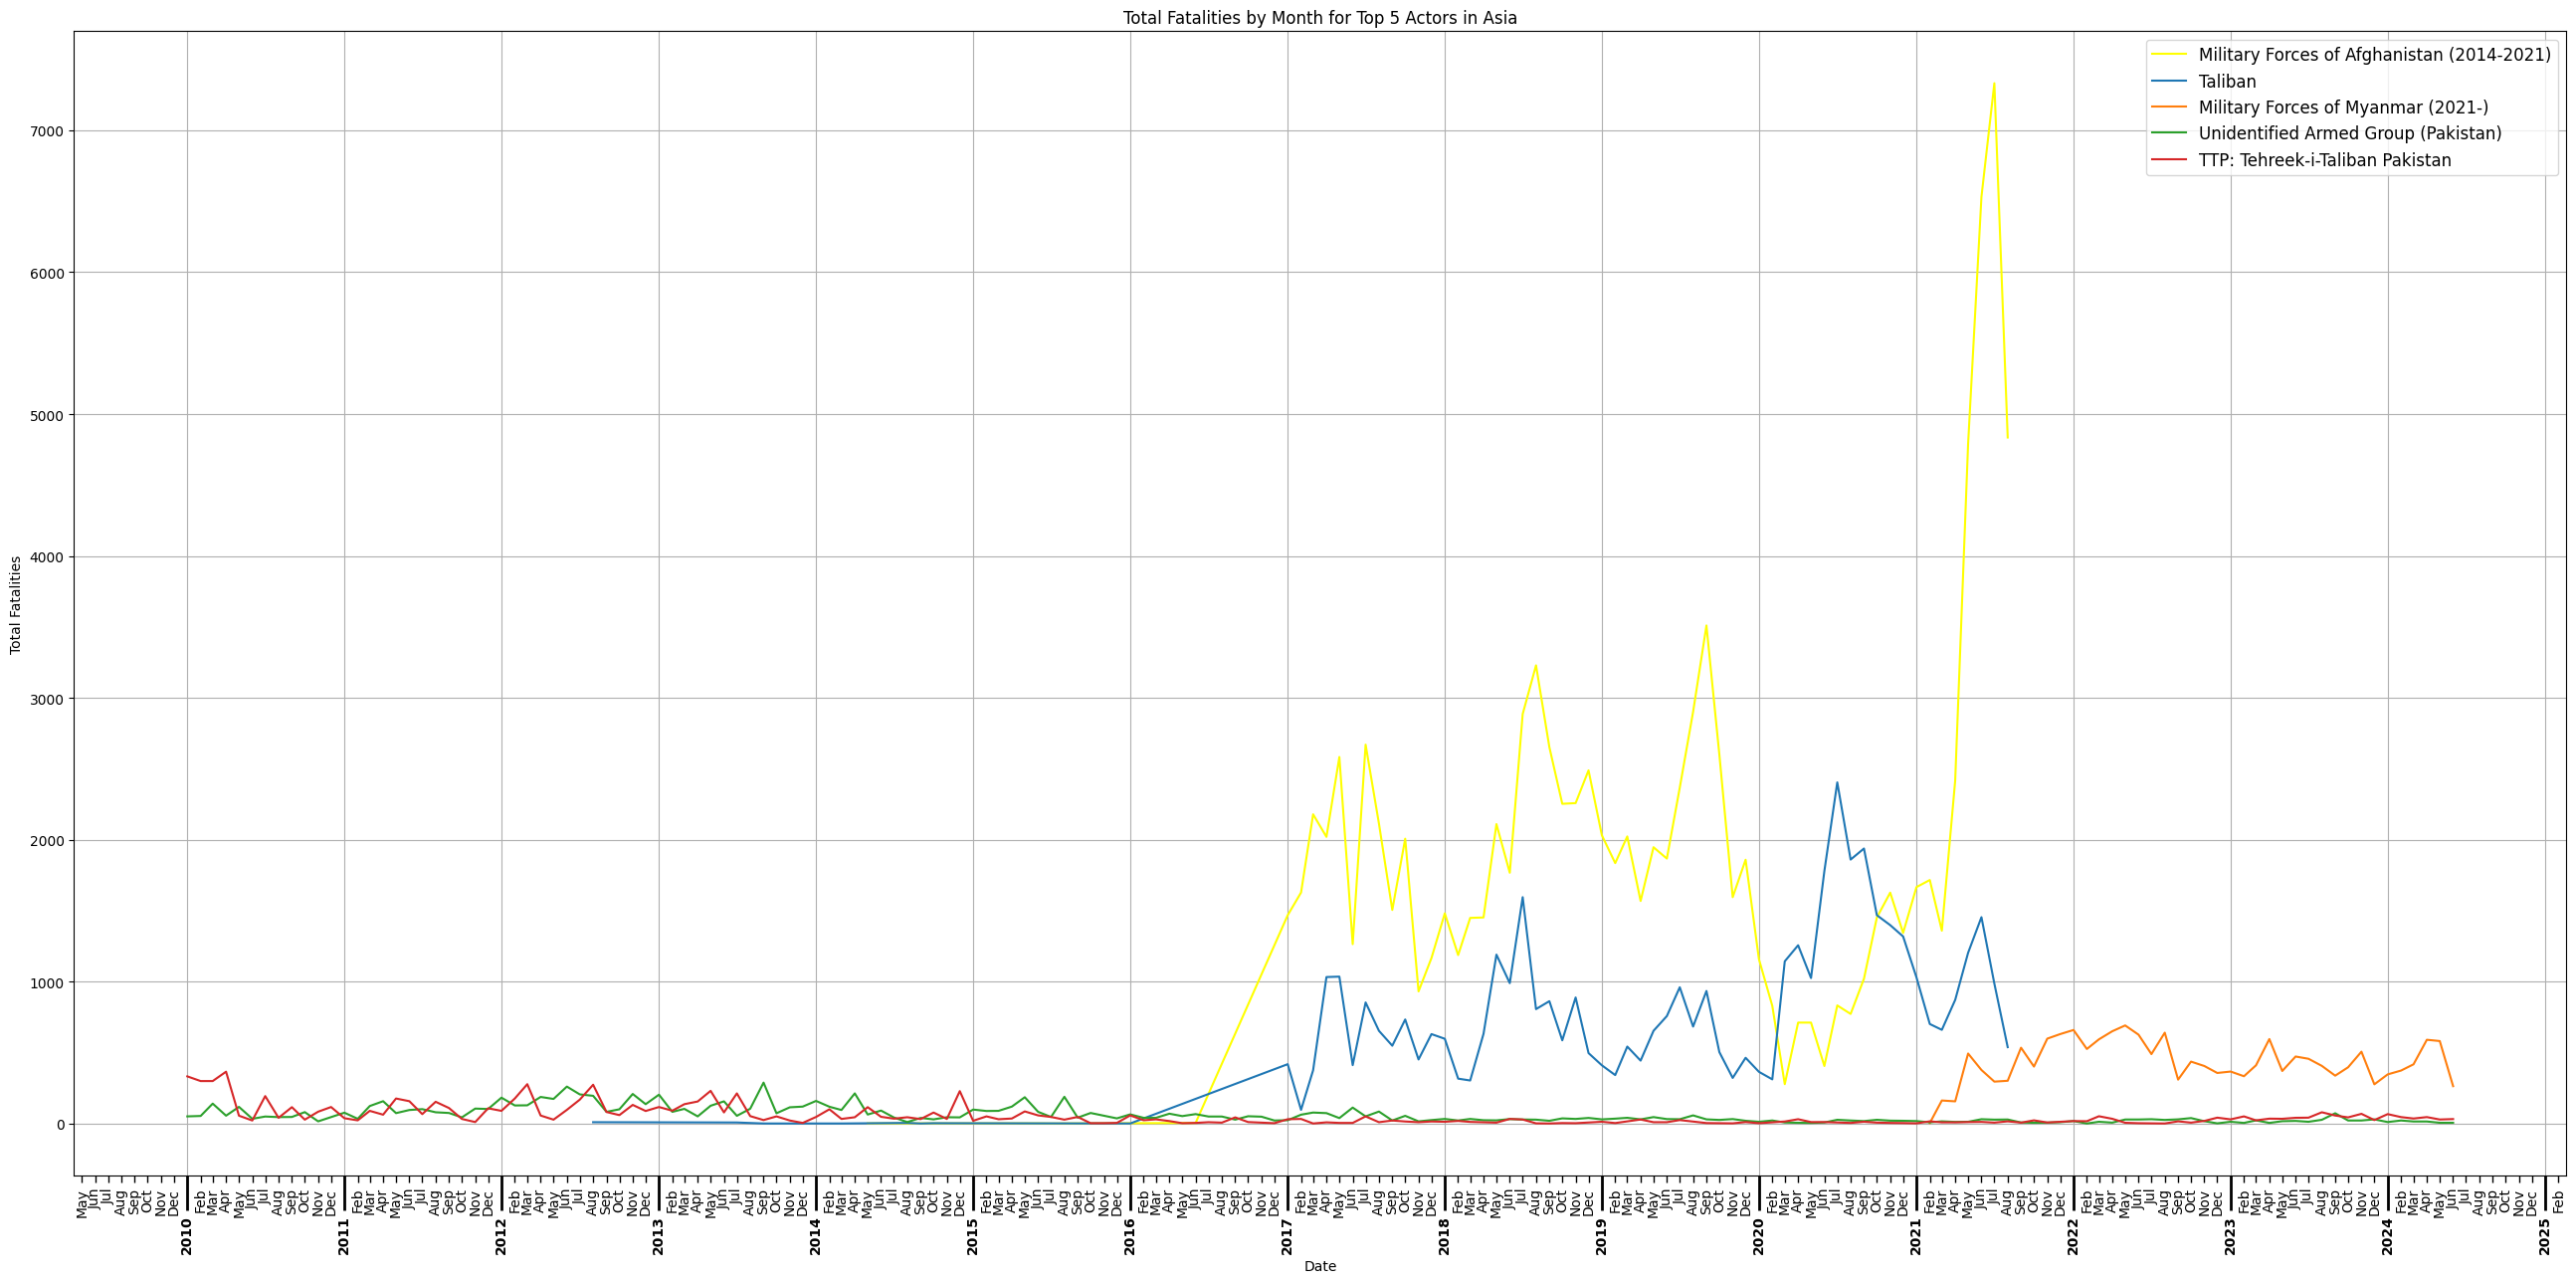

In [ ]:
# Identify the top five actor1 categories based on total fatalities
top_actors = df.groupby('actor1')['fatalities'].sum().nlargest(5).index

# Filter the data to include only the top five actor1 categories
top_actors_data = df[df['actor1'].isin(top_actors)]

# Group the data by actor1 and year_month to calculate total fatalities
actor_monthly_data = top_actors_data.groupby(['actor1', 'year_month'])['fatalities'].sum().reset_index()

# Ensure 'year_month' is in datetime format
actor_monthly_data['year_month'] = actor_monthly_data['year_month'].astype(str) + '-01'
actor_monthly_data['year_month'] = pd.to_datetime(actor_monthly_data['year_month'])

# Plotting the data with fatalities broken out by top five actor1 categories
fig, ax = plt.subplots(figsize=(26, 13))

# Plot each actor1 category
for actor in top_actors:
    actor_data = actor_monthly_data[actor_monthly_data['actor1'] == actor]
    color = 'yellow' if actor == 'Military Forces of Afghanistan (2014-2021)' else None
    ax.plot(actor_data['year_month'], actor_data['fatalities'], label=actor, color=color)

ax.set_title('Total Fatalities by Month for Top 5 Actors in Asia')
ax.set_xlabel('Date')
ax.set_ylabel('Total Fatalities')
ax.grid(True)

# Set major and minor ticks format
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))

# Customize the appearance of ticks
ax.tick_params(axis='x', which='major', length=25, width=2)
ax.tick_params(axis='x', which='minor', length=5, width=1)

# Rotate the month and year labels vertically
for label in ax.get_xticklabels(which='minor'):
    label.set_rotation(90)
    label.set_horizontalalignment('center')

for label in ax.get_xticklabels(which='major'):
    label.set_rotation(90)
    label.set_horizontalalignment('center')
    label.set_fontweight('bold')

# Increase the size of the legend
ax.legend(loc='upper right', fontsize='large')
fig.tight_layout()
plt.show()

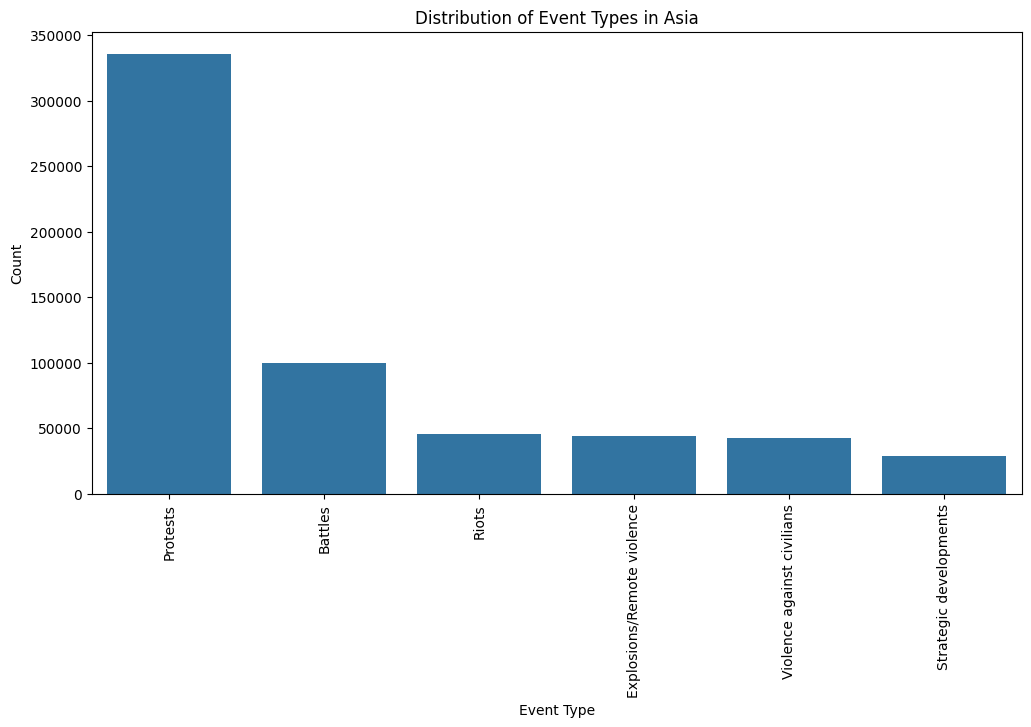

In [ ]:
# Distribution of event types
plt.figure(figsize=(12, 6))
event_type_count = df['event_type'].value_counts()
sns.barplot(x=event_type_count.index, y=event_type_count.values)
plt.title('Distribution of Event Types in Asia')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

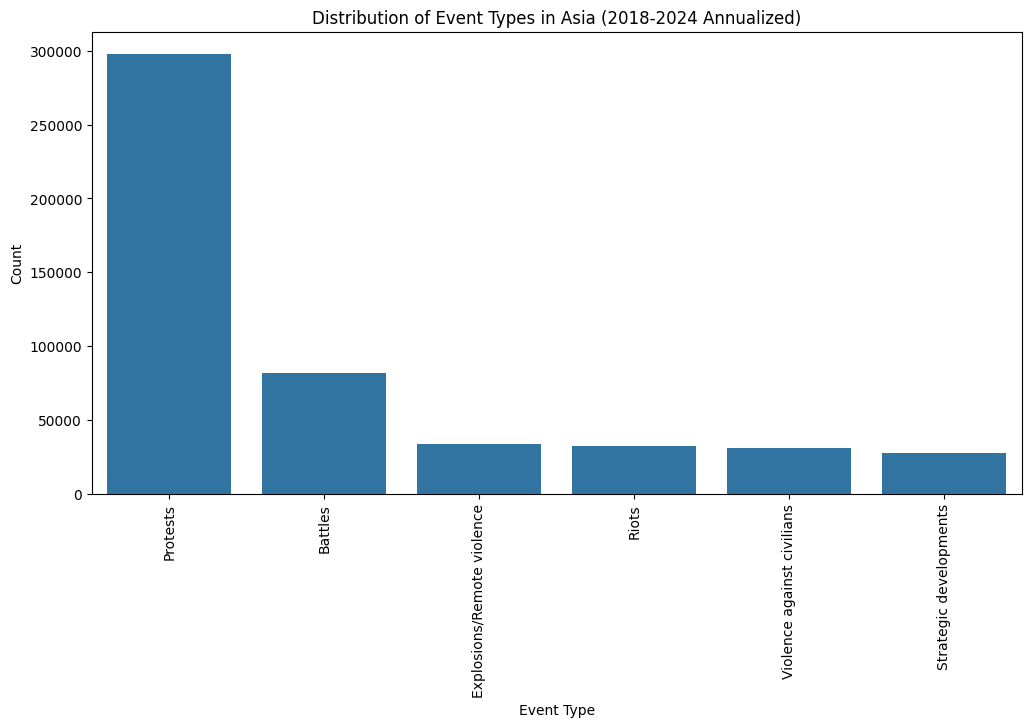

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the dataset for data from 2018 onwards
df_filtered = df[df['year'] >= 2018]

# Count the event types for each year
event_type_counts = df_filtered.groupby(['year', 'event_type']).size().reset_index(name='event_count')

# Annualize the 2024 data
if 2024 in event_type_counts['year'].unique():
    event_type_counts_2024 = event_type_counts[event_type_counts['year'] == 2024].copy()
    event_type_counts_2024['event_count'] = (event_type_counts_2024['event_count'] / 6) * 12
    event_type_counts = event_type_counts[event_type_counts['year'] != 2024]
    event_type_counts = pd.concat([event_type_counts, event_type_counts_2024])

# Aggregate the event counts by event type
event_type_count = event_type_counts.groupby('event_type')['event_count'].sum()

# Sort the event types by count in descending order
event_type_count = event_type_count.sort_values(ascending=False)

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x=event_type_count.index, y=event_type_count.values)
plt.title('Distribution of Event Types in Asia (2018-2024 Annualized)')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

#### Trend chart showing the number of riot events by Asian countries over the years

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Load the dataset
data = pd.read_csv('/content/drive/My Drive/Conflict_data/ACLED/asia_conflict_data.csv')

# Filter the dataset for BRiot Violence
riot_violence_data = data[data['event_type'].isin(['Riots'])]

# Group by country and year to get the count of events
riot_violence_by_country = riot_violence_data.groupby(['year', 'country']).size().unstack(fill_value=0)

# Annualize 2024 data
if 2024 in riot_violence_by_country.index:
    riot_violence_by_country.loc[2024] = (riot_violence_by_country.loc[2024] / 6) * 12

# Create a line chart to show the trend of riot events by country
plt.figure(figsize=(14, 8))
for country in riot_violence_by_country.columns:
    plt.plot(riot_violence_by_country.index, riot_violence_by_country[country], marker='o', label=country)

# Modify the x-axis tick labels
xticks_labels = riot_violence_by_country.index.tolist()
xticks_labels = [str(label) for label in xticks_labels]
if '2024' in xticks_labels:
    xticks_labels[xticks_labels.index('2024')] = '2024\nAnnualized'

plt.xticks(ticks=riot_violence_by_country.index, labels=xticks_labels)

plt.title('Trend of Riot Events by Country')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Load the dataset
data = pd.read_csv('/content/drive/My Drive/Conflict_data/ACLED/asia_conflict_data.csv')

# Filter the dataset for Riot Violence
riot_violence_data = data[data['event_type'].isin(['Riots'])]

# Group by country and year to get the count of events
riot_violence_by_country = riot_violence_data.groupby(['year', 'country']).size().unstack(fill_value=0)

# Annualize 2024 data
if 2024 in riot_violence_by_country.index:
    riot_violence_by_country.loc[2024] = (riot_violence_by_country.loc[2024] / 6) * 12

# Sort the 2024 data in descending order to get the countries with the highest riot events
if 2024 in riot_violence_by_country.index:
    highest_riot_events_2024 = riot_violence_by_country.loc[2024].sort_values(ascending=False).head(5)
    print("Top 5 countries with the highest riot events for 2024 (annualized):")
    print(highest_riot_events_2024)
else:
    print("No data available for 2024.")

<ipython-input-3-f3dd35327641>:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/My Drive/Conflict_data/ACLED/asia_conflict_data.csv')


Top 5 countries with the highest riot events for 2024 (annualized):
country
India         2826
Bangladesh     782
Pakistan       374
Indonesia      258
Nepal          258
Name: 2024, dtype: int64


In [ ]:
# Load the dataset
#data = pd.read_csv('/content/drive/My Drive/Conflict_data/ACLED/asia_conflict_data.csv')

# Filter the dataset for Protest Violence
protest_violence_data = data[data['event_type'].isin(['Protests'])]

# Group by country and year to get the count of events
protest_violence_by_country = protest_violence_data.groupby(['year', 'country']).size().unstack(fill_value=0)

# Annualize 2024 data
if 2024 in protest_violence_by_country.index:
    protest_violence_by_country.loc[2024] = (protest_violence_by_country.loc[2024] / 6) * 12

# Sort the 2024 data in descending order to get the countries with the highest protest events
if 2024 in protest_violence_by_country.index:
    highest_protest_events_2024 = protest_violence_by_country.loc[2024].sort_values(ascending=False).head(5)
    print("Top 5 countries with the highest protest events for 2024 (annualized):")
    print(highest_protest_events_2024)
else:
    print("No data available for 2024.")

Top 5 countries with the highest protest events for 2024 (annualized):
country
India          19426
Pakistan        6662
South Korea     5188
Indonesia       2842
Japan           2172
Name: 2024, dtype: int64


#### Trend chart showing the number of battle events by Asian countries over the years

<ipython-input-26-85669b22c8bd>:6: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/My Drive/Conflict_data/ACLED/asia_conflict_data.csv')


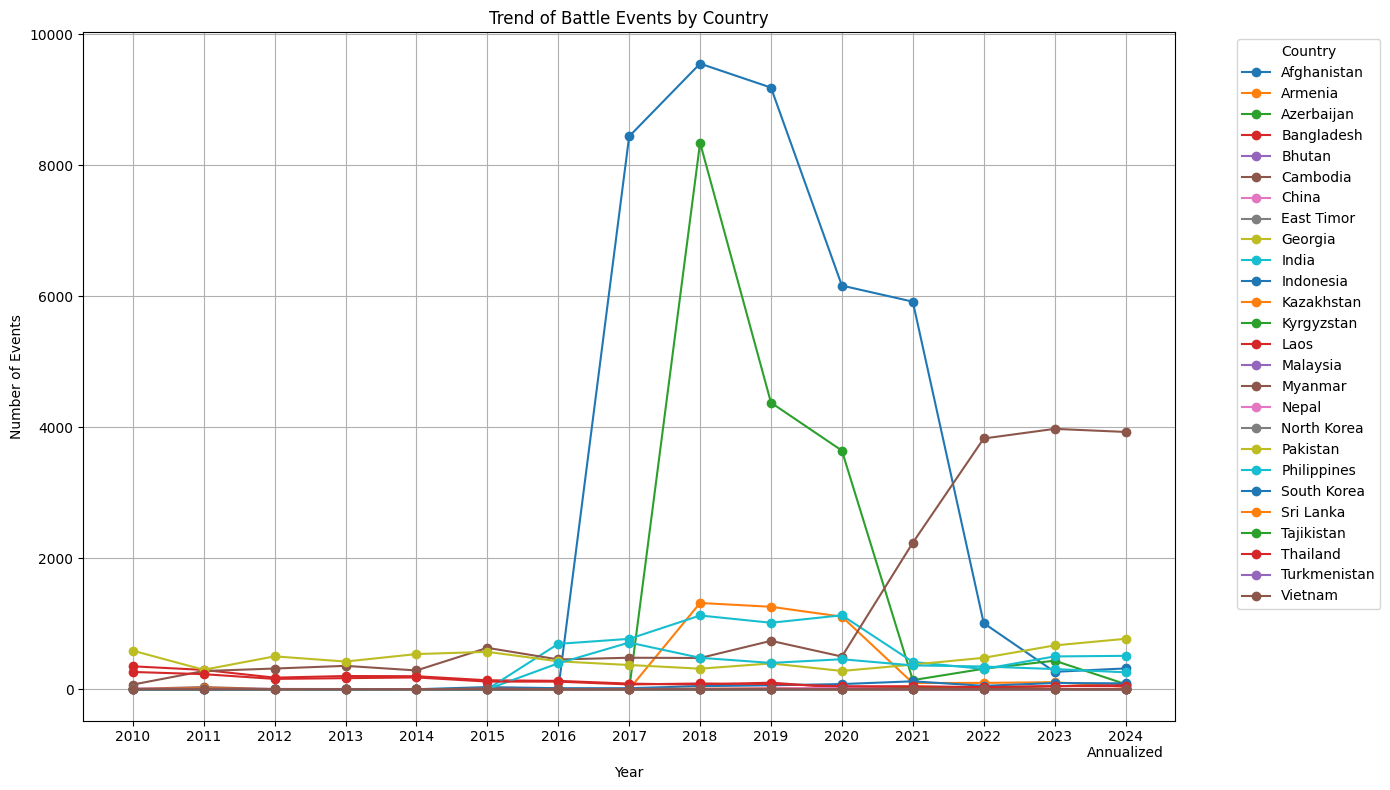

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Load the dataset
data = pd.read_csv('/content/drive/My Drive/Conflict_data/ACLED/asia_conflict_data.csv')

# Filter the dataset for Battle Violence
battle_violence_data = data[data['event_type'].isin(['Battles'])]

# Group by country and year to get the count of events
battle_violence_by_country = battle_violence_data.groupby(['year', 'country']).size().unstack(fill_value=0)

# Annualize 2024 data
if 2024 in battle_violence_by_country.index:
    battle_violence_by_country.loc[2024] = (battle_violence_by_country.loc[2024] / 6) * 12

# Create a line chart to show the trend of battle events by country
plt.figure(figsize=(14, 8))
for country in battle_violence_by_country.columns:
    plt.plot(battle_violence_by_country.index, battle_violence_by_country[country], marker='o', label=country)

# Modify the x-axis tick labels
xticks_labels = battle_violence_by_country.index.tolist()
xticks_labels = [str(label) for label in xticks_labels]
if '2024' in xticks_labels:
    xticks_labels[xticks_labels.index('2024')] = '2024\nAnnualized'

plt.xticks(ticks=battle_violence_by_country.index, labels=xticks_labels)

plt.title('Trend of Battle Events by Country')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Filter the dataset for Battle Violence
battle_violence_data = data[data['event_type'].isin(['Battles'])]

# Group by country and year to get the count of events
battle_violence_by_country = battle_violence_data.groupby(['year', 'country']).size().unstack(fill_value=0)

# Annualize 2024 data
if 2024 in battle_violence_by_country.index:
    battle_violence_by_country.loc[2024] = (battle_violence_by_country.loc[2024] / 6) * 12

# Sort the 2024 data in descending order to get the countries with the highest battle events
if 2024 in battle_violence_by_country.index:
    highest_battle_events_2024 = battle_violence_by_country.loc[2024].sort_values(ascending=False).head(5)
    print("Top 5 countries with the highest battle events for 2024 (annualized):")
    print(highest_battle_events_2024)
else:
    print("No data available for 2024.")

<ipython-input-27-d010609c833a>:5: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/My Drive/Conflict_data/ACLED/asia_conflict_data.csv')


Top 5 countries with the highest battle events for 2024 (annualized):
country
Myanmar        3928
Pakistan        770
India           510
Afghanistan     318
Philippines     258
Name: 2024, dtype: int64


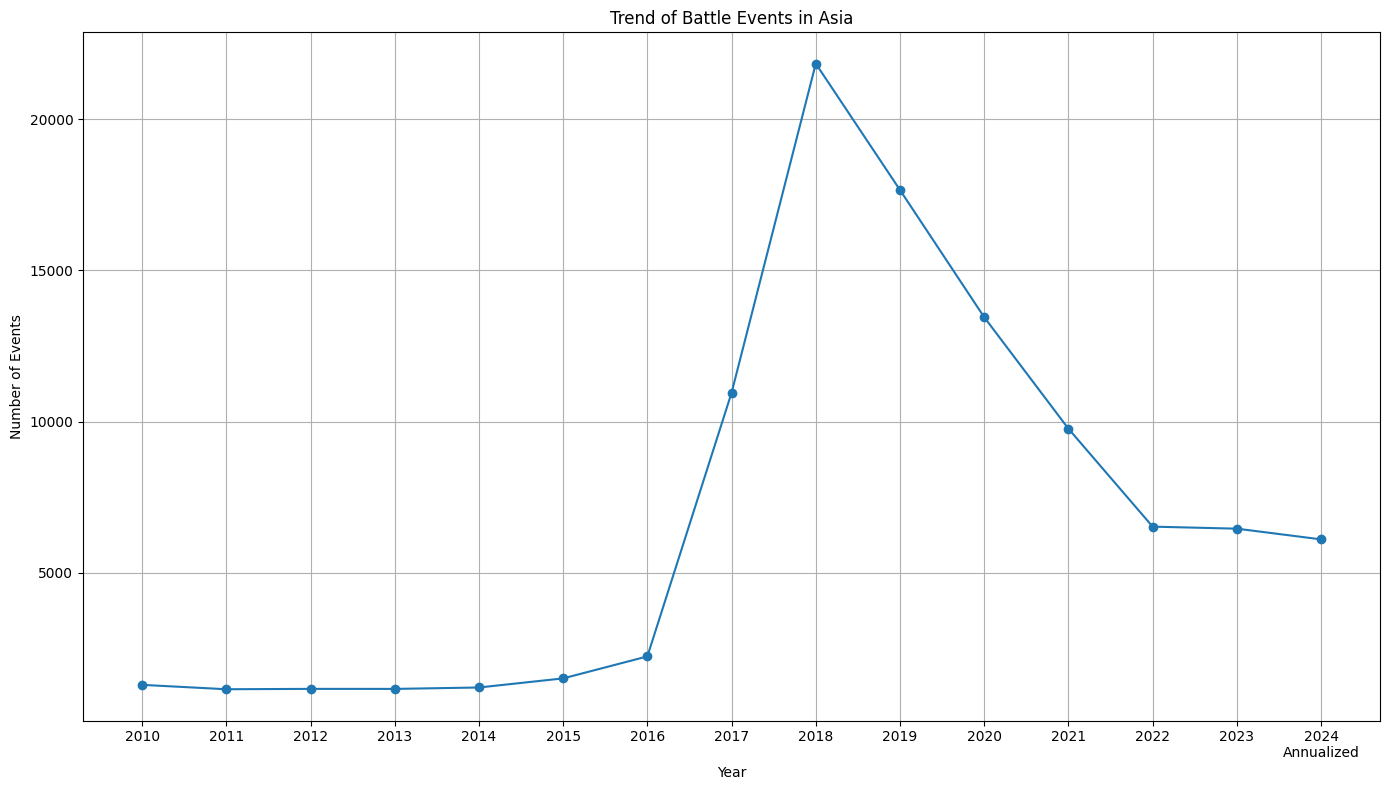

In [ ]:
# Filter the dataset for Battle Violence
battle_violence_data = df[df['event_type'].isin(['Battles'])]

# Group by year to get the count of events for the whole of Asia
battle_by_year = battle_violence_data.groupby('year').size()

# Annualize 2024 data
if 2024 in battle_by_year.index:
    battle_by_year.loc[2024] = (battle_by_year.loc[2024] / 6) * 12

plt.figure(figsize=(14, 8))
plt.plot(battle_by_year.index, battle_by_year, marker='o')

# Modify the x-axis tick labels
xticks_labels = battle_by_year.index.tolist()
xticks_labels = [str(label) for label in xticks_labels]
if '2024' in xticks_labels:
    xticks_labels[xticks_labels.index('2024')] = '2024\nAnnualized'

plt.xticks(ticks=battle_by_year.index, labels=xticks_labels)

plt.title('Trend of Battle Events in Asia')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

#### Trend chart showing the number of political violence events by Asian countries over the years

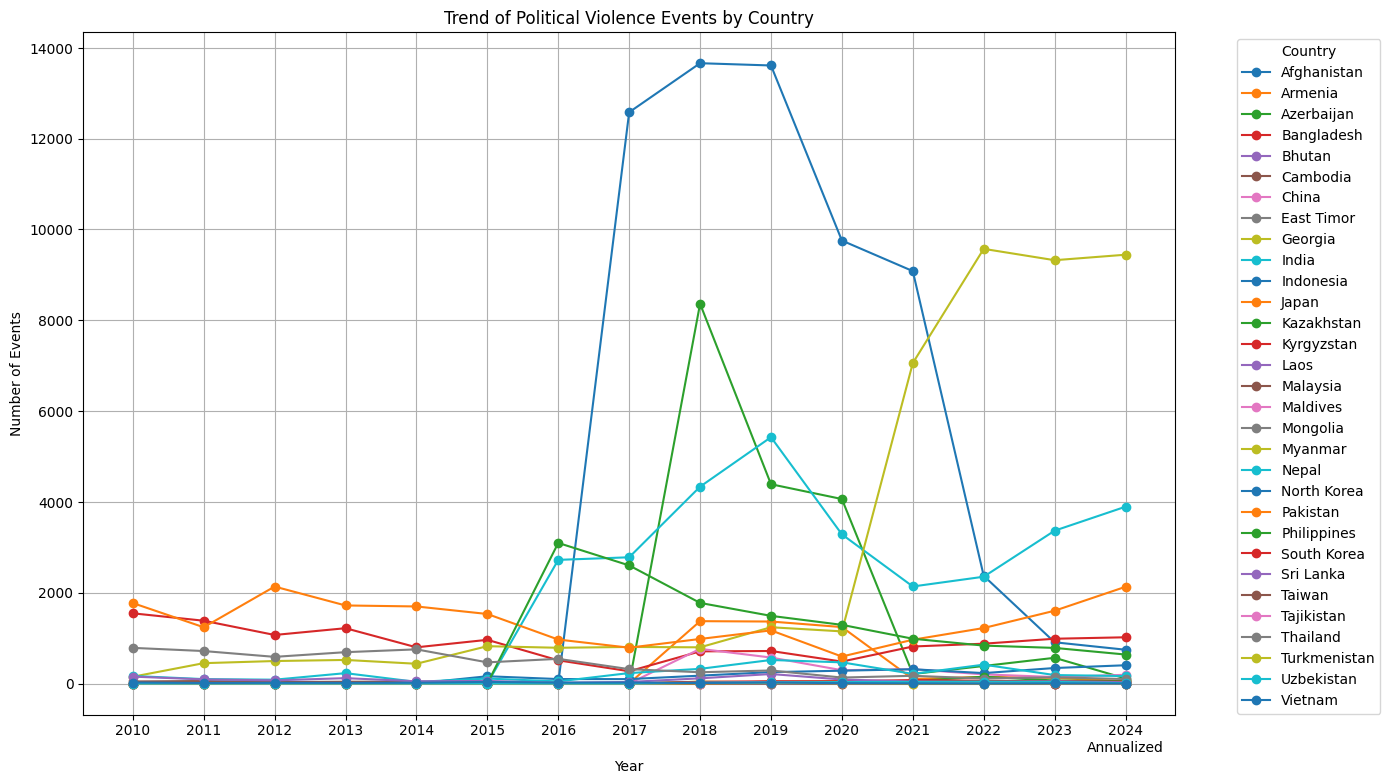

In [ ]:
# Filter the dataset for Political Violence
political_violence_data = df[df['disorder_type'].isin(['Political violence', 'Political violence; Demonstrations'])]

# Group by country and year to get the count of events
political_violence_by_country = political_violence_data.groupby(['year', 'country']).size().unstack(fill_value=0)

# Annualize 2024 data
if 2024 in political_violence_by_country.index:
    political_violence_by_country.loc[2024] = (political_violence_by_country.loc[2024] / 6) * 12

# Create a line chart to show the trend of political violence events by country
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
for country in political_violence_by_country.columns:
    plt.plot(political_violence_by_country.index, political_violence_by_country[country], marker='o', label=country)

# Modify the x-axis tick labels
xticks_labels = political_violence_by_country.index.tolist()
xticks_labels = [str(label) for label in xticks_labels]
if '2024' in xticks_labels:
    xticks_labels[xticks_labels.index('2024')] = '2024\nAnnualized'

plt.xticks(ticks=political_violence_by_country.index, labels=xticks_labels)

plt.title('Trend of Political Violence Events by Country')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Filter the dataset for Battle Violence
political_violence_data = df[df['disorder_type'].isin(['Political violence', 'Political violence; Demonstrations'])]

# Group by country and year to get the count of events
political_violence_by_country = political_violence_data.groupby(['year', 'country']).size().unstack(fill_value=0)

# Annualize 2024 data
if 2024 in political_violence_by_country.index:
    political_violence_by_country.loc[2024] = (political_violence_by_country.loc[2024] / 6) * 12

# Sort the 2024 data in descending order to get the countries with the highest battle events
if 2024 in political_violence_by_country.index:
    highest_political_violence_events_2024 = political_violence_by_country.loc[2024].sort_values(ascending=False).head(5)
    print("Top 5 countries with the highest political violence events for 2024 (annualized):")
    print(highest_political_violence_events_2024)
else:
    print("No data available for 2024.")

Top 5 countries with the highest political violence events for 2024 (annualized):
country
Myanmar        9444
India          3894
Pakistan       2130
Bangladesh     1018
Afghanistan     744
Name: 2024, dtype: int64


#### Trend of political violence and demonstrations events in Asia as a whole

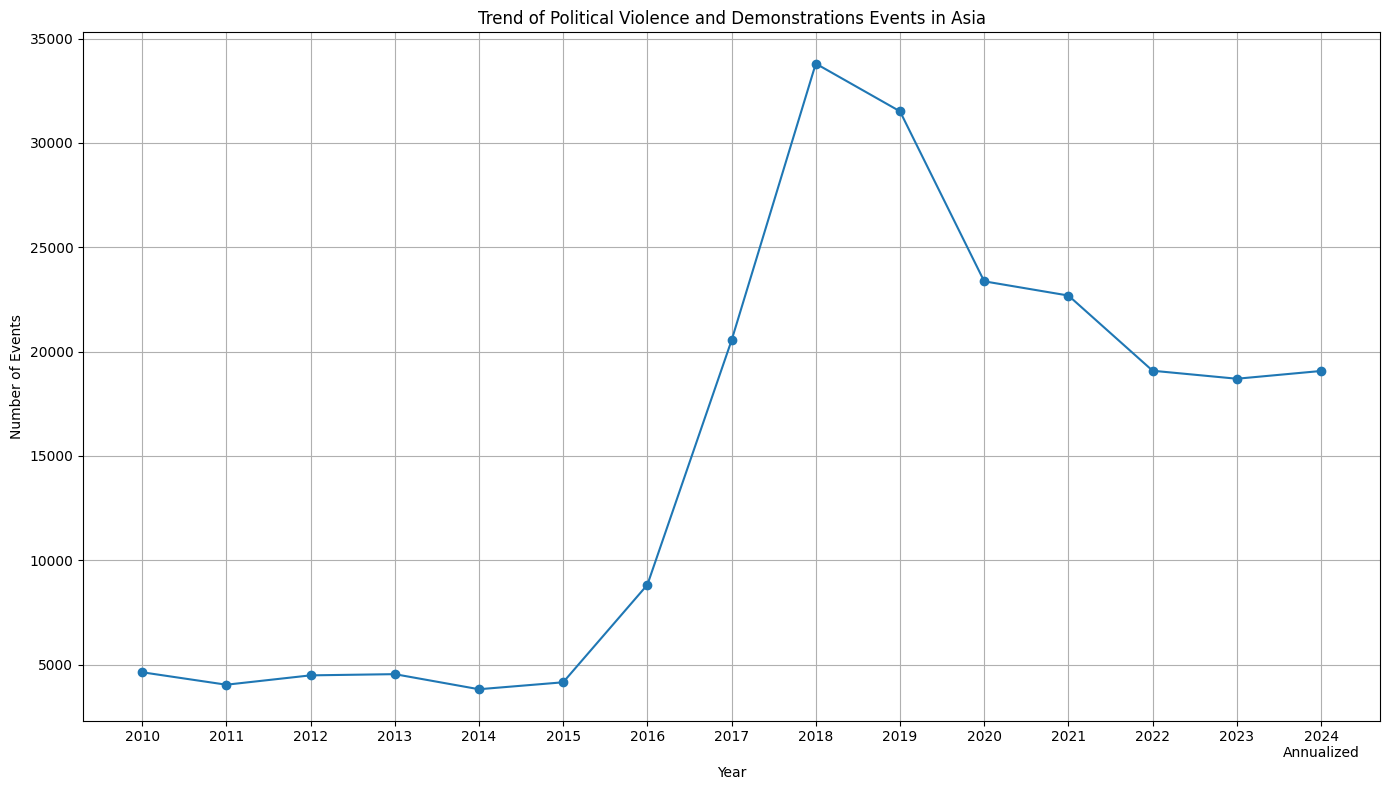

In [ ]:
# Filter the dataset for Political Violence
political_violence_data = df[df['disorder_type'].isin(['Political violence', 'Political violence; Demonstrations'])]

# Group by year to get the count of events for the whole of Asia
violence_by_year = political_violence_data.groupby('year').size()

# Annualize 2024 data
if 2024 in violence_by_year.index:
    violence_by_year.loc[2024] = (violence_by_year.loc[2024] / 6) * 12

plt.figure(figsize=(14, 8))
plt.plot(violence_by_year.index, violence_by_year, marker='o')

# Modify the x-axis tick labels
xticks_labels = violence_by_year.index.tolist()
xticks_labels = [str(label) for label in xticks_labels]
if '2024' in xticks_labels:
    xticks_labels[xticks_labels.index('2024')] = '2024\nAnnualized'

plt.xticks(ticks=violence_by_year.index, labels=xticks_labels)

plt.title('Trend of Political Violence and Demonstrations Events in Asia')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

#### Trend chart showing violence against civilians

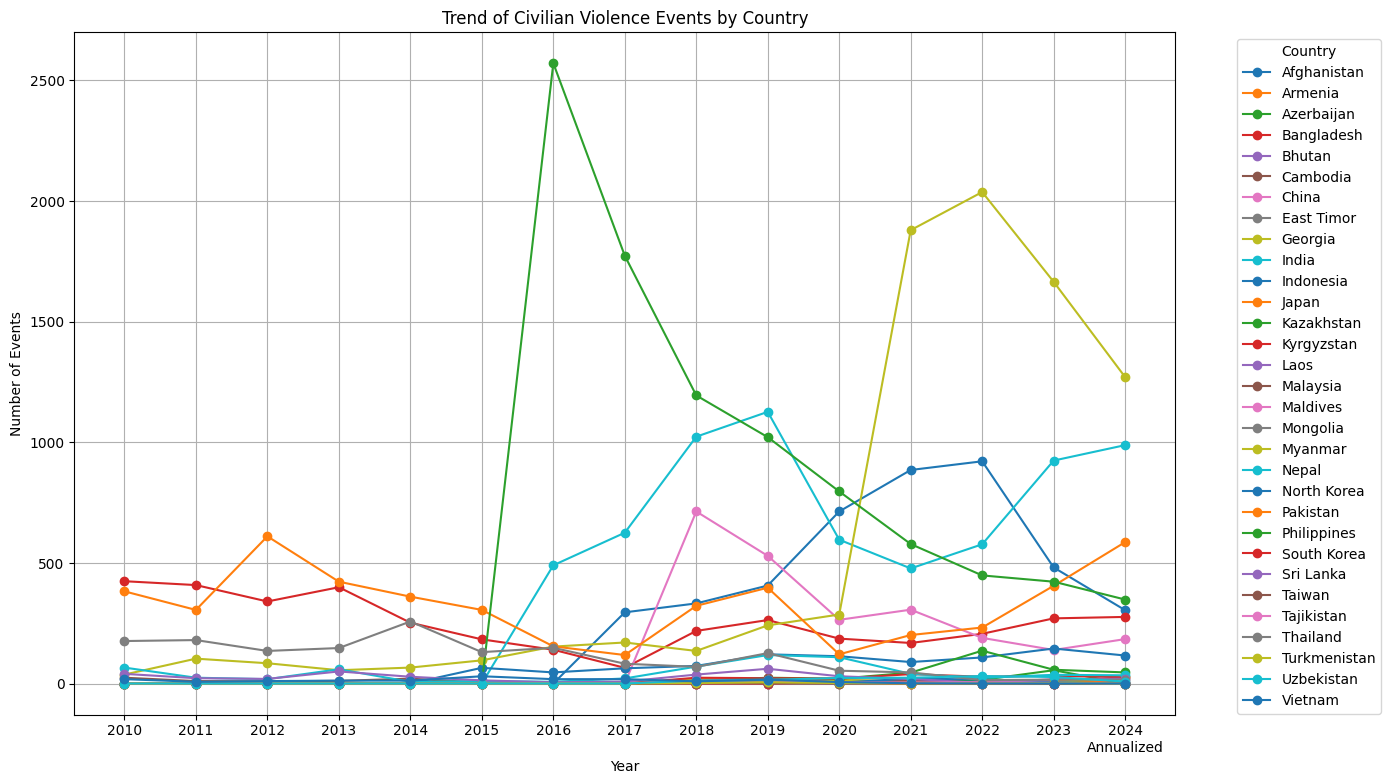

In [ ]:
# Filter the dataset for Civilian Violence
civilain_violence_data = df[df['event_type'].isin(['Violence against civilians'])]

# Group by country and year to get the count of events
civilian_violence_by_country = civilain_violence_data.groupby(['year', 'country']).size().unstack(fill_value=0)

# Annualize 2024 data
if 2024 in civilian_violence_by_country.index:
    civilian_violence_by_country.loc[2024] = (civilian_violence_by_country.loc[2024] / 6) * 12

# Create a line chart to show the trend of political violence events by country
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
for country in civilian_violence_by_country.columns:
    plt.plot(civilian_violence_by_country.index, civilian_violence_by_country[country], marker='o', label=country)

# Modify the x-axis tick labels
xticks_labels = civilian_violence_by_country.index.tolist()
xticks_labels = [str(label) for label in xticks_labels]
if '2024' in xticks_labels:
    xticks_labels[xticks_labels.index('2024')] = '2024\nAnnualized'

plt.xticks(ticks=civilian_violence_by_country.index, labels=xticks_labels)

plt.title('Trend of Civilian Violence Events by Country')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Filter the dataset for Civilian Violence
civilian_violence_data = df[df['event_type'].isin(['Violence against civilians'])]

# Group by country and year to get the count of events
civilian_violence_by_country = civilian_violence_data.groupby(['year', 'country']).size().unstack(fill_value=0)

# Annualize 2024 data
if 2024 in civilian_violence_by_country.index:
    civilian_violence_by_country.loc[2024] = (civilian_violence_by_country.loc[2024] / 6) * 12

# Sort the 2024 data in descending order to get the countries with the highest battle events
if 2024 in civilian_violence_by_country.index:
    highest_political_violence_events_2024 = civilian_violence_by_country.loc[2024].sort_values(ascending=False).head(5)
    print("Top 5 countries with the highest civilian violence events for 2024 (annualized):")
    print(highest_political_violence_events_2024)
else:
    print("No data available for 2024.")

Top 5 countries with the highest civilian violence events for 2024 (annualized):
country
Myanmar        1270
India           988
Pakistan        586
Philippines     348
Afghanistan     304
Name: 2024, dtype: int64


#### Trend of civilian violence events in Asia as a whole

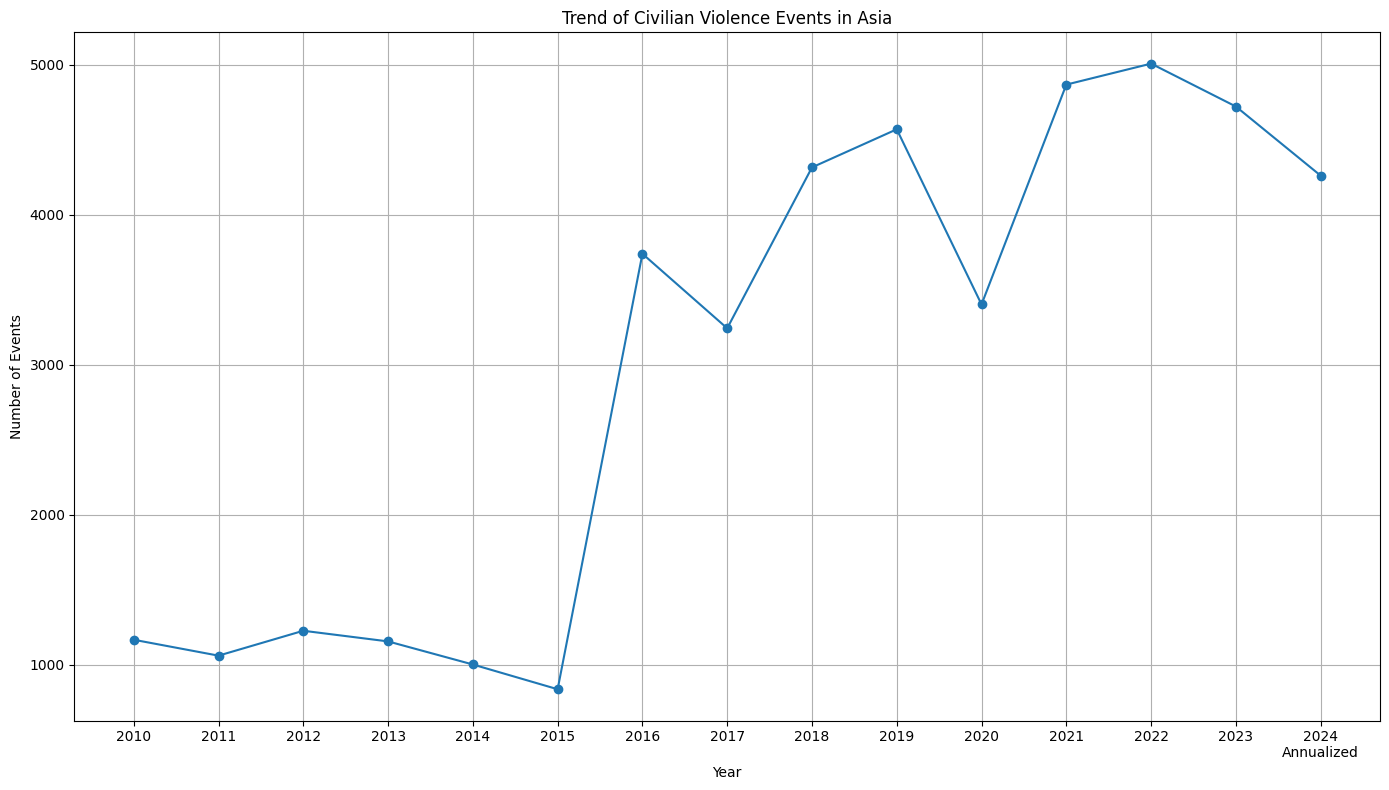

In [ ]:
# Filter the dataset for Civilian Violence
civilain_violence_data = df[df['event_type'].isin(['Violence against civilians'])]

# Group by year to get the count of events
civilian_violence_by_year = civilain_violence_data.groupby('year').size()

# Annualize 2024 data
if 2024 in civilian_violence_by_year.index:
    civilian_violence_by_year.loc[2024] = (civilian_violence_by_year.loc[2024] / 6) * 12

# Create a line chart to show the trend of civilian violence events by year
plt.figure(figsize=(14, 8))
plt.plot(civilian_violence_by_year.index, civilian_violence_by_year, marker='o')

# Modify the x-axis tick labels
xticks_labels = civilian_violence_by_year.index.tolist()
xticks_labels = [str(label) for label in xticks_labels]
if '2024' in xticks_labels:
    xticks_labels[xticks_labels.index('2024')] = '2024\nAnnualized'

plt.xticks(ticks=civilian_violence_by_year.index, labels=xticks_labels)

plt.title('Trend of Civilian Violence Events in Asia')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

### Insight Extraction

#### Finding interesting and actionable insights

In [ ]:
# Insight 1: Country with the highest number of events
country_most_events = df['country'].value_counts().idxmax()
num_events_country_most = df['country'].value_counts().max()
print(f"The country with the highest number of conflict events is {country_most_events} with {num_events_country_most} events.")

The country with the highest number of conflict events is India with 159831 events.


In [ ]:
# Insight 2: Most common event type
most_common_event_type = df['event_type'].value_counts().idxmax()
num_common_event_type = df['event_type'].value_counts().max()
print(f"The most common event type is {most_common_event_type} with {num_common_event_type} occurrences.")

The most common event type is Protests with 335925 occurrences.


In [ ]:
# Insight 3: Trend in fatalities
avg_fatalities_per_event = df['fatalities'].mean()
print(f"The average number of fatalities per event is {avg_fatalities_per_event:.2f}.")

The average number of fatalities per event is 0.61.


#### Insight 4: Non-obvious insight

In [ ]:
# Exploring the correlation between event types and fatalities
event_fatality_correlation = df.groupby('event_type')['fatalities'].mean().sort_values(ascending=False)
print(f"The event types with the highest average fatalities are:\n{event_fatality_correlation.head()}")

The event types with the highest average fatalities are:
event_type
Battles                       2.286052
Explosions/Remote violence    1.992511
Violence against civilians    0.904494
Riots                         0.149100
Strategic developments        0.070915
Name: fatalities, dtype: float64


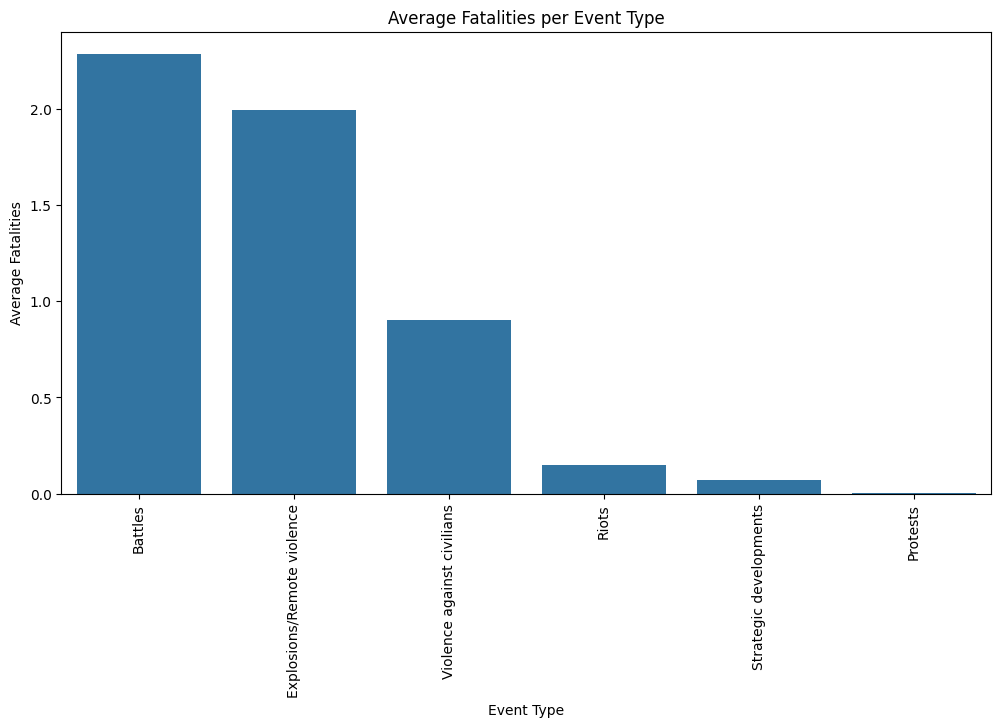

In [ ]:
# Visualization for Insight 4
plt.figure(figsize=(12, 6))
sns.barplot(x=event_fatality_correlation.index, y=event_fatality_correlation.values)
plt.title('Average Fatalities per Event Type')
plt.xlabel('Event Type')
plt.ylabel('Average Fatalities')
plt.xticks(rotation=90)
plt.show()

### Additional Analyses

####Trend Analysis by Actor

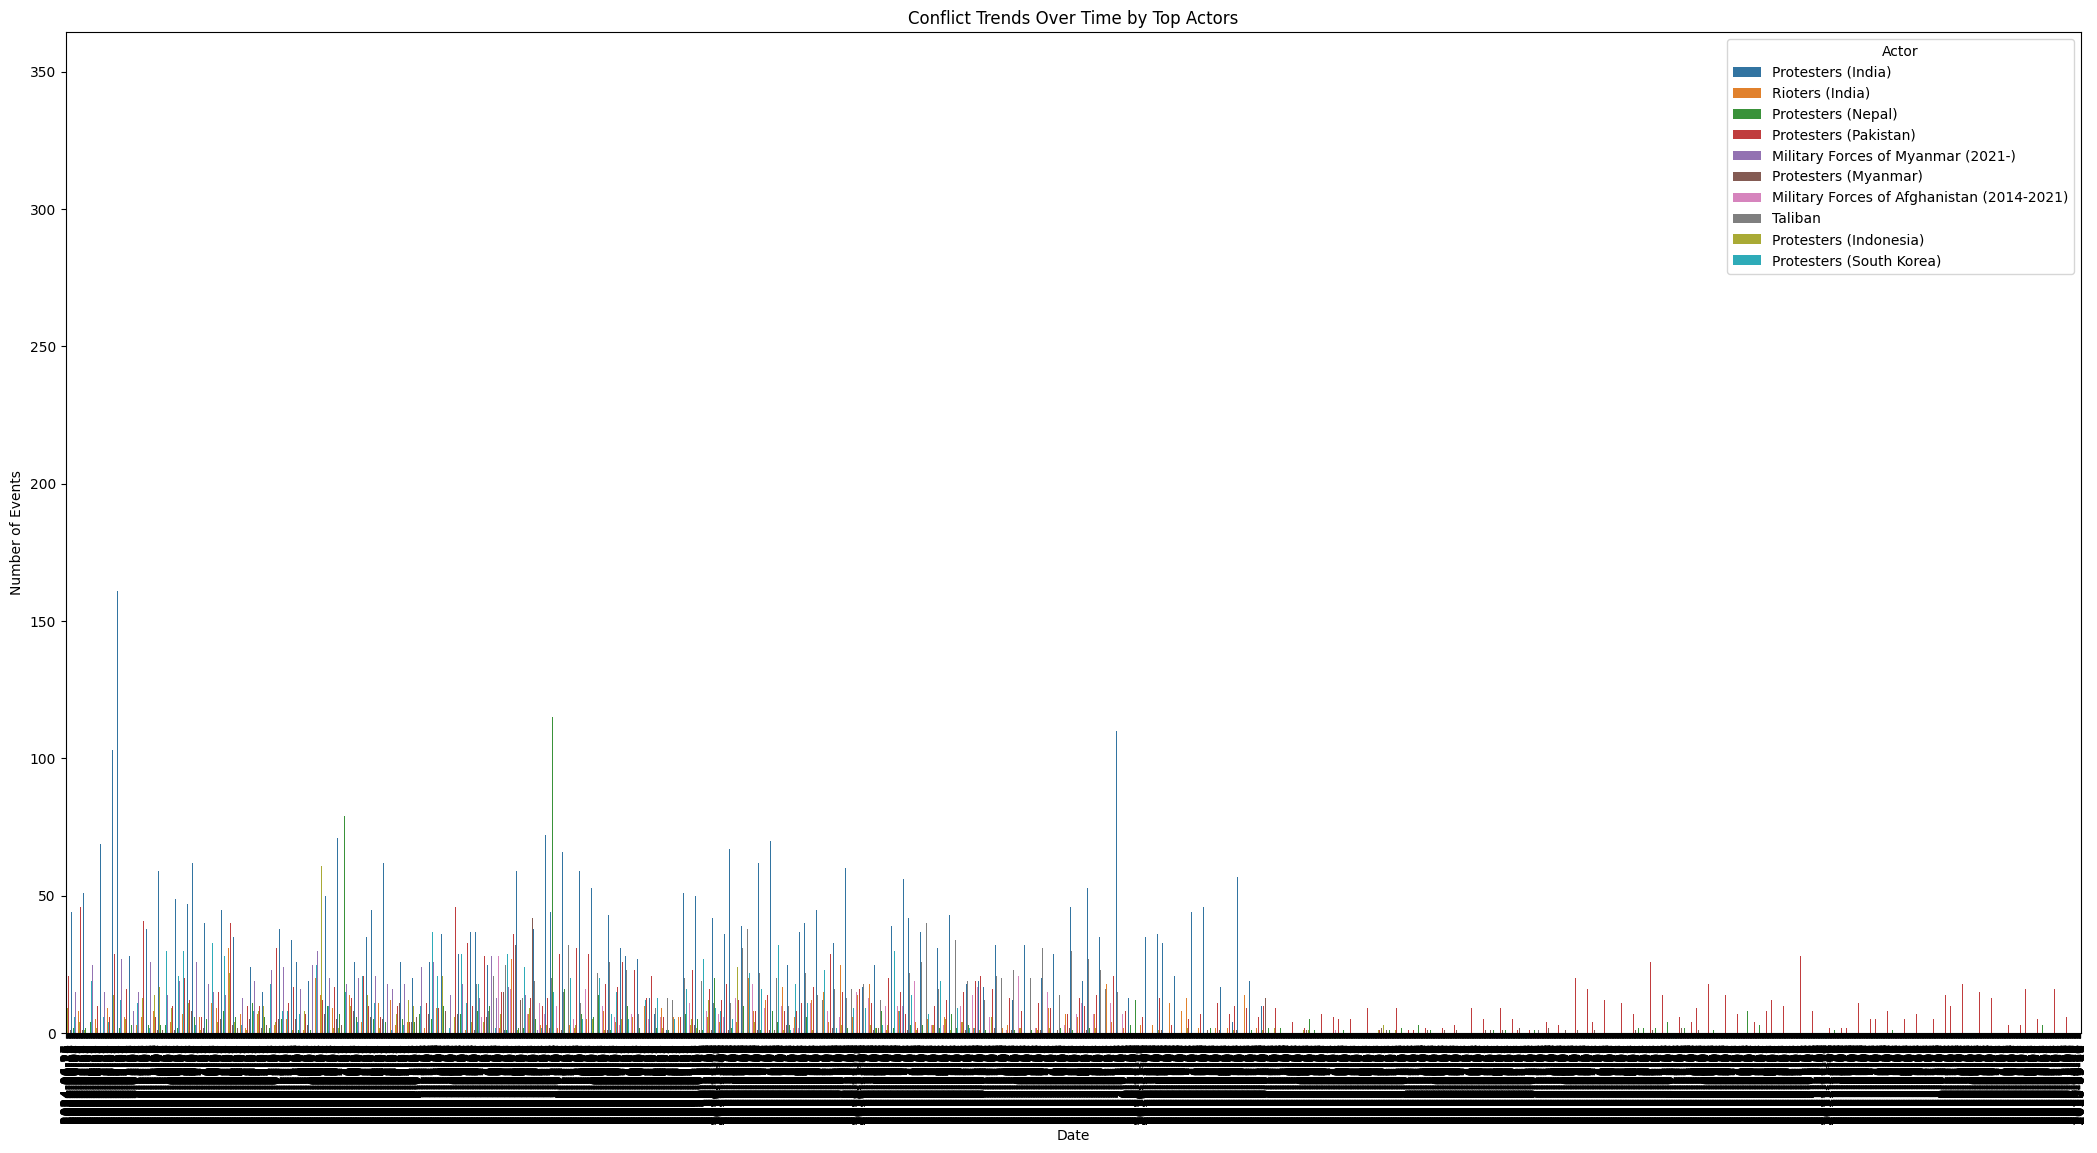

In [ ]:
#top_actors = df['actor1'].value_counts().head(10).index
#top_actors_data = df[df['actor1'].isin(top_actors)]

#plt.figure(figsize=(26, 13))
#sns.countplot(data=top_actors_data, x='event_date', hue='actor1')
#plt.title('Conflict Trends Over Time by Top Actors')
#plt.xlabel('Date')
#plt.ylabel('Number of Events')
#plt.xticks(rotation=90)
#plt.legend(title='Actor')
#plt.show()

#### Geographical Distribution

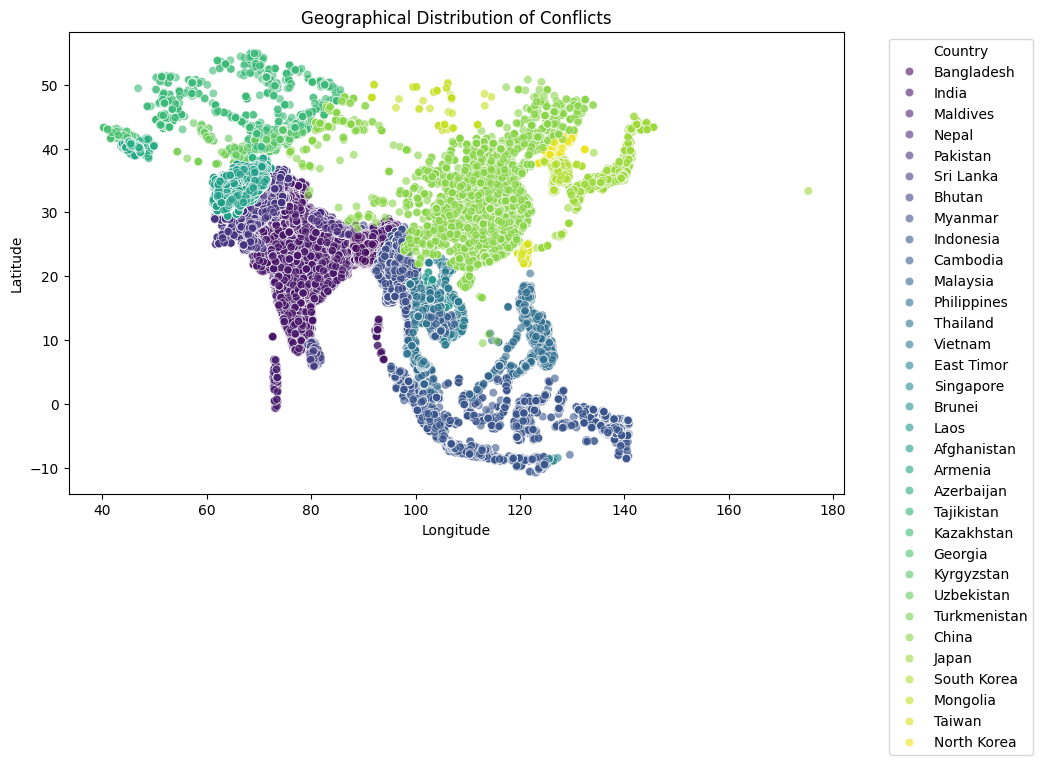

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='country', alpha=0.6, palette='viridis')
plt.title('Geographical Distribution of Conflicts')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Temporal Patterns

<ipython-input-20-33c702f51516>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='month', palette='coolwarm')


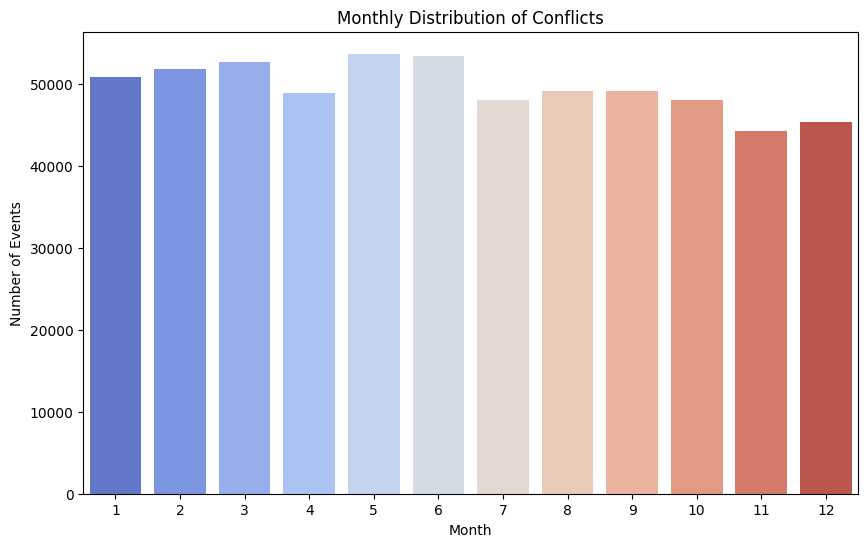

In [ ]:
df['month'] = df['event_date'].dt.month
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='month', palette='coolwarm')
plt.title('Monthly Distribution of Conflicts')
plt.xlabel('Month')
plt.ylabel('Number of Events')
plt.show()

#### Fatalities Distribution by Conflict Type

<ipython-input-21-1a0522021db8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='event_type', y='fatalities', palette='muted')


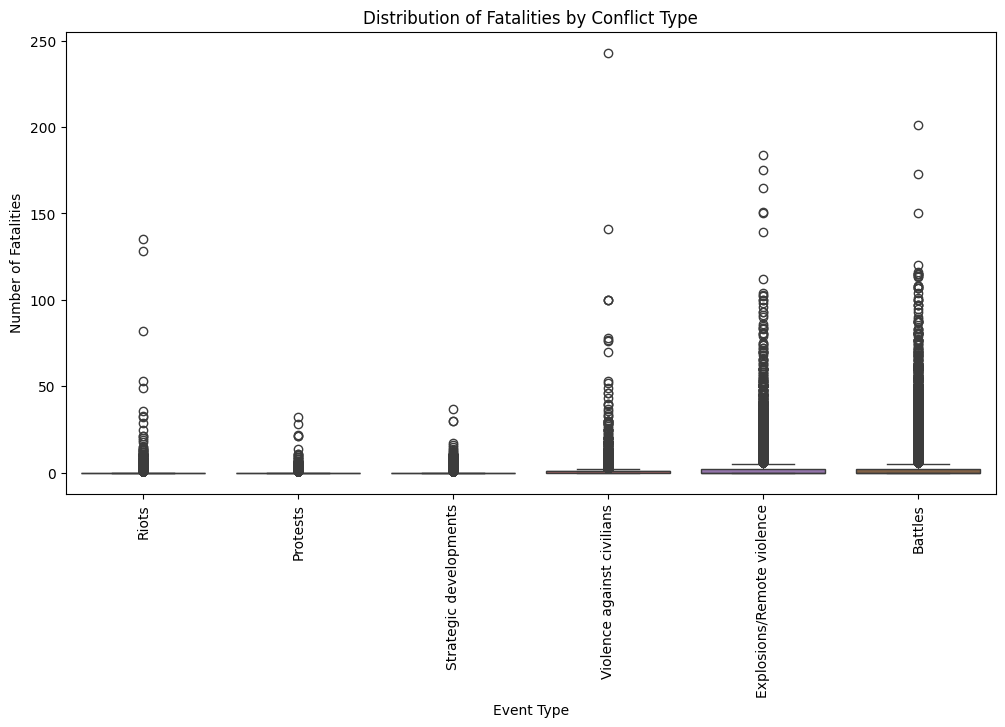

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='event_type', y='fatalities', palette='muted')
plt.title('Distribution of Fatalities by Conflict Type')
plt.xlabel('Event Type')
plt.ylabel('Number of Fatalities')
plt.xticks(rotation=90)
plt.show()

#### Additional Insight: Trends for specific actor types

The actors with the highest average fatalities are:
actor1
Military Forces of Saudi Arabia (2015-) Border Guard    31.666667
JaM: Army of Monotheists (Syria)                        31.000000
Islamic State (Iran)                                    27.333333
Malhama Tactical                                        20.000000
Police Forces of Greece (2019-) Border Guard            19.000000
Name: fatalities, dtype: float64


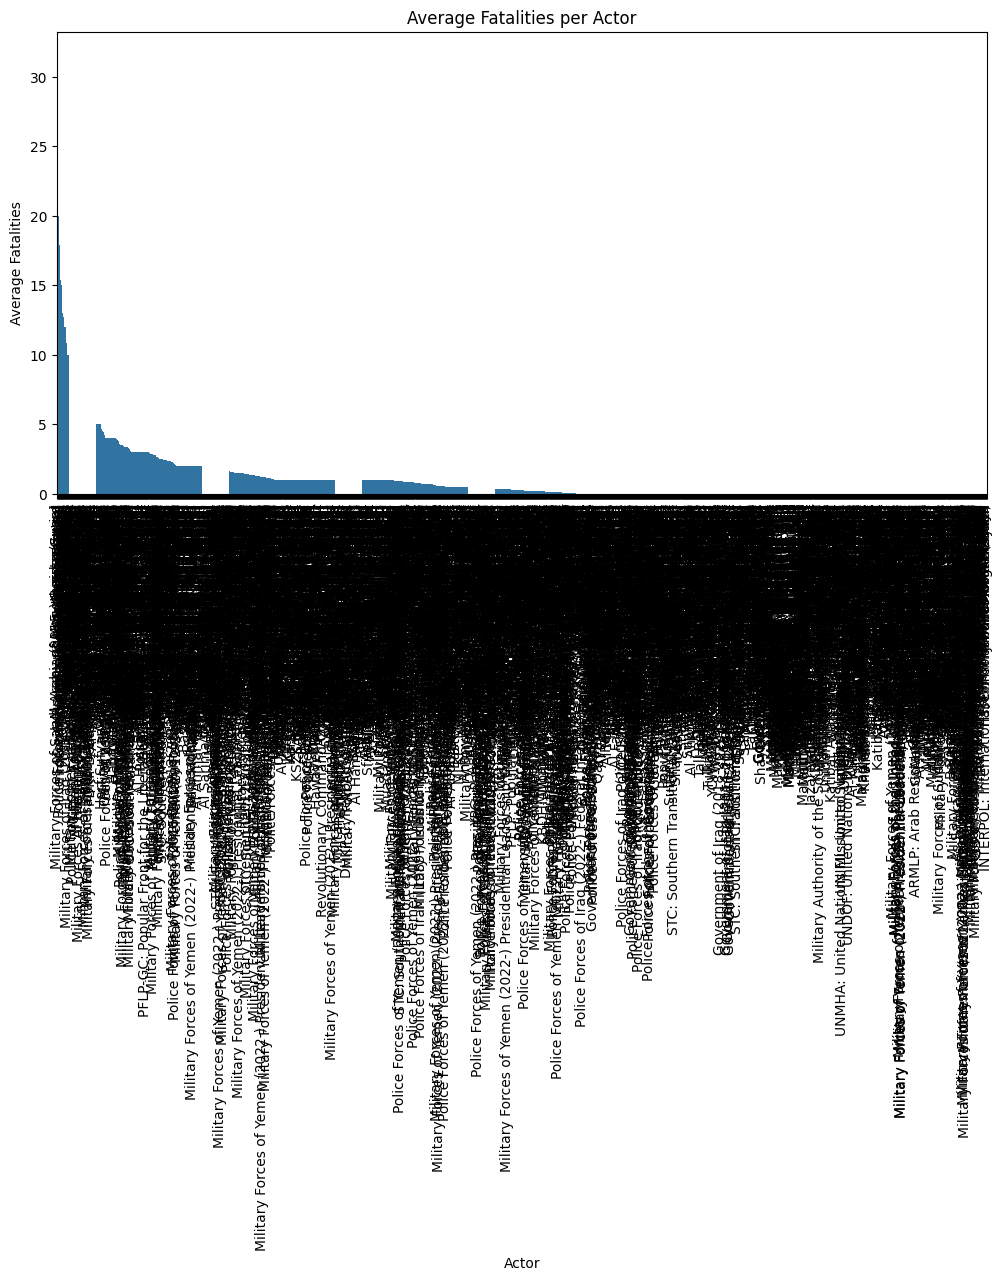

In [ ]:
actor_fatality_correlation = df.groupby('actor1')['fatalities'].mean().sort_values(ascending=False)
print(f"The actors with the highest average fatalities are:\n{actor_fatality_correlation.head()}")

plt.figure(figsize=(12, 6))
sns.barplot(x=actor_fatality_correlation.index, y=actor_fatality_correlation.values)
plt.title('Average Fatalities per Actor')
plt.xlabel('Actor')
plt.ylabel('Average Fatalities')
plt.xticks(rotation=90)
plt.show()

The actors with the highest average fatalities are:
actor1
NTJ: National Thowheed Jama'ath                                                         39.571429
MPDF: Master People's Defense Force - Gangaw                                            38.000000
Alliance Force of Chindwin Yoma                                                         34.000000
Alawaka Column (People's Defense Force - Thaton District Battalion 3)                   30.000000
Taw Kyee Kan Pyi Thu Kar Kwei Yae Tatphwe: Rook People's Defense Force                  30.000000
SBSS: Swadheen Bharat Subhash Sena                                                      29.000000
FRF: Federal Revolution Force                                                           28.000000
Jundallah                                                                               26.363636
Achin Communal Militia (Afghanistan)                                                    21.000000
Taik Thein Myay Auk Taw Hlan Yay Tatphwe: Taik Thein Underg

<ipython-input-22-cdffc88b5c5f>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_30_actors.index, y=top_30_actors.values, palette='tab10')


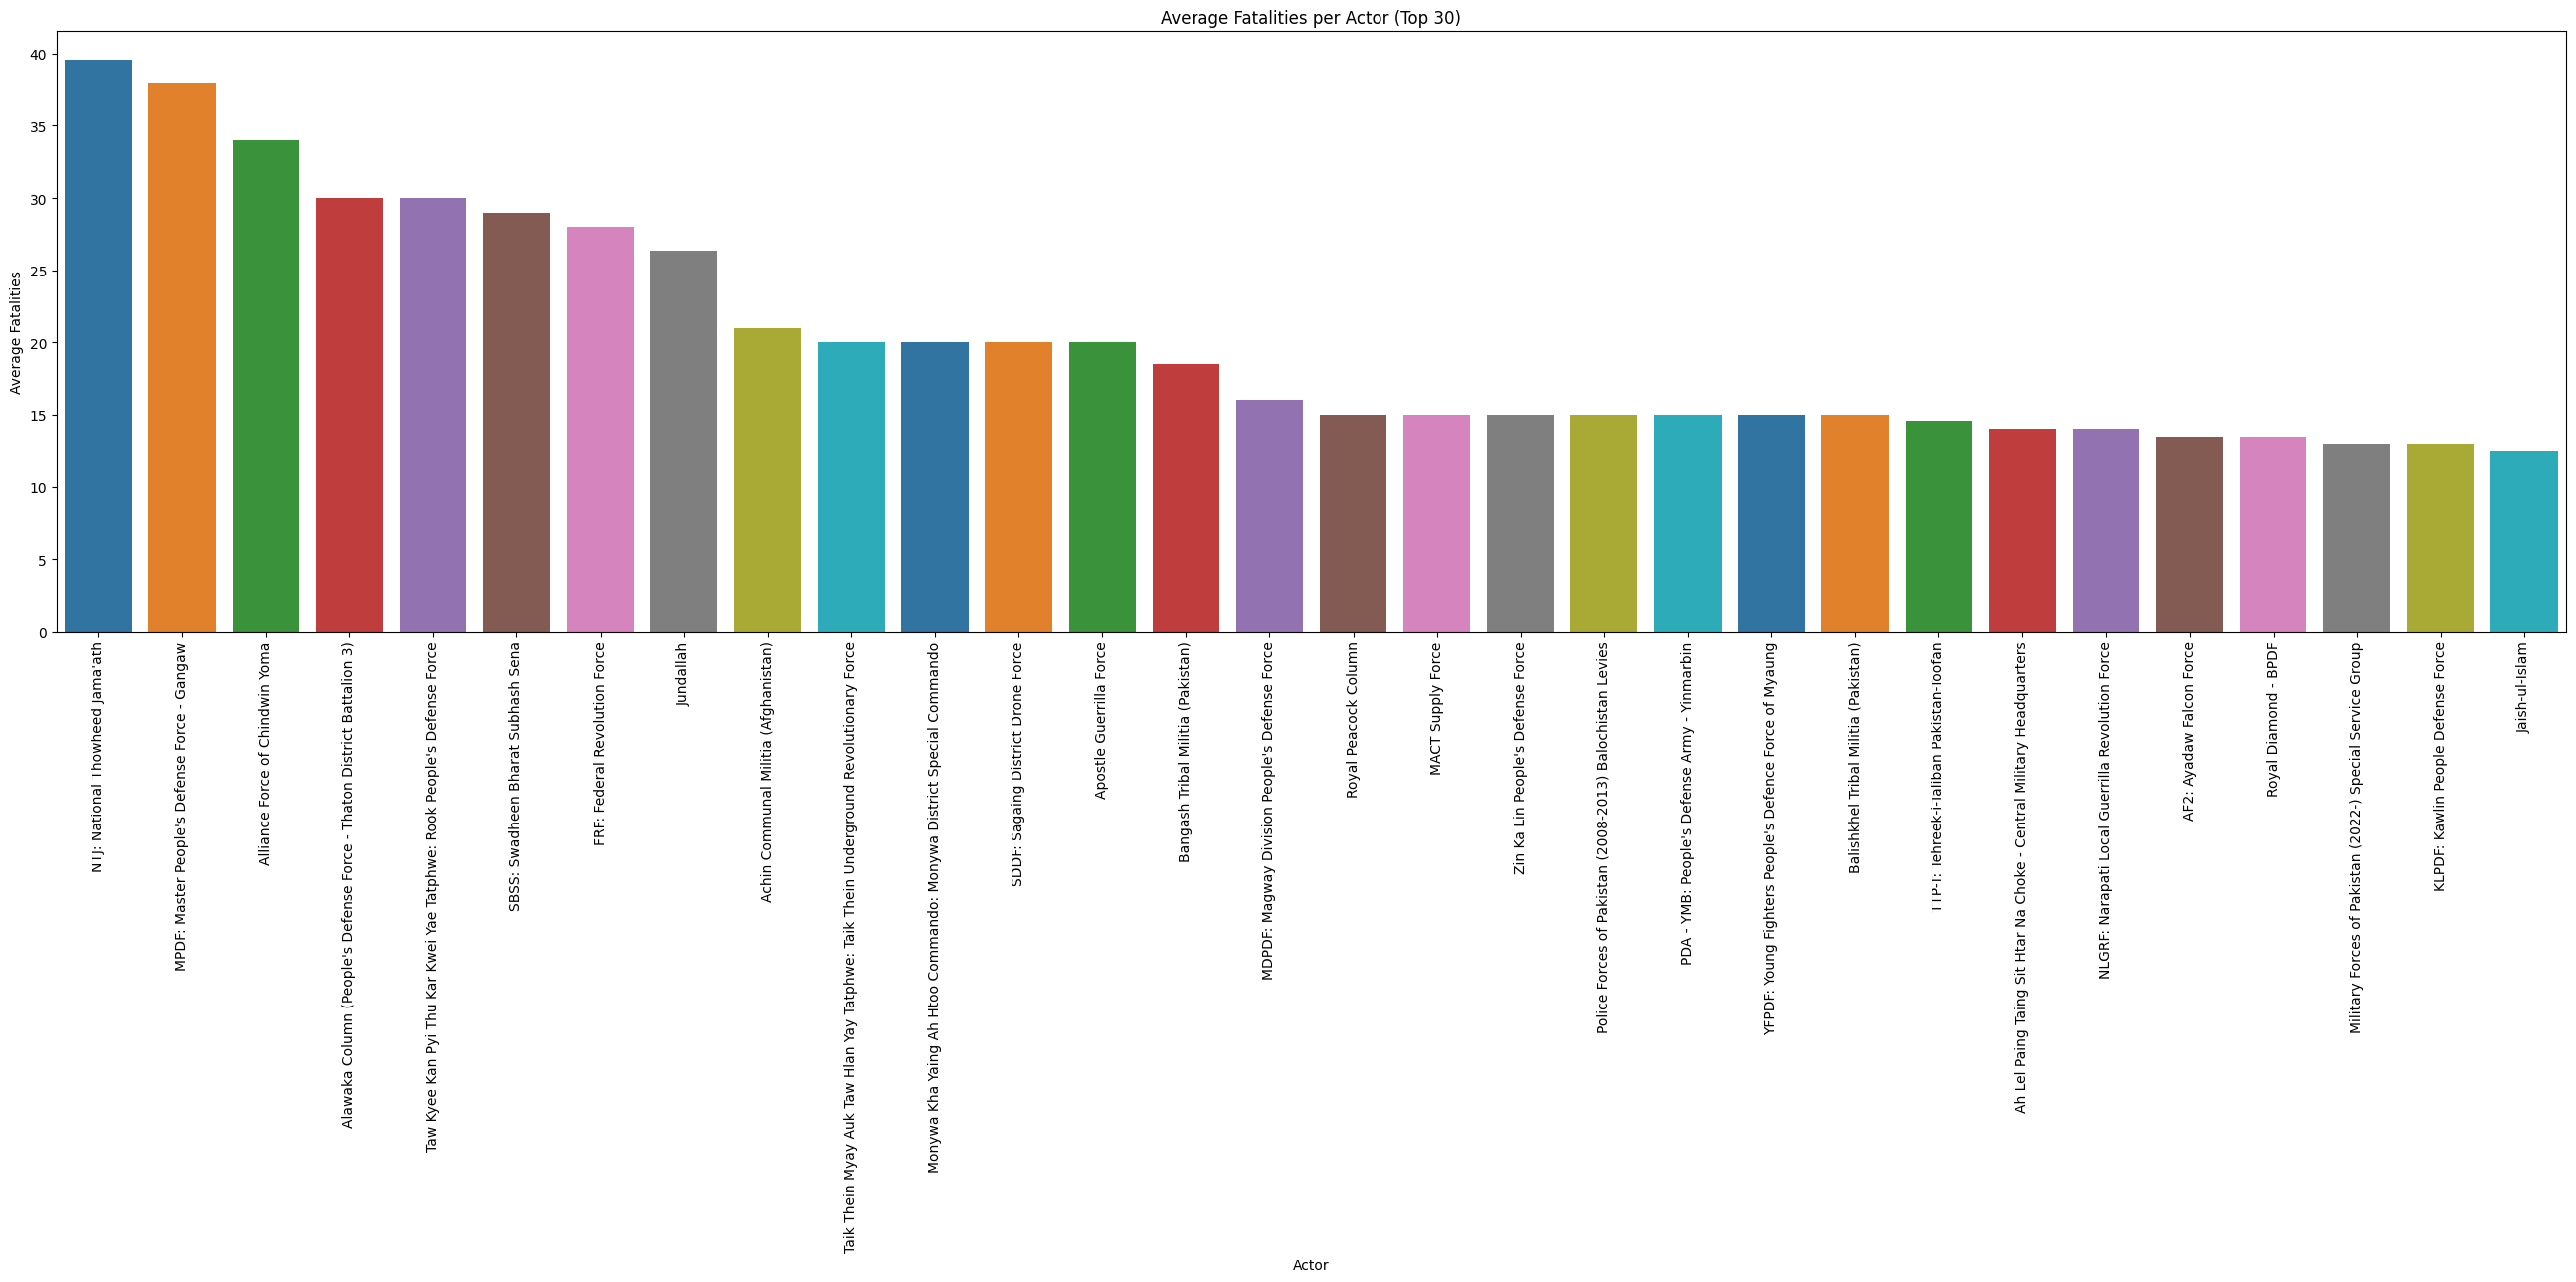

In [ ]:
# Group by 'actor1' and calculate the mean of fatalities
actor_fatality_correlation = df.groupby('actor1')['fatalities'].mean().sort_values(ascending=False)

# Select the top 30 actors
top_30_actors = actor_fatality_correlation.head(30)

# Print the top 30 actors with the highest average fatalities
print(f"The actors with the highest average fatalities are:\n{top_30_actors}")

# Plotting the data
plt.figure(figsize=(26, 13))
sns.barplot(x=top_30_actors.index, y=top_30_actors.values, palette='tab10')
plt.title('Average Fatalities per Actor (Top 30)')
plt.xlabel('Actor')
plt.ylabel('Average Fatalities')
plt.xticks(rotation=90)

# Adjust layout to fit labels
plt.tight_layout()

# Show the plot
plt.show()

### Time-Series Forecasting

	1.	ARIMA (AutoRegressive Integrated Moving Average)
	2.	SARIMA (Seasonal ARIMA)
	3.	Prophet (developed by Facebook)
	4.	LSTM (Long Short-Term Memory Networks)

Since ARIMA and SARIMA are traditional statistical models and Prophet is relatively easy to use, let’s focus on Prophet for this task as it is robust and handles missing data and outliers well.

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuu15b09l/nec0j9rr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuu15b09l/cjj_2e98.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97911', 'data', 'file=/tmp/tmpuu15b09l/nec0j9rr.json', 'init=/tmp/tmpuu15b09l/cjj_2e98.json', 'output', 'file=/tmp/tmpuu15b09l/prophet_modeler4mn6e6/prophet_model-20240629001541.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:15:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:15:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


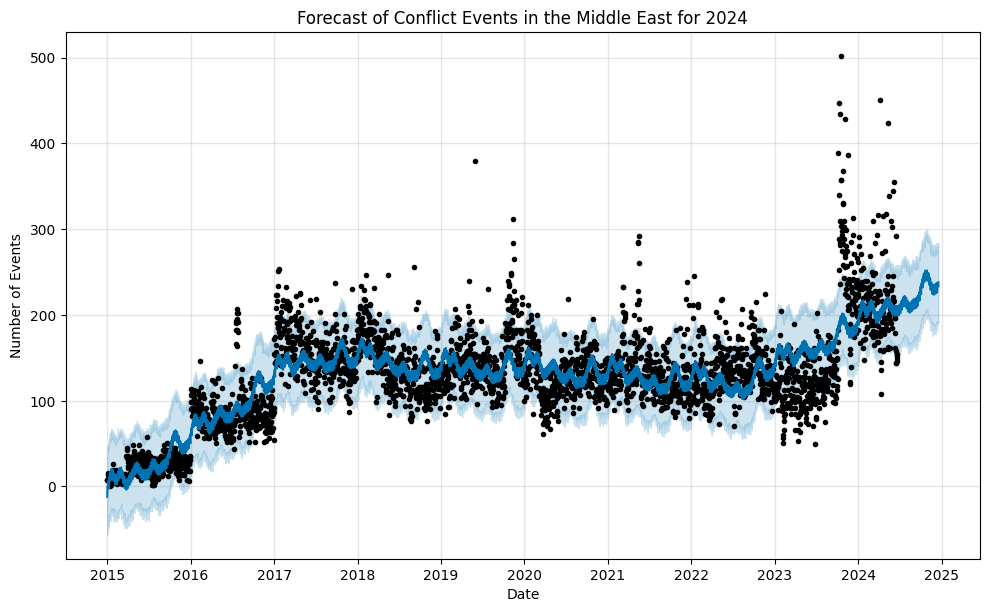

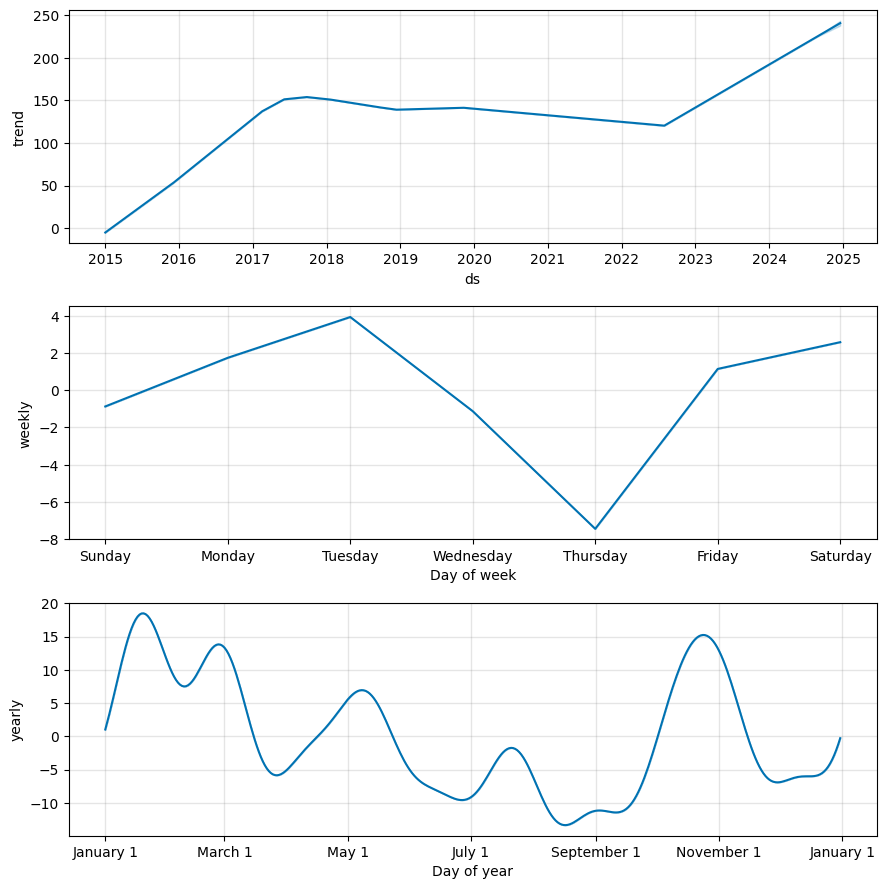

In [ ]:
from prophet import Prophet

# Data Preprocessing
#df['event_date'] = pd.to_datetime(df['event_date'])
#df.fillna({'assoc_actor_1': 'Unknown', 'actor2': 'Unknown', 'assoc_actor_2': 'Unknown', 'civilian_targeting': 'No', 'admin1': 'Unknown', 'admin2': 'Unknown', 'admin3': 'Unknown', 'tags': 'None'}, inplace=True)

# Summarize daily conflict events
daily_conflicts = df['event_date'].value_counts().sort_index().reset_index()
daily_conflicts.columns = ['ds', 'y']

# Initialize Prophet model
model = Prophet()

# Fit the model on the data
model.fit(daily_conflicts)

# Make future dataframe for predictions
future = model.make_future_dataframe(periods=6 * 30)  # Predicting for the next 6 months

# Predict future conflicts
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title('Forecast of Conflict Events in the Middle East for 2024')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.show()

# Plot the forecast components
fig2 = model.plot_components(forecast)
plt.show()

###Using ARIMA for Time-Series Forecasting

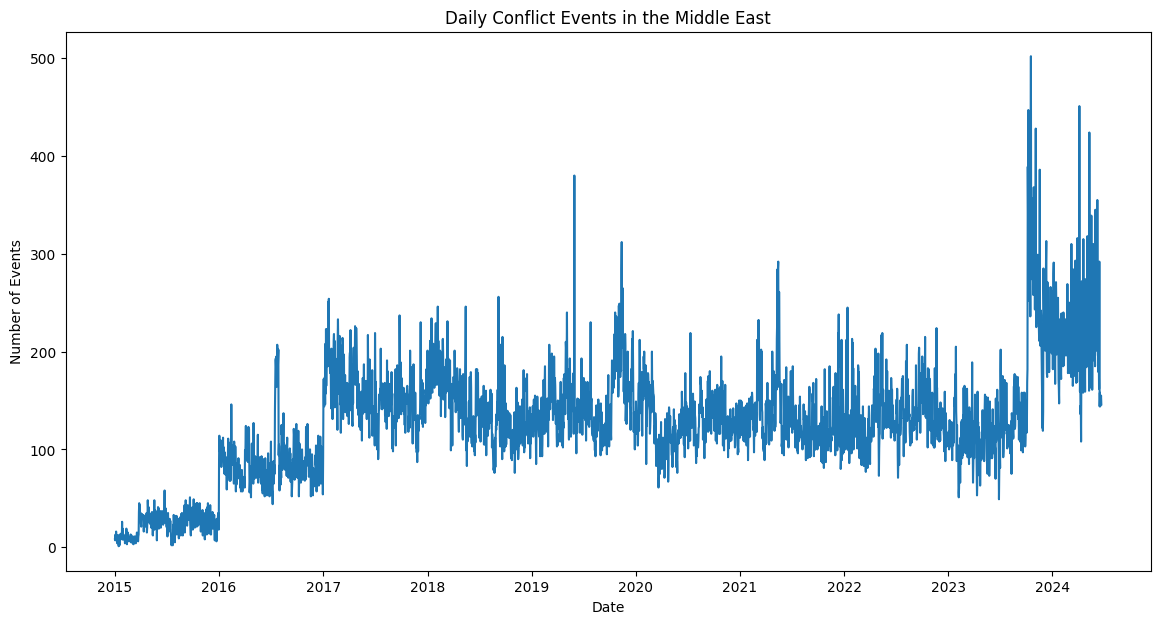

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


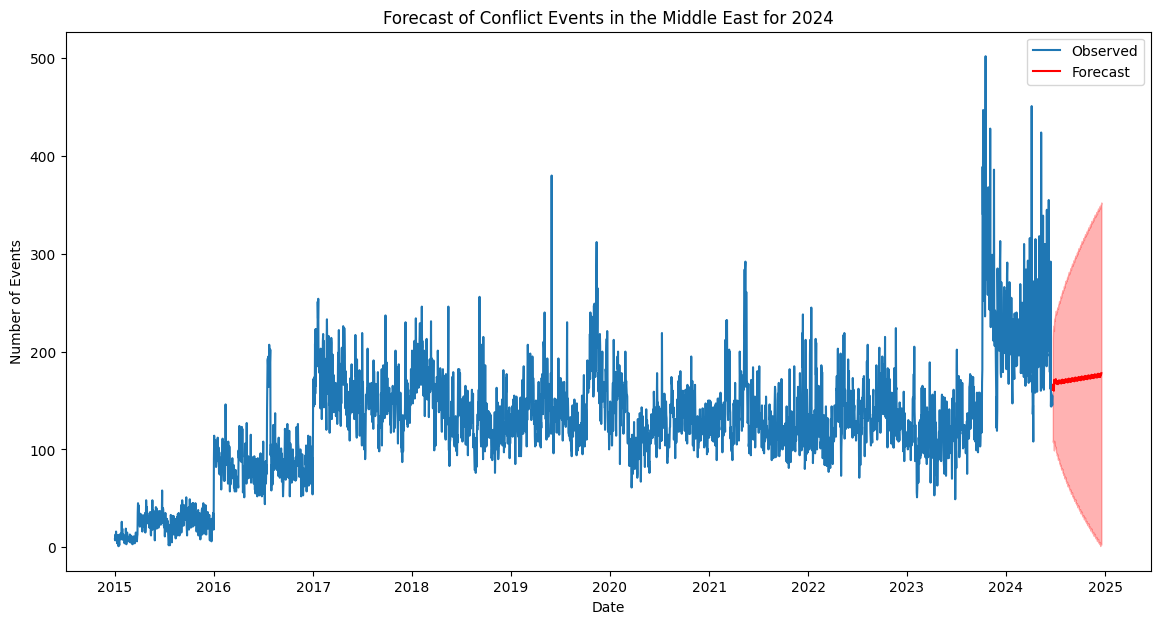

In [ ]:
# Installing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Loading the dataset
df = pd.read_csv('/content/drive/My Drive/middle_east_conflict_data.csv')

# Data Preprocessing
df['event_date'] = pd.to_datetime(df['event_date'])
df.fillna({'assoc_actor_1': 'Unknown', 'actor2': 'Unknown', 'assoc_actor_2': 'Unknown', 'civilian_targeting': 'No', 'admin1': 'Unknown', 'admin2': 'Unknown', 'admin3': 'Unknown', 'tags': 'None'}, inplace=True)

# Summarize daily conflict events
daily_conflicts = df['event_date'].value_counts().sort_index().reset_index()
daily_conflicts.columns = ['ds', 'y']
daily_conflicts.set_index('ds', inplace=True)

# Plotting the daily conflicts
plt.figure(figsize=(14, 7))
plt.plot(daily_conflicts)
plt.title('Daily Conflict Events in the Middle East')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.show()

# Fitting the ARIMA model (using SARIMA to handle seasonality if needed)
model = SARIMAX(daily_conflicts, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

# Making predictions
n_periods = 180  # Predicting for the next 6 months (approximately 180 days)
pred = model_fit.get_forecast(steps=n_periods)
pred_ci = pred.conf_int()

# Plotting the predictions
plt.figure(figsize=(14, 7))
plt.plot(daily_conflicts, label='Observed')
plt.plot(pred.predicted_mean, label='Forecast', color='red')
plt.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='red', alpha=0.3)
plt.title('Forecast of Conflict Events in the Middle East for 2024')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.legend()
plt.show()

#### LSTM (Long Short-Term Memory Networks)

Pros:

	•	Capable of capturing complex temporal dependencies and non-linear patterns.
	•	Handles long-term dependencies well.

Cons:

	•	Requires a larger amount of data for training.
	•	More computationally intensive and requires more tuning compared to traditional methods.

6/6 [==============================] - 1s 5ms/step


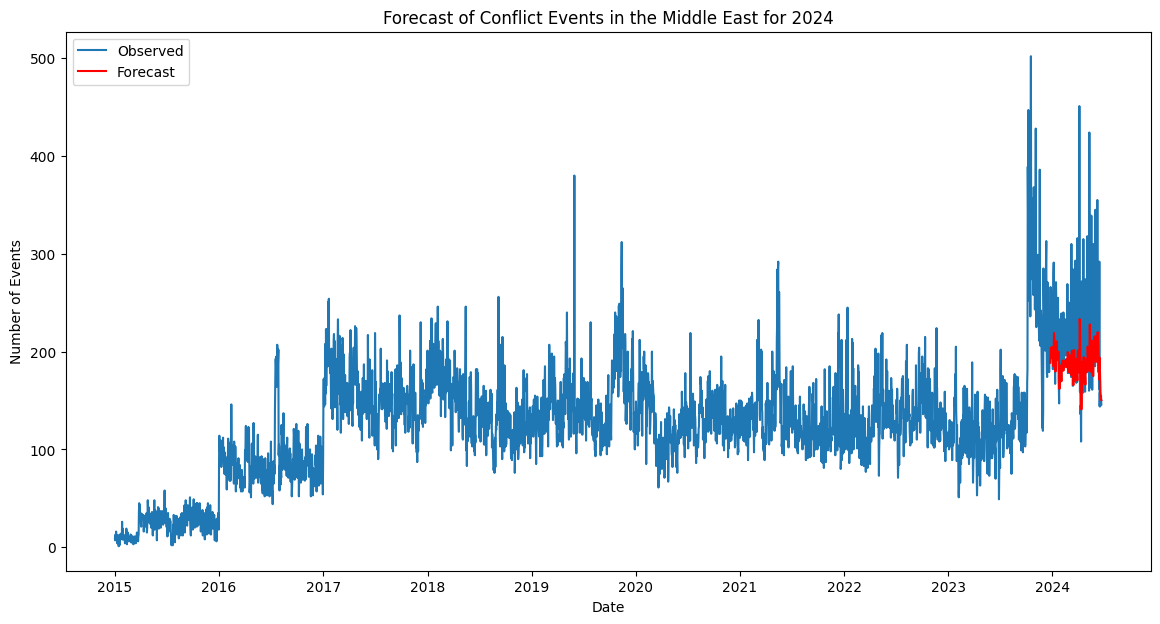

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Data Preprocessing
df['event_date'] = pd.to_datetime(df['event_date'])
df.fillna({'assoc_actor_1': 'Unknown', 'actor2': 'Unknown', 'assoc_actor_2': 'Unknown', 'civilian_targeting': 'No', 'admin1': 'Unknown', 'admin2': 'Unknown', 'admin3': 'Unknown', 'tags': 'None'}, inplace=True)

# Summarize daily conflict events
daily_conflicts = df['event_date'].value_counts().sort_index().reset_index()
daily_conflicts.columns = ['ds', 'y']

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(daily_conflicts['y'].values.reshape(-1, 1))

# Prepare the data for LSTM
sequence_length = 60
X, y = [], []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])
X, y = np.array(X), np.array(y)

# Reshape the data to [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, batch_size=1, epochs=1)

# Create the test data
test_data = scaled_data[-(sequence_length+n_periods):]
X_test = []
for i in range(sequence_length, len(test_data)):
    X_test.append(test_data[i-sequence_length:i, 0])
X_test = np.array(X_test)

# Reshape the data to [samples, time steps, features]
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Plot the predictions
plt.figure(figsize=(14, 7))
plt.plot(daily_conflicts['ds'], daily_conflicts['y'], label='Observed')
plt.plot(daily_conflicts['ds'][-len(predictions):], predictions, label='Forecast', color='red')
plt.title('Forecast of Conflict Events in the Middle East for 2024')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.legend()
plt.show()

#### SARIMA (Seasonal ARIMA)

Pros:

	•	Captures both non-seasonal and seasonal components of the time series.
	•	Suitable for data with clear seasonal patterns.

Cons:

	•	Requires manual tuning of parameters (seasonal order).
	•	May not handle non-linear patterns as effectively as some machine learning methods.

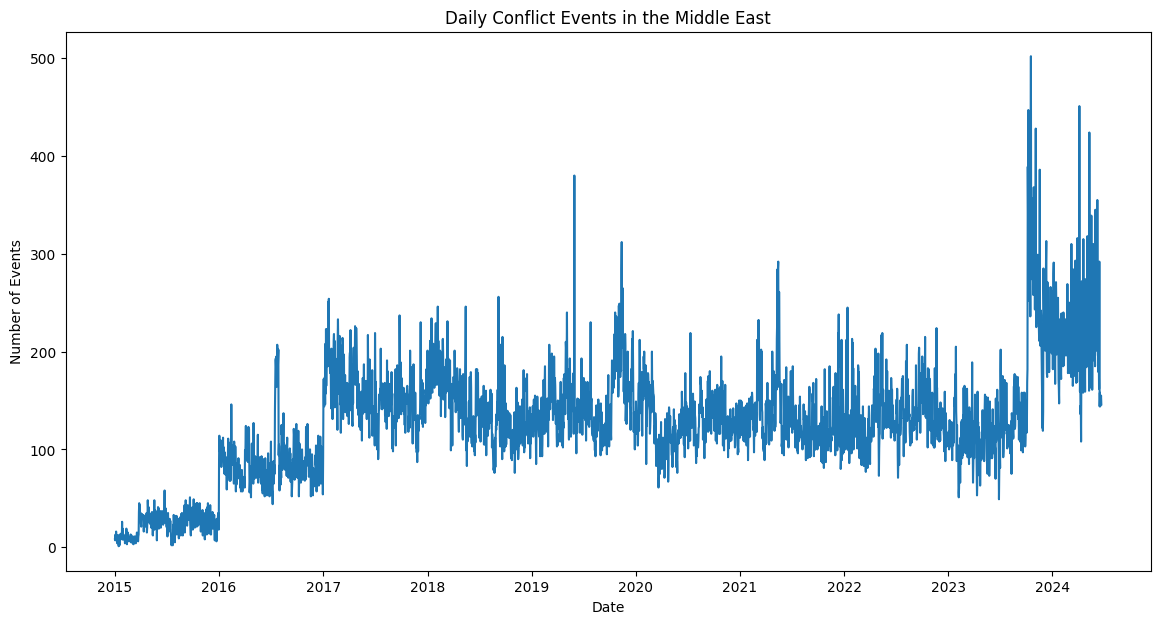

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


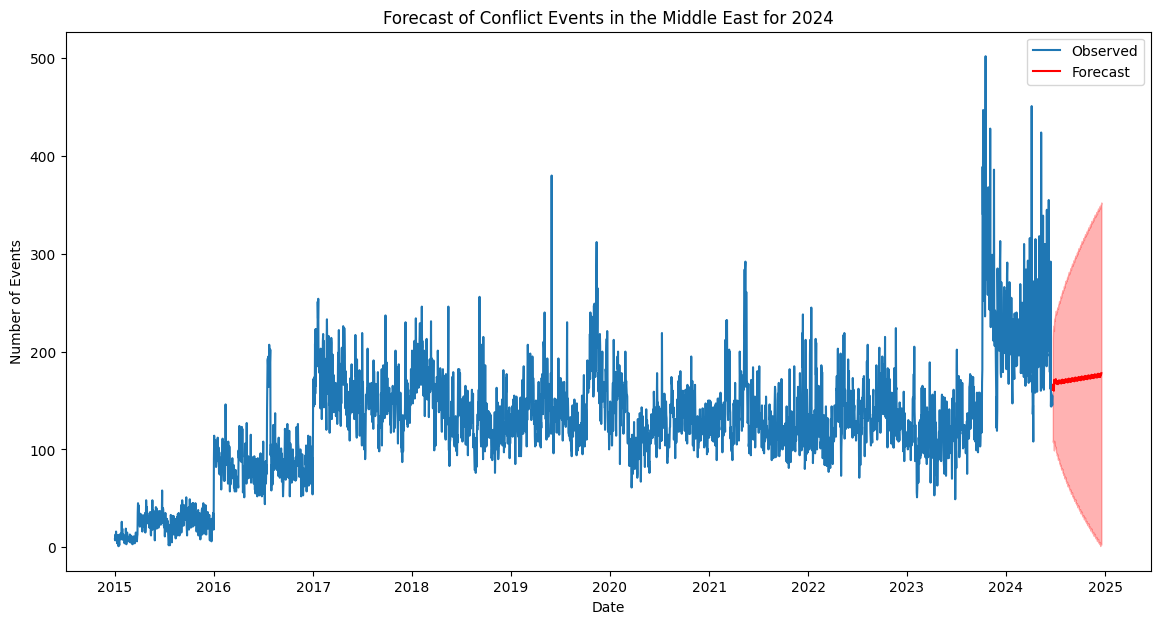

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Loading the dataset
df = pd.read_csv('/content/drive/My Drive/middle_east_conflict_data.csv')

# Data Preprocessing
df['event_date'] = pd.to_datetime(df['event_date'])
df.fillna({'assoc_actor_1': 'Unknown', 'actor2': 'Unknown', 'assoc_actor_2': 'Unknown', 'civilian_targeting': 'No', 'admin1': 'Unknown', 'admin2': 'Unknown', 'admin3': 'Unknown', 'tags': 'None'}, inplace=True)

# Summarize daily conflict events
daily_conflicts = df['event_date'].value_counts().sort_index().reset_index()
daily_conflicts.columns = ['ds', 'y']
daily_conflicts.set_index('ds', inplace=True)

# Plot the daily conflicts
plt.figure(figsize=(14, 7))
plt.plot(daily_conflicts)
plt.title('Daily Conflict Events in the Middle East')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.show()

# Fit the SARIMA model
model = SARIMAX(daily_conflicts, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

# Make predictions
n_periods = 180  # Predicting for the next 6 months (approximately 180 days)
pred = model_fit.get_forecast(steps=n_periods)
pred_ci = pred.conf_int()

# Plot the predictions
plt.figure(figsize=(14, 7))
plt.plot(daily_conflicts, label='Observed')
plt.plot(pred.predicted_mean, label='Forecast', color='red')
plt.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='red', alpha=0.3)
plt.title('Forecast of Conflict Events in the Middle East for 2024')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.legend()
plt.show()

## KPIs

#### Military Expenditure as a Percentage of GDP

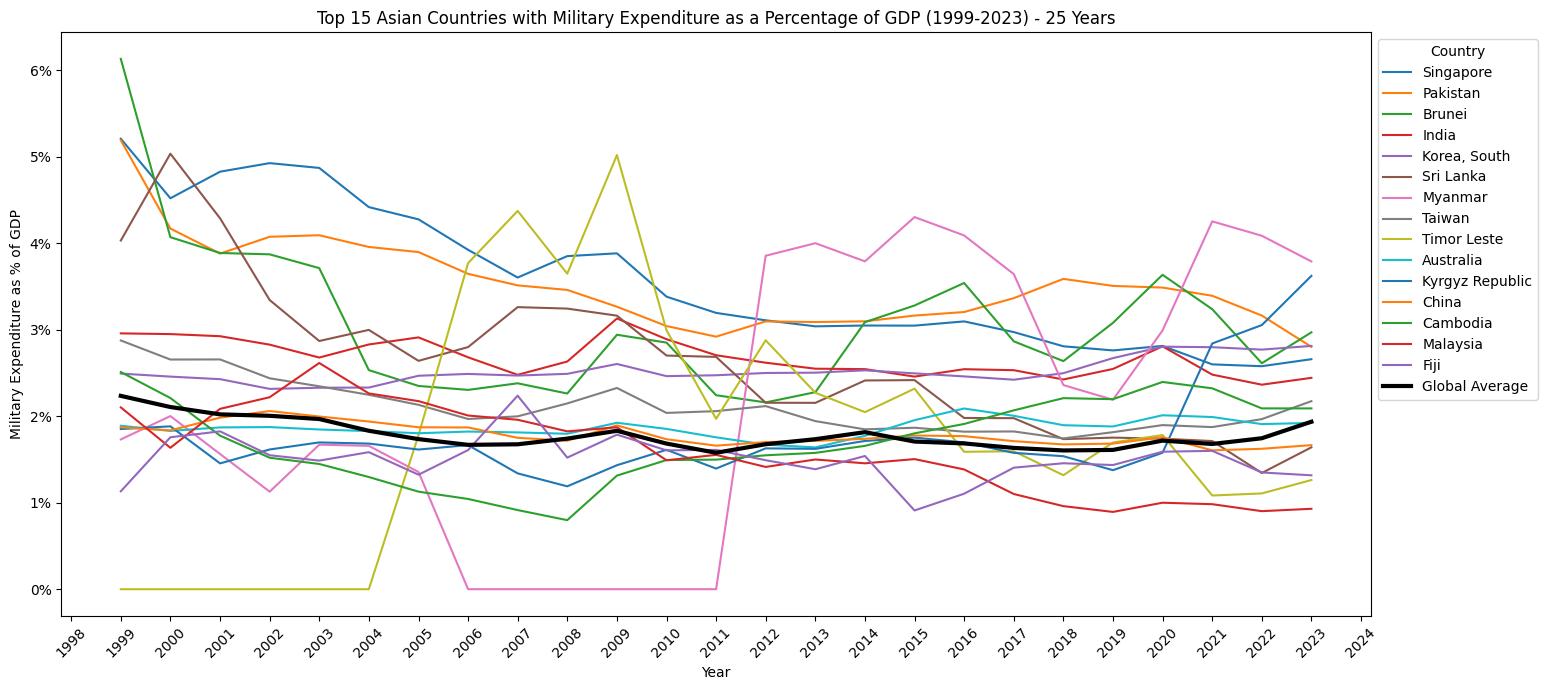

In [3]:
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the military expenditure as a percentage of GDP data
file_path = '/content/drive/My Drive/Conflict_data/SIPRI/SIPRI-Milex-data-1948-2023_modified.xlsx'
gdp_share_df = pd.read_excel(file_path, sheet_name='Asia Share of GDP')

# Ensure the 'Year' column is treated as datetime
gdp_share_df['Year'] = pd.to_datetime(gdp_share_df['Year'], format='%Y')

# Strip any extra whitespace from column names
gdp_share_df.columns = gdp_share_df.columns.str.strip()

# Extract the 'Global Average' series
global_average = gdp_share_df[['Year', 'Global Average']].rename(columns={'Global Average': 'Military Expenditure as % of GDP'})

# List of countries to include in the graph
asia_countries = ['Singapore', 'Pakistan', 'Brunei', 'India', 'Korea, South', 'Sri Lanka', 'Myanmar', 'Taiwan', 'Timor Leste', 'Australia', 'Kyrgyz Republic', 'China', 'Cambodia', 'Malaysia', 'Fiji']

# Remove the 'Global Average' column and filter only the specified countries before melting
gdp_share_df = gdp_share_df.drop(columns=['Global Average'])
gdp_share_df = gdp_share_df[['Year'] + asia_countries]

# Melt the dataframe to long format for seaborn
gdp_share_long_df = gdp_share_df.melt(id_vars=['Year'], var_name='Country', value_name='Military Expenditure as % of GDP')

# Plot the data
plt.figure(figsize=(14, 7))
sns.lineplot(data=gdp_share_long_df, x='Year', y='Military Expenditure as % of GDP', hue='Country', palette='tab10')

# Plot the Global Average as a thick, bold black line
plt.plot(global_average['Year'], global_average['Military Expenditure as % of GDP'], color='black', linewidth=3, label='Global Average')

# Set title and labels
plt.title('Top 15 Asian Countries with Military Expenditure as a Percentage of GDP (1999-2023) - 25 Years')
plt.xlabel('Year')
plt.ylabel('Military Expenditure as % of GDP')

# Set x-axis to display all years
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Set y-axis to display as percentage with appropriate range
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Country', loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

In [ ]:
# Print countries with higher expenditure than global average each year
higher_than_global_avg = []

for country in asia_countries:
    comparison_df = pd.merge(gdp_share_df[['Year', country]], global_average, on='Year')
    if (comparison_df[country] > comparison_df['Military Expenditure as % of GDP']).all():
        higher_than_global_avg.append(country)

print("Countries consistently having higher military expenditure as % of GDP than the global average:")
print(higher_than_global_avg)

Countries consistently having higher military expenditure as % of GDP than the global average:
['Singapore', 'Pakistan', 'Brunei', 'India', 'Korea, South', 'Taiwan']


#### Fatalities per Conflict Event

In [ ]:
# Group by country and year to calculate fatalities per event
fatalities_per_event = df.groupby(['country', 'year']).agg({
    'fatalities': 'sum',
    'event_date': 'count'  # Assuming 'event_date' exists and each row represents an event
}).reset_index()

# Rename the 'event_date' column to 'event_count' for clarity
fatalities_per_event.rename(columns={'event_date': 'event_count'}, inplace=True)

# Calculate fatalities per event
fatalities_per_event['fatalities_per_event'] = fatalities_per_event['fatalities'] / fatalities_per_event['event_count']

# Display the resulting DataFrame
print(fatalities_per_event)

         country  year  fatalities  event_count  fatalities_per_event
0    Afghanistan  2017       36607        13019              2.811814
1    Afghanistan  2018       43264        14135              3.060771
2    Afghanistan  2019       41608        13908              2.991659
3    Afghanistan  2020       31359        10339              3.033079
4    Afghanistan  2021       42654         9767              4.367155
..           ...   ...         ...          ...                   ...
290      Vietnam  2020           4           20              0.200000
291      Vietnam  2021           0            3              0.000000
292      Vietnam  2022           0           11              0.000000
293      Vietnam  2023          10           17              0.588235
294      Vietnam  2024           0            3              0.000000

[295 rows x 5 columns]


<ipython-input-5-bcd84c7c11b2>:6: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


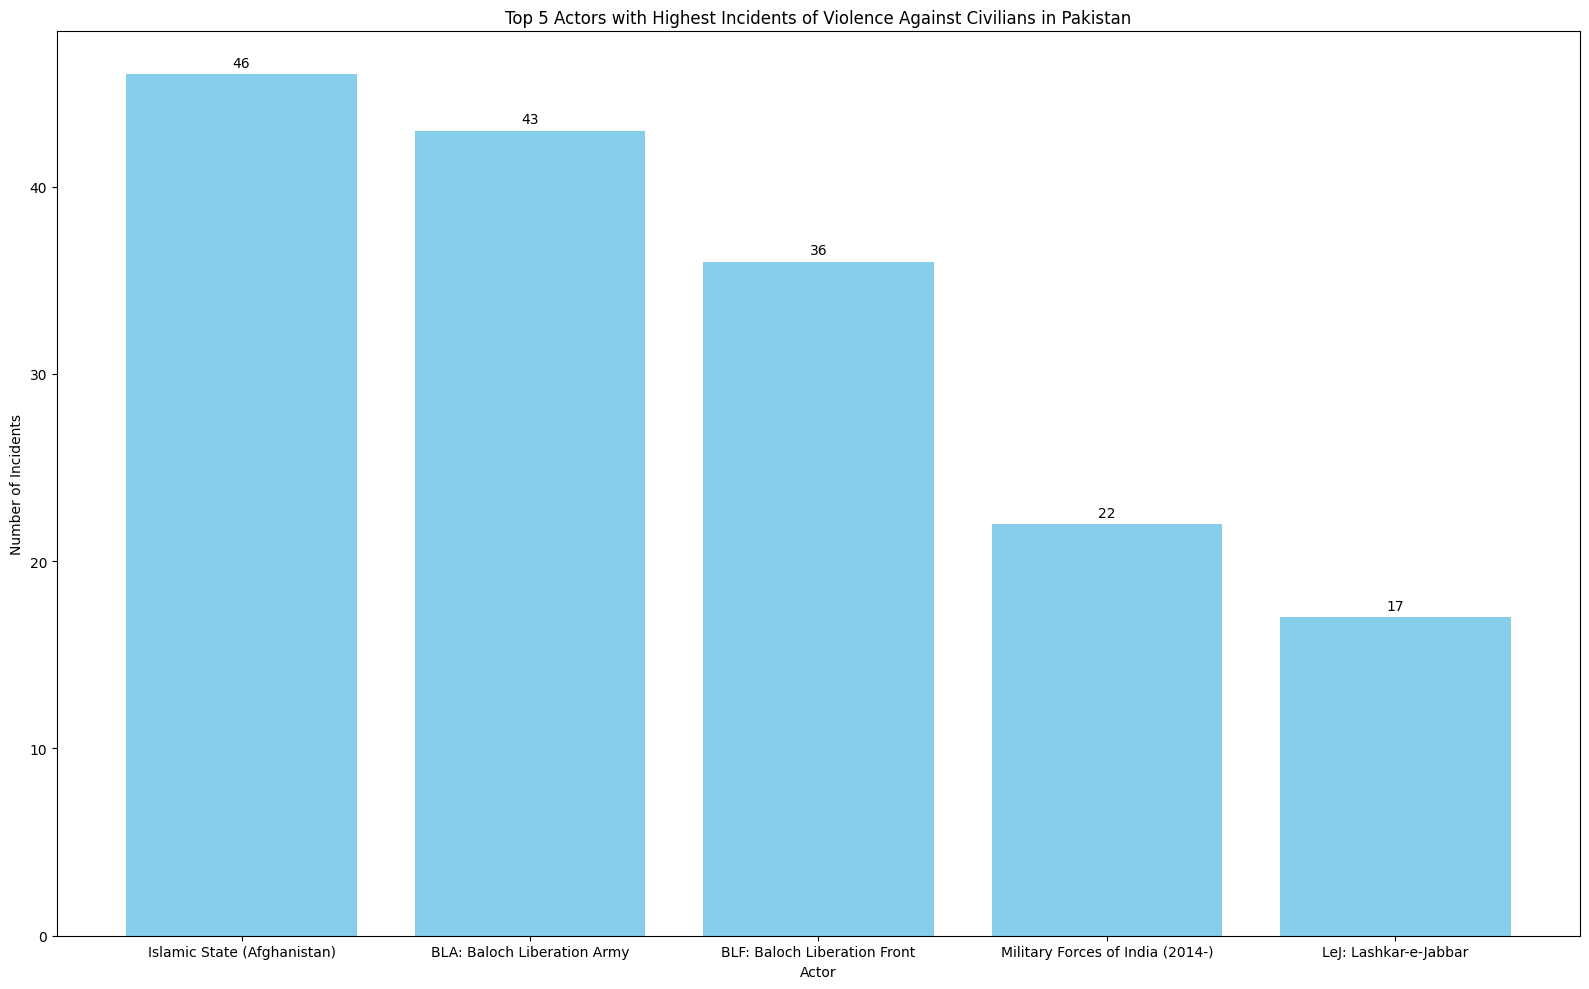

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/My Drive/Conflict_data/ACLED/asia_conflict_data.csv'
df = pd.read_csv(file_path)

# Filter for Greece and 'Violence against civilians'
greece_violence_data = df[(df['country'] == 'Pakistan') & (df['event_type'] == 'Violence against civilians')]

# Remove any 'actor1' entries that contain the word 'Greece'
greece_violence_data = greece_violence_data[~greece_violence_data['actor1'].str.contains('Pakistan', na=False)]

# Group by 'actor1' and count the total number of events
actor_counts = greece_violence_data['actor1'].value_counts()

# Identify the top 5 actors with the highest total incidents
top_5_actors = actor_counts.head(5)

# Plot the data
plt.figure(figsize=(16, 10))
bars = plt.bar(top_5_actors.index, top_5_actors.values, color='skyblue')

# Annotate the bars with the total incidents
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

plt.title('Top 5 Actors with Highest Incidents of Violence Against Civilians in Pakistan')
plt.xlabel('Actor')
plt.ylabel('Number of Incidents')
plt.tight_layout()

# Show the plot
plt.show()

<ipython-input-7-ff4a86d2a88e>:6: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


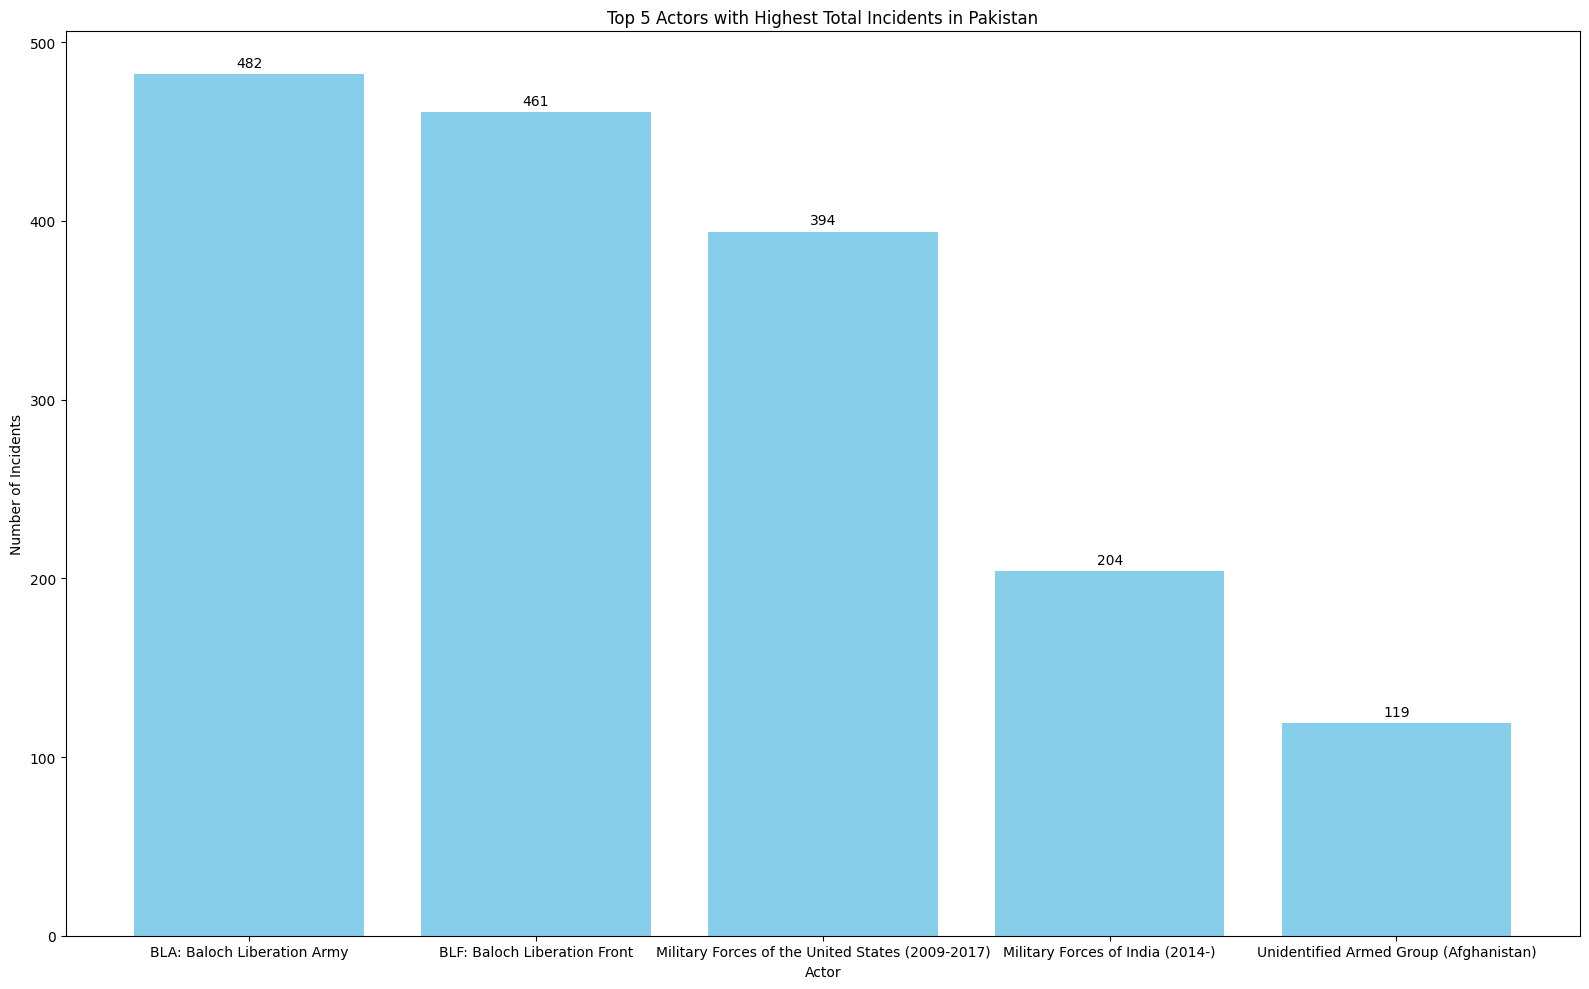

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/My Drive/Conflict_data/ACLED/asia_conflict_data.csv'
df = pd.read_csv(file_path)

# Filter for Greece
greece_data = df[df['country'] == 'Pakistan']

# Remove any 'actor1' entries that contain the word 'Pakistan'
greece_data = greece_data[~greece_data['actor1'].str.contains('Pakistan', na=False)]

# Group by 'actor1' and count the total number of events
actor_counts = greece_data['actor1'].value_counts()

# Identify the top 5 actors with the highest total incidents
top_5_actors = actor_counts.head(5)

# Plot the data
plt.figure(figsize=(16, 10))
bars = plt.bar(top_5_actors.index, top_5_actors.values, color='skyblue')

# Annotate the bars with the total incidents
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

plt.title('Top 5 Actors with Highest Total Incidents in Pakistan')
plt.xlabel('Actor')
plt.ylabel('Number of Incidents')
plt.tight_layout()

# Show the plot
plt.show()

<ipython-input-4-dbd895e10755>:5: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/My Drive/Conflict_data/ACLED/asia_conflict_data.csv')


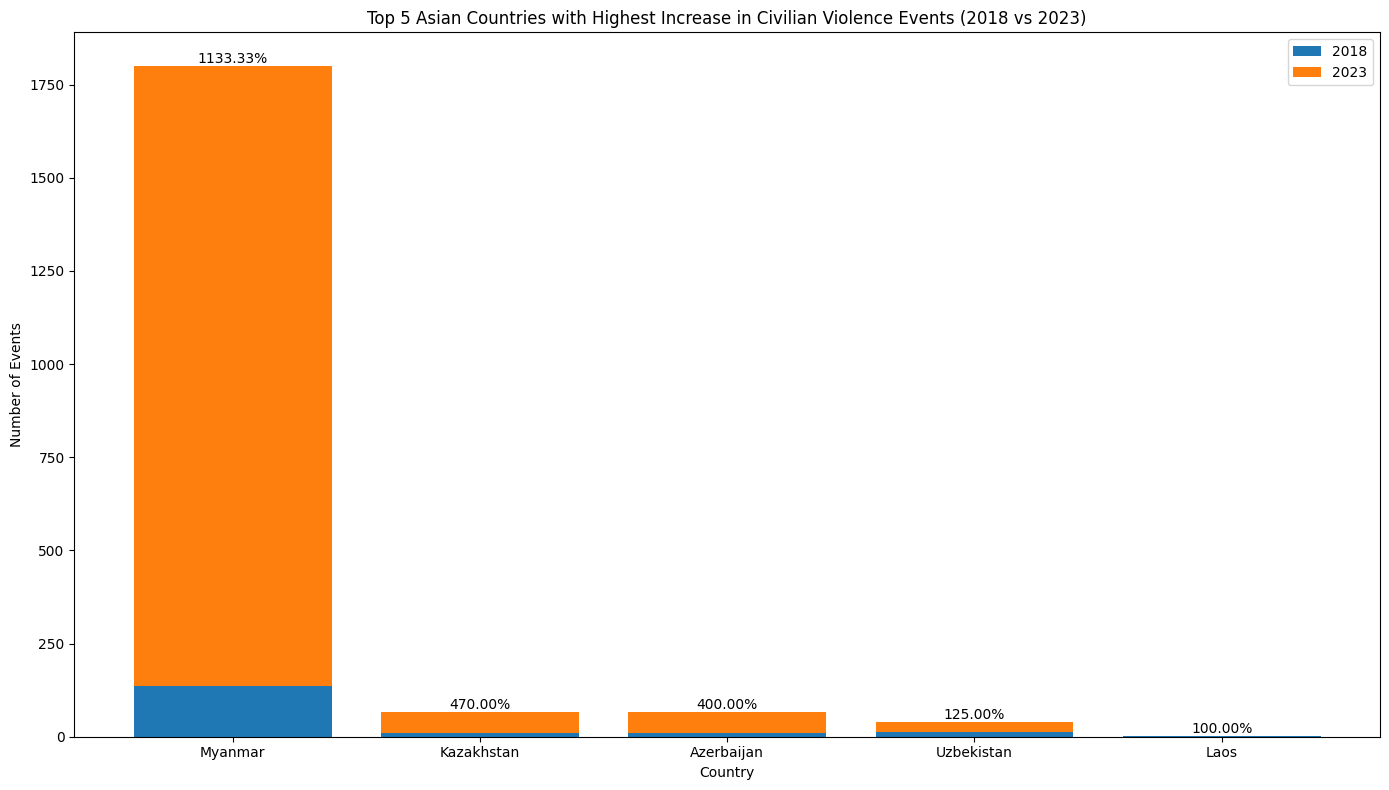

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/drive/My Drive/Conflict_data/ACLED/asia_conflict_data.csv')

# Filter the dataset for Civilian Violence
civilian_violence_data = data[data['event_type'].isin(['Violence against civilians'])]

# Calculate the number of Civilian Violence events by country for 2018 and 2023
data_2018 = civilian_violence_data[civilian_violence_data['year'] == 2018]
data_2023 = civilian_violence_data[civilian_violence_data['year'] == 2023]

# Group by country to get the count of events for each country in 2018 and 2023
counts_2018 = data_2018['country'].value_counts()
counts_2023 = data_2023['country'].value_counts()

# Create a DataFrame to hold the counts for 2018 and 2023
comparison_df = pd.DataFrame({'2018': counts_2018, '2023': counts_2023}).fillna(0)

# Calculate the percentage change
comparison_df['Percentage Change'] = ((comparison_df['2023'] - comparison_df['2018']) / comparison_df['2018'].replace(0, 1)) * 100

# Get the top 5 countries with the highest percentage change
top_5_countries = comparison_df.nlargest(5, 'Percentage Change')

# Create a bar graph with the 2018 and 2023 amounts for each country and the percentage change as the label
plt.figure(figsize=(14, 8))
bars_2018 = plt.bar(top_5_countries.index, top_5_countries['2018'], label='2018')
bars_2023 = plt.bar(top_5_countries.index, top_5_countries['2023'], bottom=top_5_countries['2018'], label='2023')

# Adding percentage change labels
for i, country in enumerate(top_5_countries.index):
    plt.text(i, top_5_countries.loc[country, '2023'] + top_5_countries.loc[country, '2018'], f"{top_5_countries.loc[country, 'Percentage Change']:.2f}%", ha='center', va='bottom')

plt.title('Top 5 Asian Countries with Highest Increase in Civilian Violence Events (2018 vs 2023)')
plt.xlabel('Country')
plt.ylabel('Number of Events')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

<ipython-input-3-8442a6d67095>:5: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/My Drive/Conflict_data/ACLED/asia_conflict_data.csv')
<ipython-input-3-8442a6d67095>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['year'] == 2024, 'annualized_count'] = (data_2024.shape[0] / 6) * 12
<ipython-input-3-8442a6d67095>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['year'] == 2024, 'annualized_count'

<Figure size 1400x800 with 0 Axes>

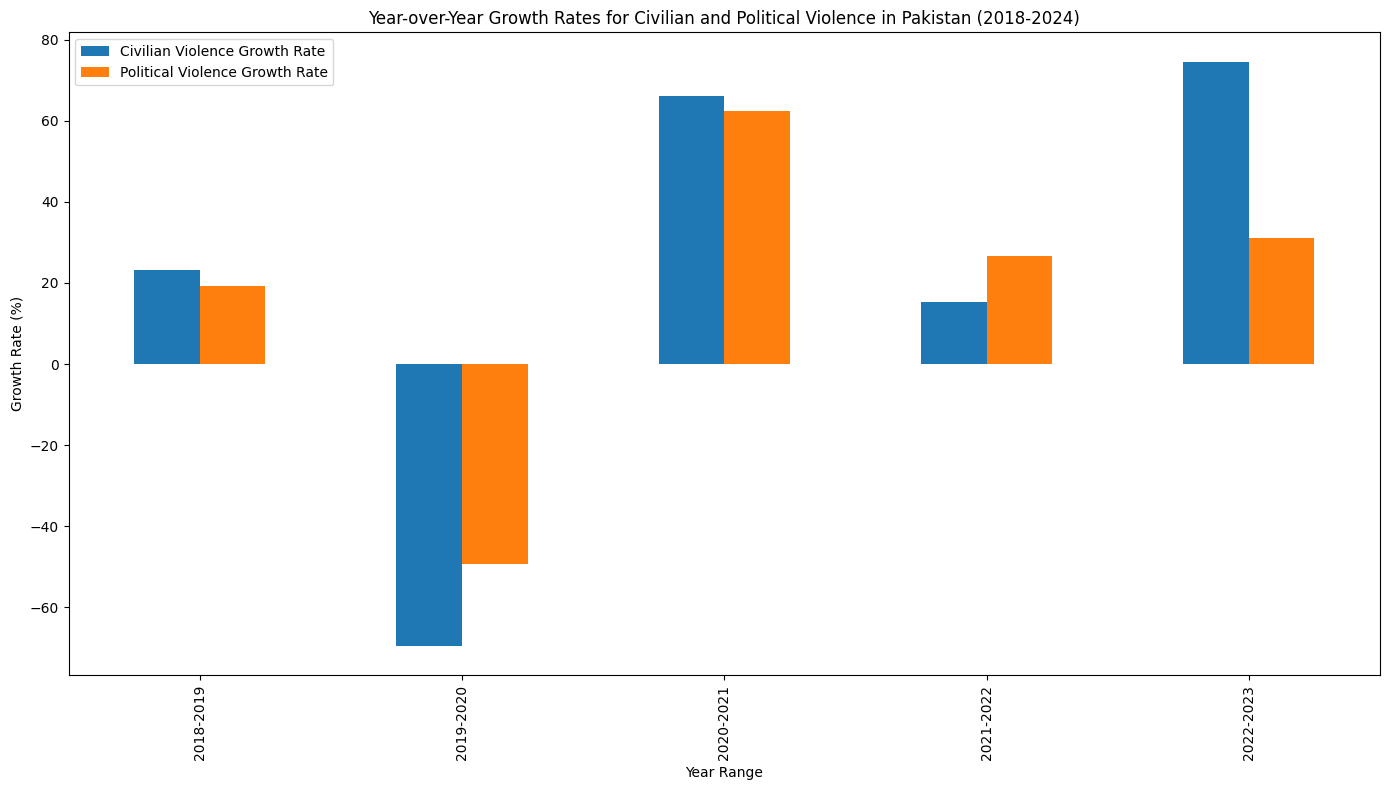

Year-over-Year Growth Rates for Civilian and Political Violence in Pakistan (2018-2024):
           Civilian Violence Growth Rate  Political Violence Growth Rate
2018-2019                      23.291925                       19.266055
2019-2020                     -69.521411                      -49.230769
2020-2021                      66.115702                       62.289562
2021-2022                      15.422886                       26.763485
2022-2023                      74.568966                       31.178396


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/drive/My Drive/Conflict_data/ACLED/asia_conflict_data.csv')

# Filter the dataset for Civilian and Political Violence
civilian_violence_data = data[data['event_type'] == 'Violence against civilians']
political_violence_data = data[data['disorder_type'].isin(['Political violence', 'Political violence; Demonstrations'])]

# Annualize 2024 data
def annualize_2024_data(df):
    data_2024 = df[df['year'] == 2024]
    if not data_2024.empty:
        df.loc[df['year'] == 2024, 'annualized_count'] = (data_2024.shape[0] / 6) * 12
    return df

# Annualize 2024 data for both datasets
civilian_violence_data = annualize_2024_data(civilian_violence_data)
political_violence_data = annualize_2024_data(political_violence_data)

# Function to calculate the year-over-year growth rate for a specific country
def calculate_growth_rate_country(df, country, start_year, end_year):
    growth_rates = []
    years = []
    for year in range(start_year, end_year):
        next_year = year + 1
        counts_current_year = df[(df['year'] == year) & (df['country'] == country)].shape[0]
        if year == 2023:  # Use annualized 2024 data
            counts_next_year = df[(df['year'] == 2024) & (df['country'] == country)]['annualized_count'].sum()
        else:
            counts_next_year = df[(df['year'] == next_year) & (df['country'] == country)].shape[0]
        if counts_current_year == 0:
            growth_rate = 0
        else:
            growth_rate = ((counts_next_year - counts_current_year) / counts_current_year) * 100
        growth_rates.append(growth_rate)
        years.append(f'{year}-{next_year}')
    return pd.Series(growth_rates, index=years)

# Calculate the growth rates for Civilian Violence in Pakistan from 2018 to 2024
civilian_growth_pakistan = calculate_growth_rate_country(civilian_violence_data, 'Pakistan', 2018, 2023)
# Calculate the growth rates for Political Violence in Pakistan from 2018 to 2024
political_growth_pakistan  = calculate_growth_rate_country(political_violence_data, 'Pakistan', 2018, 2023)

# Create a DataFrame to hold both growth rates
growth_pakistan_df = pd.DataFrame({
    'Civilian Violence Growth Rate': civilian_growth_pakistan,
    'Political Violence Growth Rate': political_growth_pakistan
})

# Plot the data
plt.figure(figsize=(14, 8))
growth_pakistan_df.plot(kind='bar', figsize=(14, 8))
plt.title('Year-over-Year Growth Rates for Civilian and Political Violence in Pakistan (2018-2024)')
plt.xlabel('Year Range')
plt.ylabel('Growth Rate (%)')
plt.legend()
plt.tight_layout()
plt.show()

# Print the year-over-year growth rates for Civilian and Political Violence in Pakistan
print("Year-over-Year Growth Rates for Civilian and Political Violence in Pakistan (2018-2024):")
print(growth_pakistan_df)

<ipython-input-3-58d17e1612c9>:5: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/My Drive/Conflict_data/ACLED/asia_conflict_data.csv')


<Figure size 1400x800 with 0 Axes>

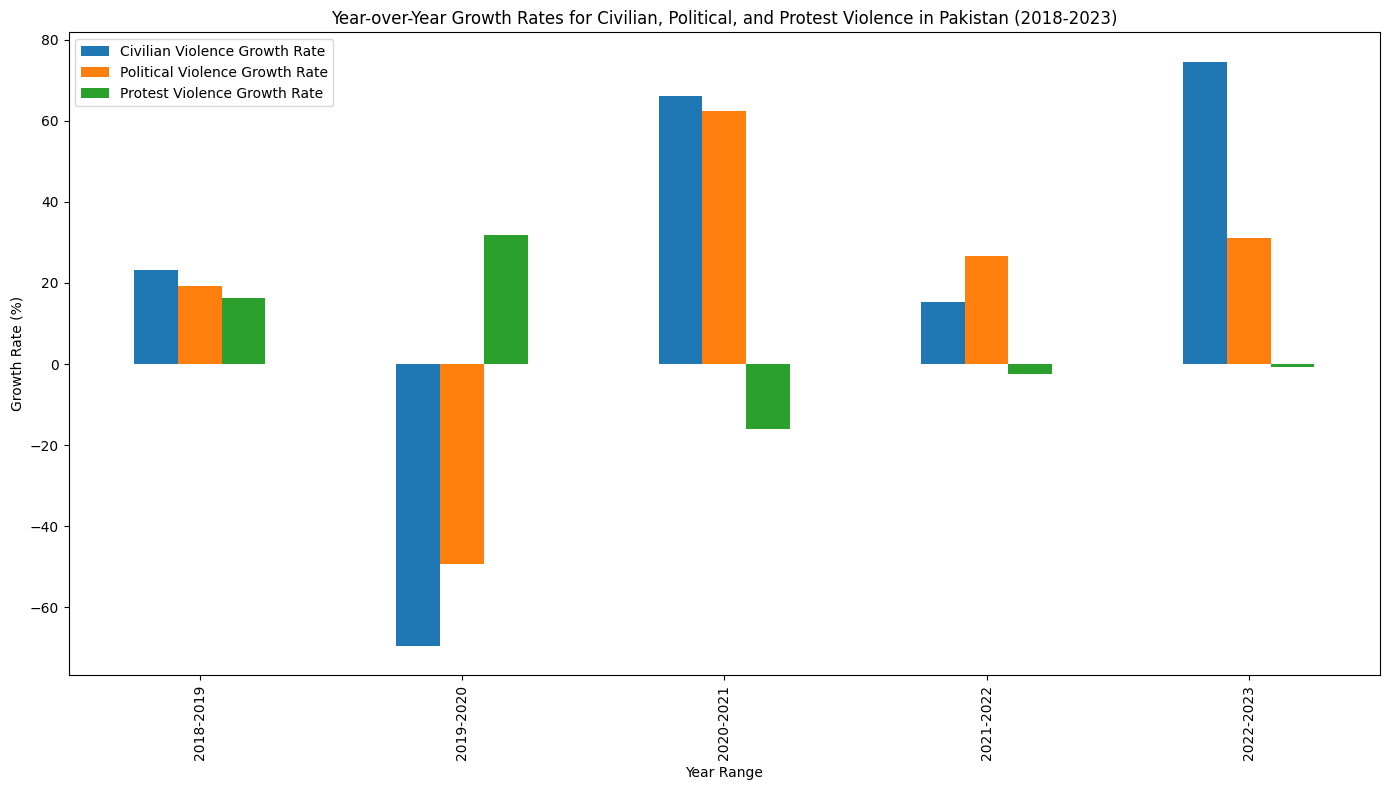

Year-over-Year Growth Rates for Civilian, Political, and Protest Violence in Pakistan (2018-2023):
           Civilian Violence Growth Rate  Political Violence Growth Rate  \
2018-2019                      23.291925                       19.266055   
2019-2020                     -69.521411                      -49.230769   
2020-2021                      66.115702                       62.289562   
2021-2022                      15.422886                       26.763485   
2022-2023                      74.568966                       31.178396   

           Protest Violence Growth Rate  
2018-2019                     16.257377  
2019-2020                     31.930571  
2020-2021                    -16.097803  
2021-2022                     -2.470414  
2022-2023                     -0.697710  


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/drive/My Drive/Conflict_data/ACLED/asia_conflict_data.csv')

# Filter the dataset for Civilian, Political, and Protest Violence
civilian_violence_data = data[data['event_type'] == 'Violence against civilians'].copy()
political_violence_data = data[data['disorder_type'].isin(['Political violence', 'Political violence; Demonstrations'])].copy()
protest_violence_data = data[data['event_type'].isin(['Protests'])].copy()

# Annualize 2024 data
def annualize_2024_data(df):
    data_2024 = df[df['year'] == 2024]
    if not data_2024.empty:
        df.loc[df['year'] == 2024, 'annualized_count'] = (data_2024.shape[0] / 6) * 12
    return df

# Annualize 2024 data for all datasets
civilian_violence_data = annualize_2024_data(civilian_violence_data)
political_violence_data = annualize_2024_data(political_violence_data)
protest_violence_data = annualize_2024_data(protest_violence_data)

# Function to calculate the year-over-year growth rate for a specific country
def calculate_growth_rate_country(df, country, start_year, end_year):
    growth_rates = []
    years = []
    for year in range(start_year, end_year):
        next_year = year + 1
        counts_current_year = df[(df['year'] == year) & (df['country'] == country)].shape[0]
        if year == 2023:  # Use annualized 2024 data
            counts_next_year = df[(df['year'] == 2024) & (df['country'] == country)]['annualized_count'].sum()
        else:
            counts_next_year = df[(df['year'] == next_year) & (df['country'] == country)].shape[0]
        if counts_current_year == 0:
            growth_rate = 0
        else:
            growth_rate = ((counts_next_year - counts_current_year) / counts_current_year) * 100
        growth_rates.append(growth_rate)
        years.append(f'{year}-{next_year}')
    return pd.Series(growth_rates, index=years)

# Calculate the growth rates for Civilian Violence in Pakistan from 2018 to 2024
civilian_growth_pakistan = calculate_growth_rate_country(civilian_violence_data, 'Pakistan', 2018, 2023)
# Calculate the growth rates for Political Violence in Pakistan from 2018 to 2024
political_growth_pakistan = calculate_growth_rate_country(political_violence_data, 'Pakistan', 2018, 2023)
# Calculate the growth rates for Protest Violence in Pakistan from 2018 to 2024
protest_growth_pakistan = calculate_growth_rate_country(protest_violence_data, 'Pakistan', 2018, 2023)

# Create a DataFrame to hold all three growth rates
growth_pakistan_df = pd.DataFrame({
    'Civilian Violence Growth Rate': civilian_growth_pakistan,
    'Political Violence Growth Rate': political_growth_pakistan,
    'Protest Violence Growth Rate': protest_growth_pakistan
})

# Plot the data
plt.figure(figsize=(14, 8))
growth_pakistan_df.plot(kind='bar', figsize=(14, 8))
plt.title('Year-over-Year Growth Rates for Civilian, Political, and Protest Violence in Pakistan (2018-2023)')
plt.xlabel('Year Range')
plt.ylabel('Growth Rate (%)')
plt.legend()
plt.tight_layout()
plt.show()

# Print the year-over-year growth rates for Civilian, Political, and Protest Violence in Pakistan
print("Year-over-Year Growth Rates for Civilian, Political, and Protest Violence in Pakistan (2018-2023):")
print(growth_pakistan_df)

### Top 5 Pakistan actors with the highest average year-over-year growth rates
---

<ipython-input-3-707297d0a857>:6: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Top 15 Actors in Pakistan (2018-2023) by Average Year-Over-Year Growth Rate:
Sunni Muslim Militia (Pakistan): 900.00%
Islamic State (Afghanistan): 598.15%
Police Forces of Pakistan (2022-) Bomb Disposal Squad: 500.00%
BLF: Baloch Liberation Front: 291.85%
Baloch Separatists (Pakistan): 283.81%
Wazir Tribal Militia (Pakistan): 200.00%
Police Forces of Pakistan (2018-2022) Special Security Unit: 200.00%
Military Forces of Pakistan (2018-2022): 198.28%
Police Forces of Pakistan (2018-2022) Counter Terrorism Department: 197.67%
Police Forces of Pakistan (2018-2022) Bomb Disposal Squad: 190.83%
Unidentified Tribal Militia (Pakistan): 182.00%
Police Forces of Pakistan (2022-): 148.78%
Protesters (Afghanistan): 120.00%
SRA: Sindhudesh Revolutionary Army: 115.00%
TTP: Tehreek-i-Taliban Pakistan: 112.91%


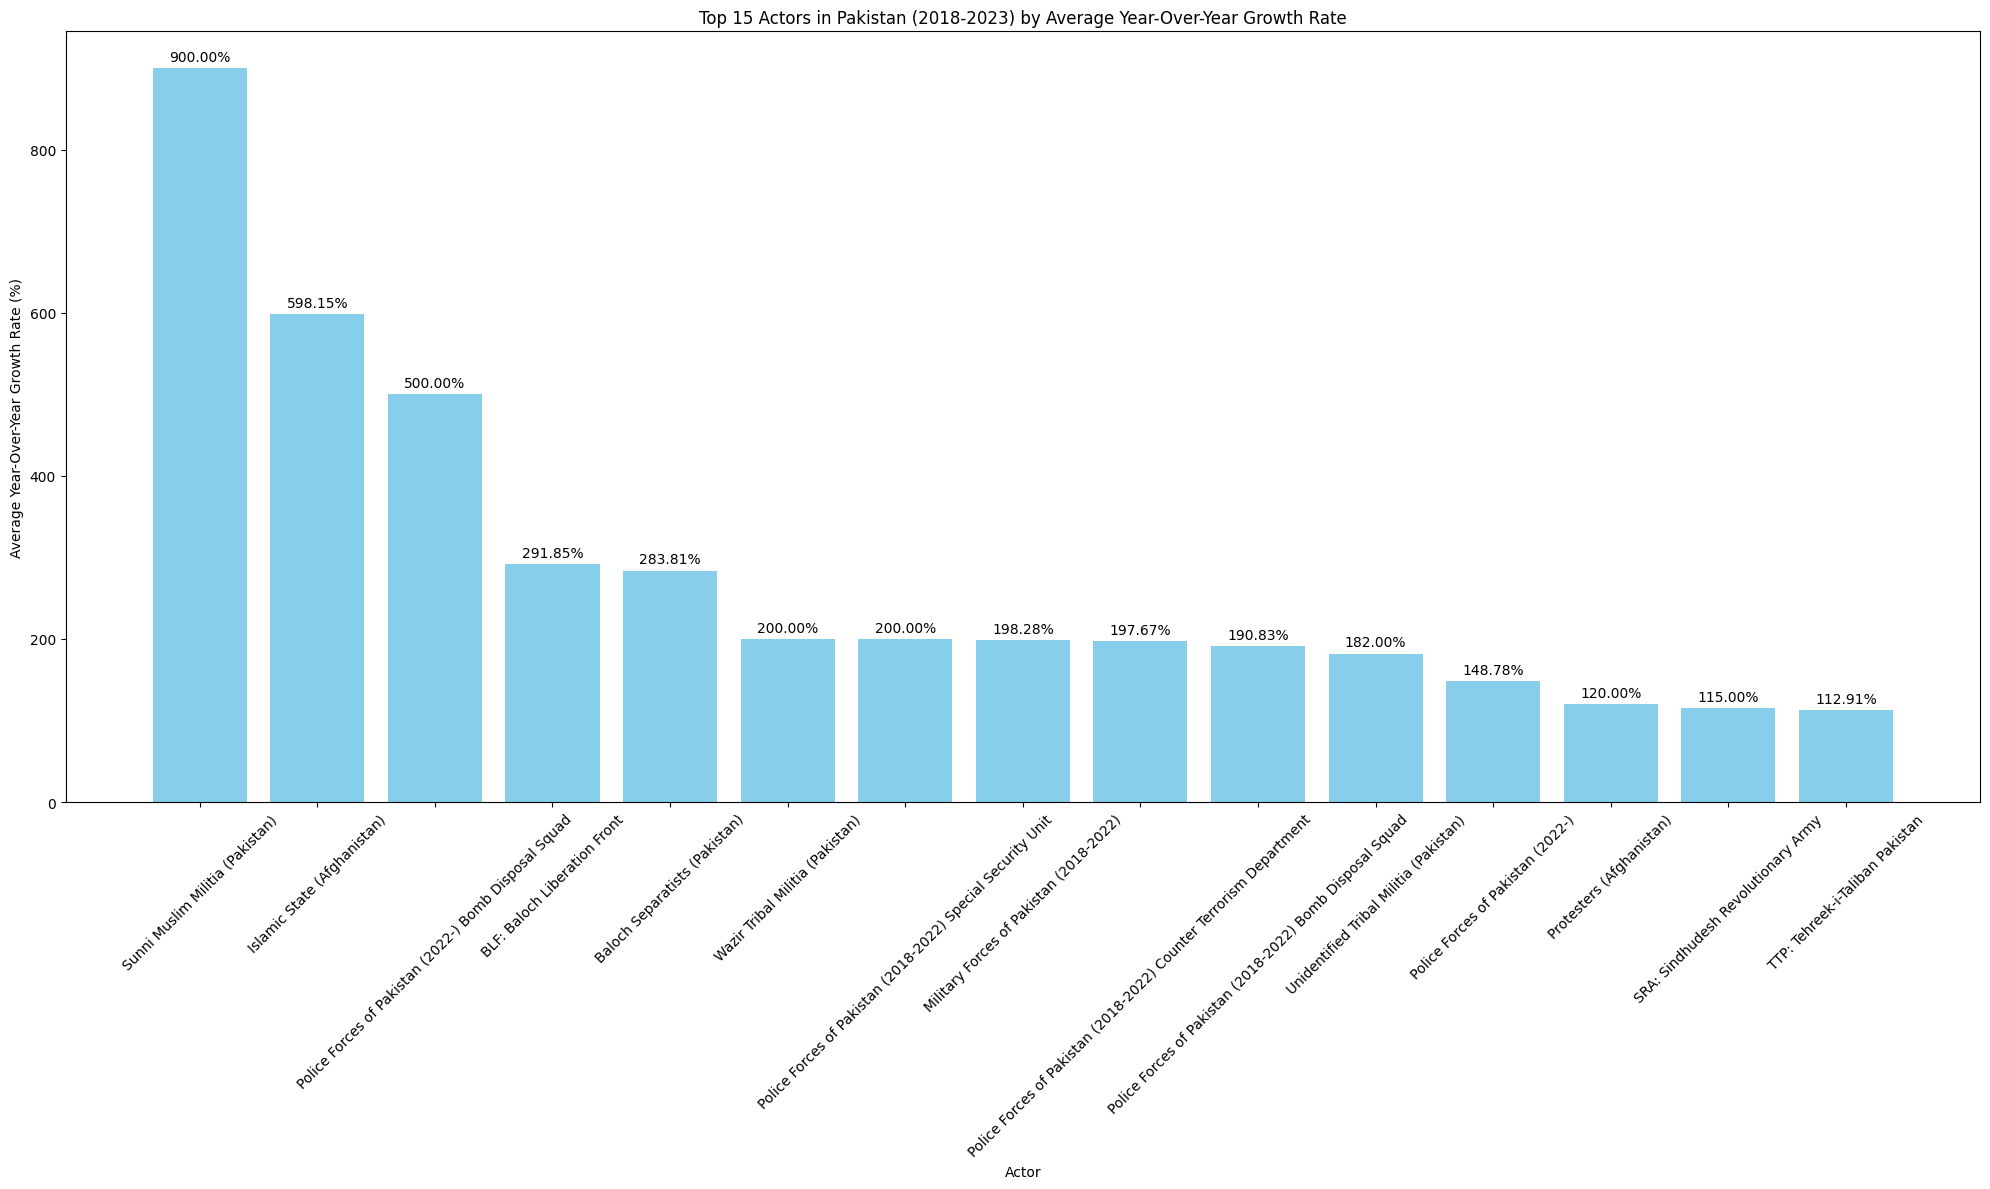

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/My Drive/Conflict_data/ACLED/asia_conflict_data.csv'
df = pd.read_csv(file_path)

# Filter for country and the years 2018-2023
pakistan_data = df[(df['country'] == 'Pakistan') & (df['year'].between(2018, 2023))]

# Create a function to calculate year-over-year growth for a specific actor
def calculate_actor_growth_rate(df, actor):
    actor_data = df[df['actor1'] == actor]
    growth_rates = []
    years = sorted(actor_data['year'].unique())
    for i in range(len(years) - 1):
        year = years[i]
        next_year = years[i + 1]
        count_current_year = actor_data[actor_data['year'] == year].shape[0]
        count_next_year = actor_data[actor_data['year'] == next_year].shape[0]
        if count_current_year == 0:
            growth_rate = 0
        else:
            growth_rate = ((count_next_year - count_current_year) / count_current_year) * 100
        growth_rates.append(growth_rate)
    if growth_rates:
        average_growth_rate = sum(growth_rates) / len(growth_rates)
    else:
        average_growth_rate = 0
    return average_growth_rate

# Calculate the average year-over-year growth rate for each actor
actor_growth_rates = {}
for actor in pakistan_data['actor1'].unique():
    avg_growth_rate = calculate_actor_growth_rate(pakistan_data, actor)
    actor_growth_rates[actor] = avg_growth_rate

# Convert to a DataFrame and sort by the highest average growth rate
actor_growth_rates_df = pd.DataFrame(list(actor_growth_rates.items()), columns=['Actor', 'Average Year-Over-Year Growth Rate'])
top_15_actors_growth = actor_growth_rates_df.nlargest(15, 'Average Year-Over-Year Growth Rate')

# Print the top 5 actors with the highest average year-over-year growth rates
print("Top 15 Actors in Pakistan (2018-2023) by Average Year-Over-Year Growth Rate:")
for index, row in top_15_actors_growth.iterrows():
    print(f"{row['Actor']}: {row['Average Year-Over-Year Growth Rate']:.2f}%")

# Plot the data
plt.figure(figsize=(20, 12))
bars = plt.bar(top_15_actors_growth['Actor'], top_15_actors_growth['Average Year-Over-Year Growth Rate'], color='skyblue')

# Annotate the bars with the average growth rate
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

plt.title('Top 15 Actors in Pakistan (2018-2023) by Average Year-Over-Year Growth Rate')
plt.xlabel('Actor')
plt.ylabel('Average Year-Over-Year Growth Rate (%)')
plt.tight_layout()

# Show the plot
plt.show()

### Top 5 actors in Pakistan for “Violence against civilians” showing the highest average year-over-year growth rate 2018 to 2023
---

<ipython-input-4-80f942fcb8e3>:6: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Top 5 Actors in Pakistan (2018-2023) by Average Year-Over-Year Growth Rate for 'Violence against civilians':
Military Forces of Pakistan (2018-2022): 679.29%
Military Forces of Pakistan (2022-): 600.00%
Police Forces of Pakistan (2018-2022) Special Security Unit: 200.00%
TTP: Tehreek-i-Taliban Pakistan: 169.70%
BLA: Baloch Liberation Army: 166.67%


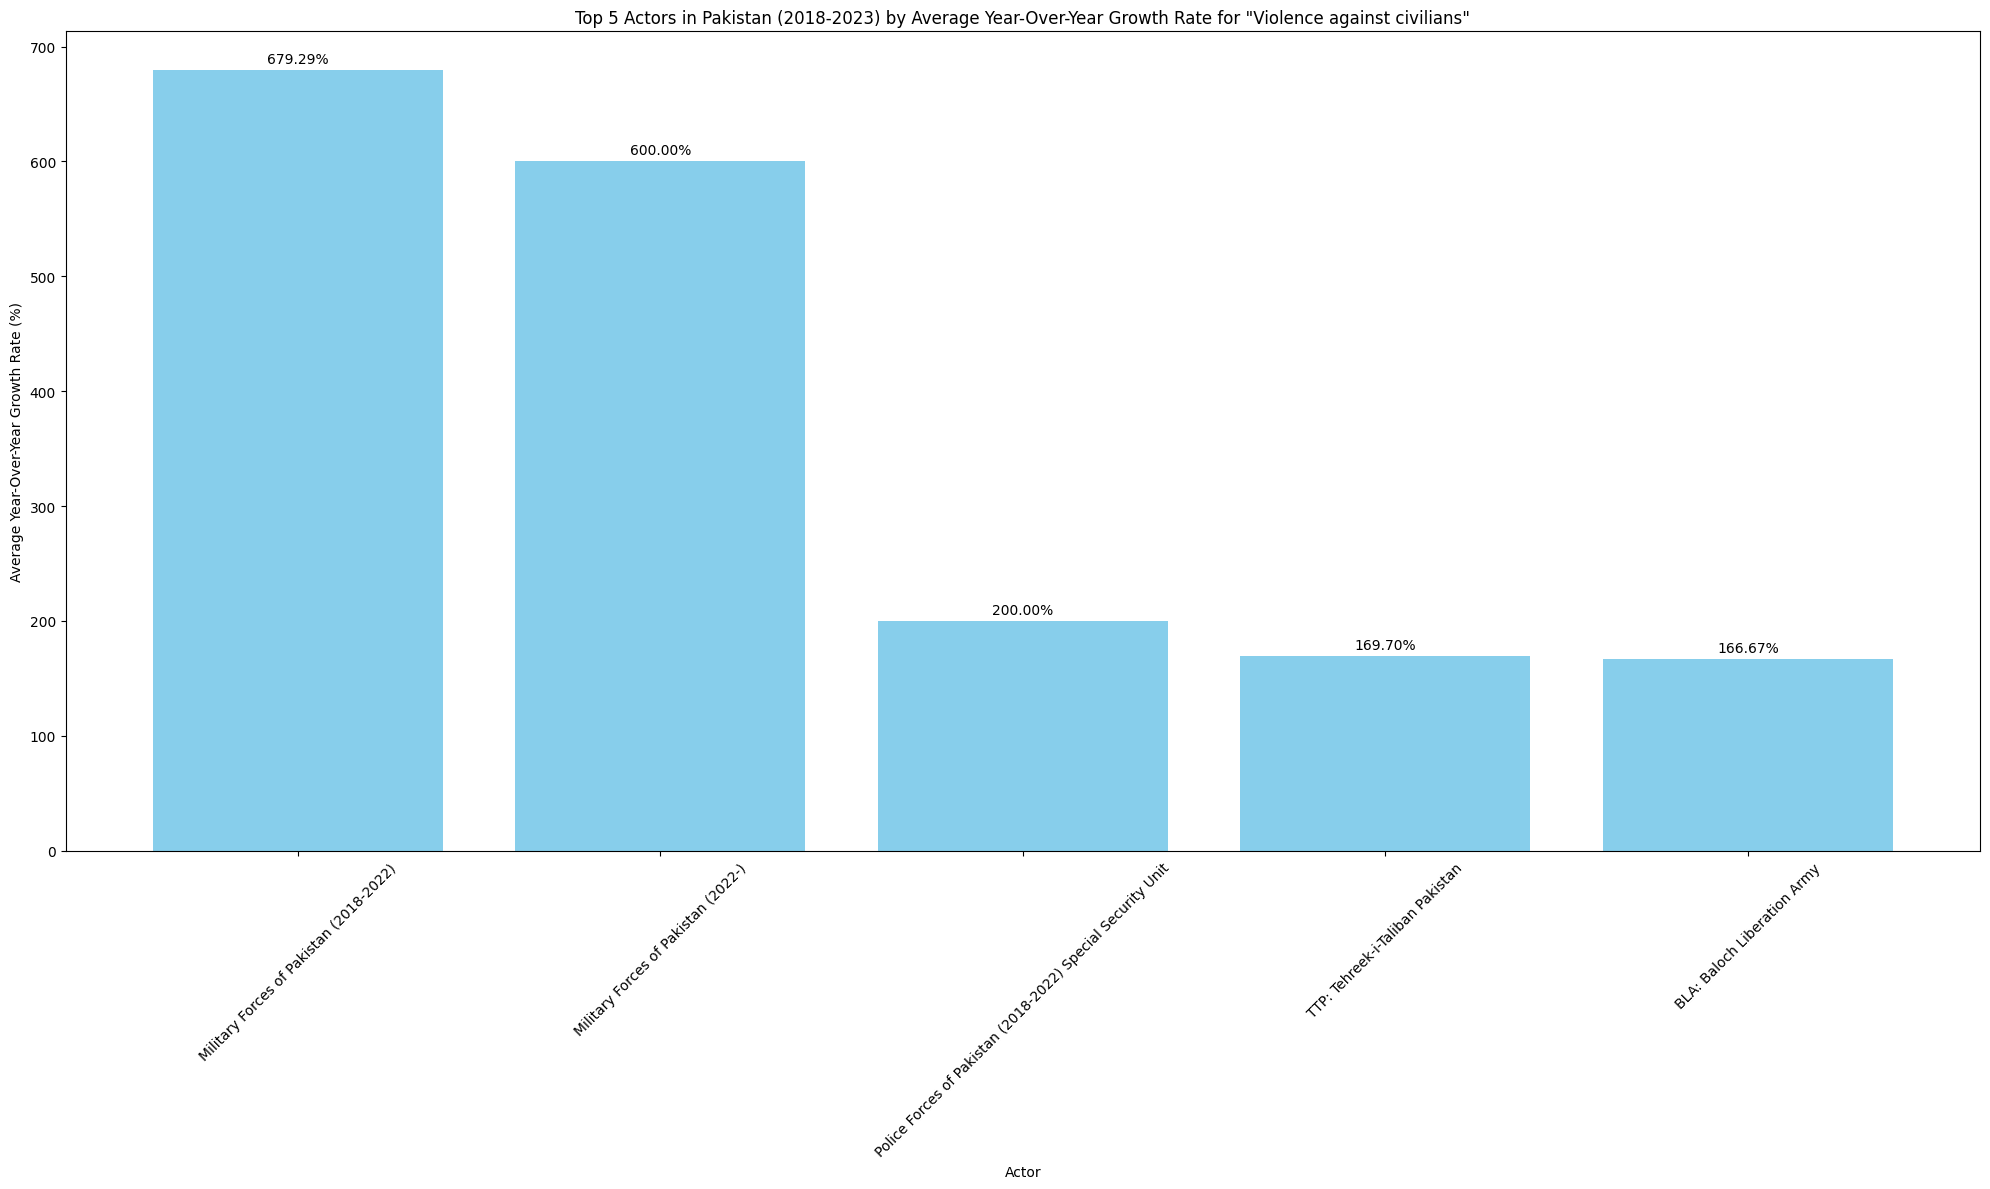

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/My Drive/Conflict_data/ACLED/asia_conflict_data.csv'
df = pd.read_csv(file_path)

# Filter for Pakistan, the years 2018-2023, and the event type 'Violence against civilians'
pakistan_violence_data = df[(df['country'] == 'Pakistan') & (df['year'].between(2018, 2023)) & (df['event_type'] == 'Violence against civilians')]

# Create a function to calculate year-over-year growth for a specific actor
def calculate_actor_growth_rate(df, actor):
    actor_data = df[df['actor1'] == actor]
    growth_rates = []
    years = sorted(actor_data['year'].unique())
    for i in range(len(years) - 1):
        year = years[i]
        next_year = years[i + 1]
        count_current_year = actor_data[actor_data['year'] == year].shape[0]
        count_next_year = actor_data[actor_data['year'] == next_year].shape[0]
        if count_current_year == 0:
            growth_rate = 0
        else:
            growth_rate = ((count_next_year - count_current_year) / count_current_year) * 100
        growth_rates.append(growth_rate)
    if growth_rates:
        average_growth_rate = sum(growth_rates) / len(growth_rates)
    else:
        average_growth_rate = 0
    return average_growth_rate

# Calculate the average year-over-year growth rate for each actor
actor_growth_rates = {}
for actor in pakistan_violence_data['actor1'].unique():
    avg_growth_rate = calculate_actor_growth_rate(pakistan_violence_data, actor)
    actor_growth_rates[actor] = avg_growth_rate

# Convert to a DataFrame and sort by the highest average growth rate
actor_growth_rates_df = pd.DataFrame(list(actor_growth_rates.items()), columns=['Actor', 'Average Year-Over-Year Growth Rate'])
top_5_actors_growth = actor_growth_rates_df.nlargest(5, 'Average Year-Over-Year Growth Rate')

# Print the top 5 actors with the highest average year-over-year growth rates
print("Top 5 Actors in Pakistan (2018-2023) by Average Year-Over-Year Growth Rate for 'Violence against civilians':")
for index, row in top_5_actors_growth.iterrows():
    print(f"{row['Actor']}: {row['Average Year-Over-Year Growth Rate']:.2f}%")

# Plot the data
plt.figure(figsize=(20, 12))
bars = plt.bar(top_5_actors_growth['Actor'], top_5_actors_growth['Average Year-Over-Year Growth Rate'], color='skyblue')

# Annotate the bars with the average growth rate
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

plt.title('Top 5 Actors in Pakistan (2018-2023) by Average Year-Over-Year Growth Rate for "Violence against civilians"')
plt.xlabel('Actor')
plt.ylabel('Average Year-Over-Year Growth Rate (%)')
plt.tight_layout()

# Show the plot
plt.show()

In [5]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/My Drive/Conflict_data/ACLED/asia_conflict_data.csv'
df = pd.read_csv(file_path)

# Define the actors to analyze
actors_of_interest = [
    "Military Forces of Pakistan (2018-2022)",
    "Military Forces of Pakistan (2022-)",
    "Police Forces of Pakistan (2018-2022) Special Security Unit",
    "TTP: Tehreek-i-Taliban Pakistan",
    "BLA: Baloch Liberation Army"
]

# Initialize a dictionary to store the ratios
ratios = {}

# Calculate the ratio for each actor
for actor in actors_of_interest:
    actor_data = df[df['actor1'] == actor]
    total_violence_against_civilians = actor_data[actor_data['event_type'] == 'Violence against civilians'].shape[0]
    total_event_type_instances = actor_data.shape[0]

    if total_event_type_instances == 0:
        ratio = 0
    else:
        ratio = total_violence_against_civilians / total_event_type_instances

    ratios[actor] = (total_violence_against_civilians, total_event_type_instances, ratio)

# Display the results
for actor, (violence_count, total_count, ratio) in ratios.items():
    print(f"Actor: {actor}")
    print(f"Total 'Violence against civilians' instances: {violence_count}")
    print(f"Total instances in 'event_type' category: {total_count}")
    print(f"Ratio: {ratio:.2f}\n")

<ipython-input-5-73ac914fb825>:5: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Actor: Military Forces of Pakistan (2018-2022)
Total 'Violence against civilians' instances: 52
Total instances in 'event_type' category: 448
Ratio: 0.12

Actor: Military Forces of Pakistan (2022-)
Total 'Violence against civilians' instances: 33
Total instances in 'event_type' category: 364
Ratio: 0.09

Actor: Police Forces of Pakistan (2018-2022) Special Security Unit
Total 'Violence against civilians' instances: 4
Total instances in 'event_type' category: 4
Ratio: 1.00

Actor: TTP: Tehreek-i-Taliban Pakistan
Total 'Violence against civilians' instances: 430
Total instances in 'event_type' category: 2882
Ratio: 0.15

Actor: BLA: Baloch Liberation Army
Total 'Violence against civilians' instances: 43
Total instances in 'event_type' category: 482
Ratio: 0.09



<ipython-input-6-895cd65c3902>:7: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


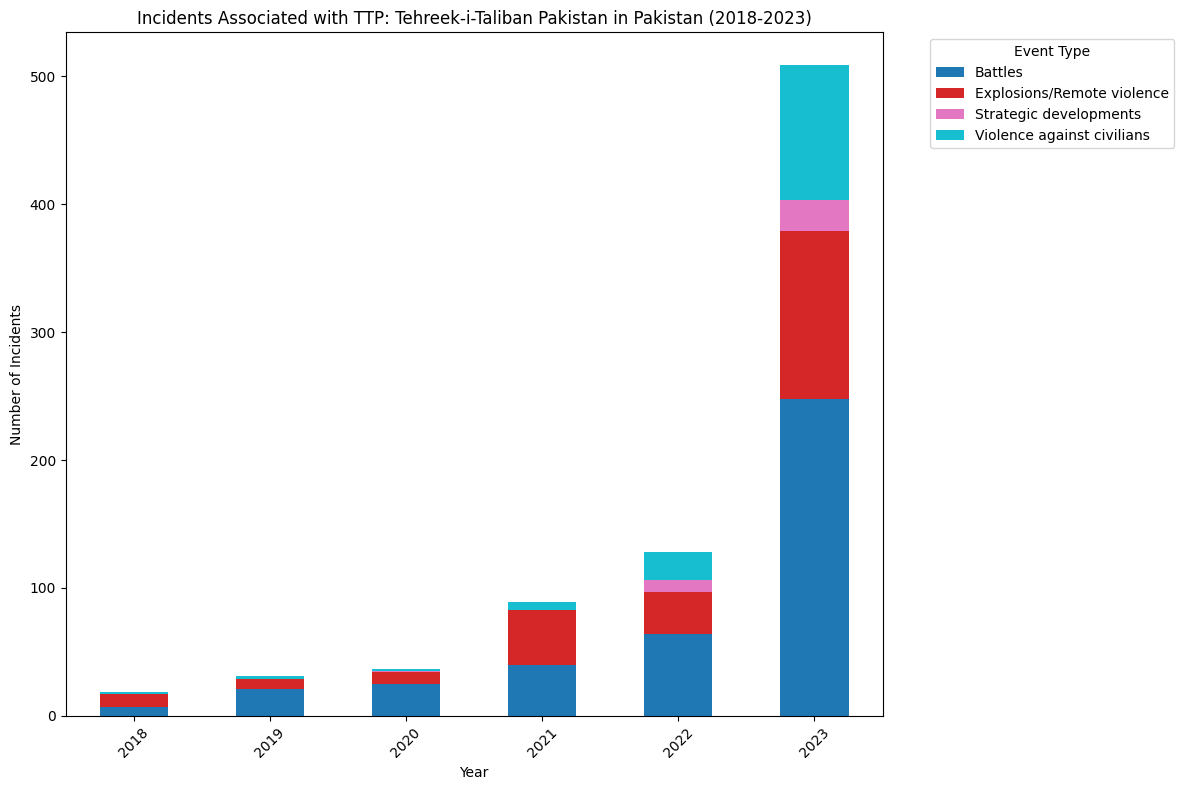

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/drive/My Drive/Conflict_data/ACLED/asia_conflict_data.csv'
df = pd.read_csv(file_path)

# Filter for country, the actor 'TTP: Tehreek-i-Taliban Pakistan', and the years 2018-2023
giants_data = df[(df['country'] == 'Pakistan') & (df['actor1'] == 'TTP: Tehreek-i-Taliban Pakistan') & (df['year'].between(2018, 2023))]

# Group by year and event_type, then count the number of incidents
incident_counts_by_year_type = giants_data.groupby(['year', 'event_type']).size().unstack(fill_value=0)

# Create the bar chart with a color palette
plt.figure(figsize=(12, 8))
incident_counts_by_year_type.plot(kind='bar', stacked=True, colormap='tab10', ax=plt.gca())

# Set the title and labels
plt.title('Incidents Associated with TTP: Tehreek-i-Taliban Pakistan in Pakistan (2018-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)

# Add legend
plt.legend(title='Event Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/drive/My Drive/Conflict_data/ACLED/asia_conflict_data.csv'
df = pd.read_csv(file_path)

# Filter for country, the actor 'TTP: Tehreek-i-Taliban Pakistan', and the years 2018-2023
giants_data = df[(df['country'] == 'Pakistan') & (df['actor1'] == 'TTP: Tehreek-i-Taliban Pakistan') & (df['year'].between(2018, 2023))]

# Group by year and event_type, then count the number of incidents
incident_counts_by_year_type = giants_data.groupby(['year', 'sub_event_type']).size().unstack(fill_value=0)

# Create the bar chart with a color palette
plt.figure(figsize=(12, 8))
incident_counts_by_year_type.plot(kind='bar', stacked=True, colormap='tab10', ax=plt.gca())

# Set the title and labels
plt.title('Incidents Associated with TTP: Tehreek-i-Taliban Pakistan in Pakistan (2018-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)

# Add legend
plt.legend(title='Event Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

# Show the plot
plt.show()

# Final Pakistan Analysis

###  Top 5 event_type categories for the country of Pakistan as an aggregate

<ipython-input-4-d7a8112ccfdf>:6: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


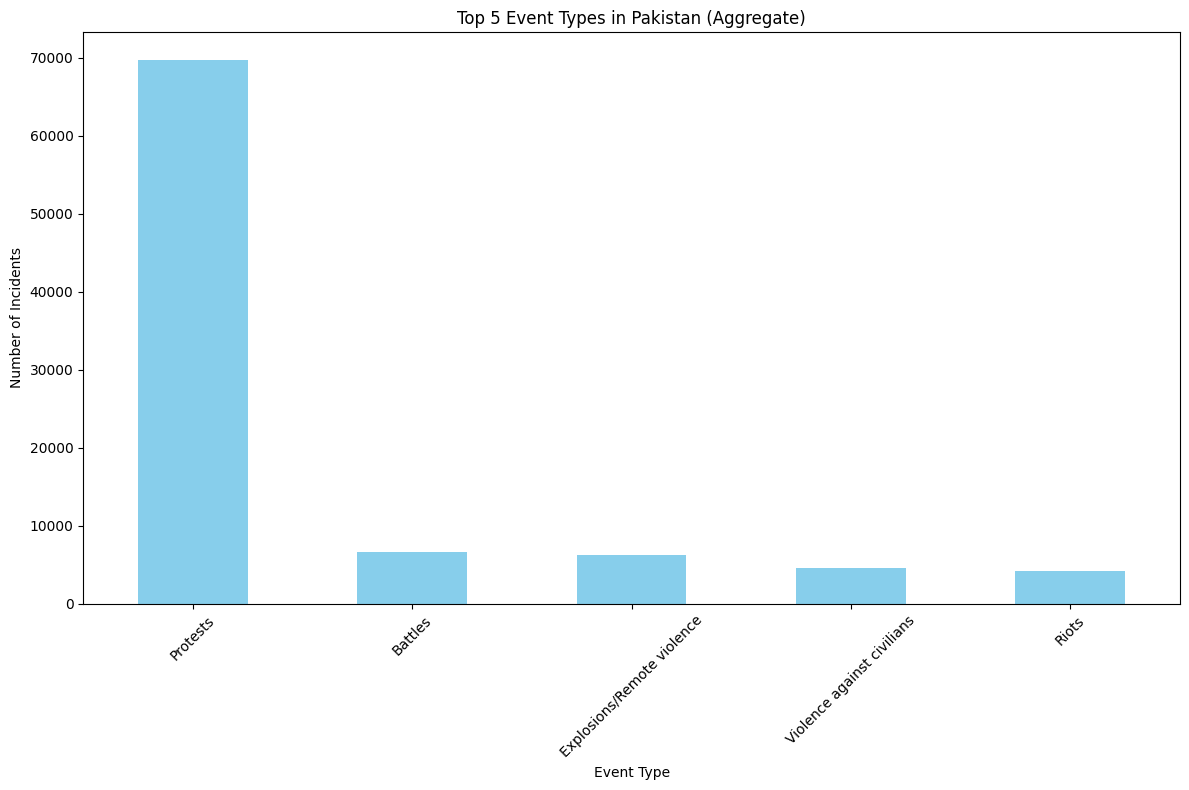

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/My Drive/Conflict_data/ACLED/asia_conflict_data.csv'
df = pd.read_csv(file_path)

# Filter for Yemen
yemen_data = df[df['country'] == 'Pakistan']

# Aggregate the total number of incidents by event_type
event_type_counts = yemen_data['event_type'].value_counts().nlargest(5)

# Create the bar chart
plt.figure(figsize=(12, 8))
event_type_counts.plot(kind='bar', color='skyblue')

# Set the title and labels
plt.title('Top 5 Event Types in Pakistan (Aggregate)')
plt.xlabel('Event Type')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)

plt.tight_layout()

# Show the plot
plt.show()

### Top 5 actors with the highest amounts of ‘Explosions/Remote Violence’


<ipython-input-7-bc8efa963b29>:6: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


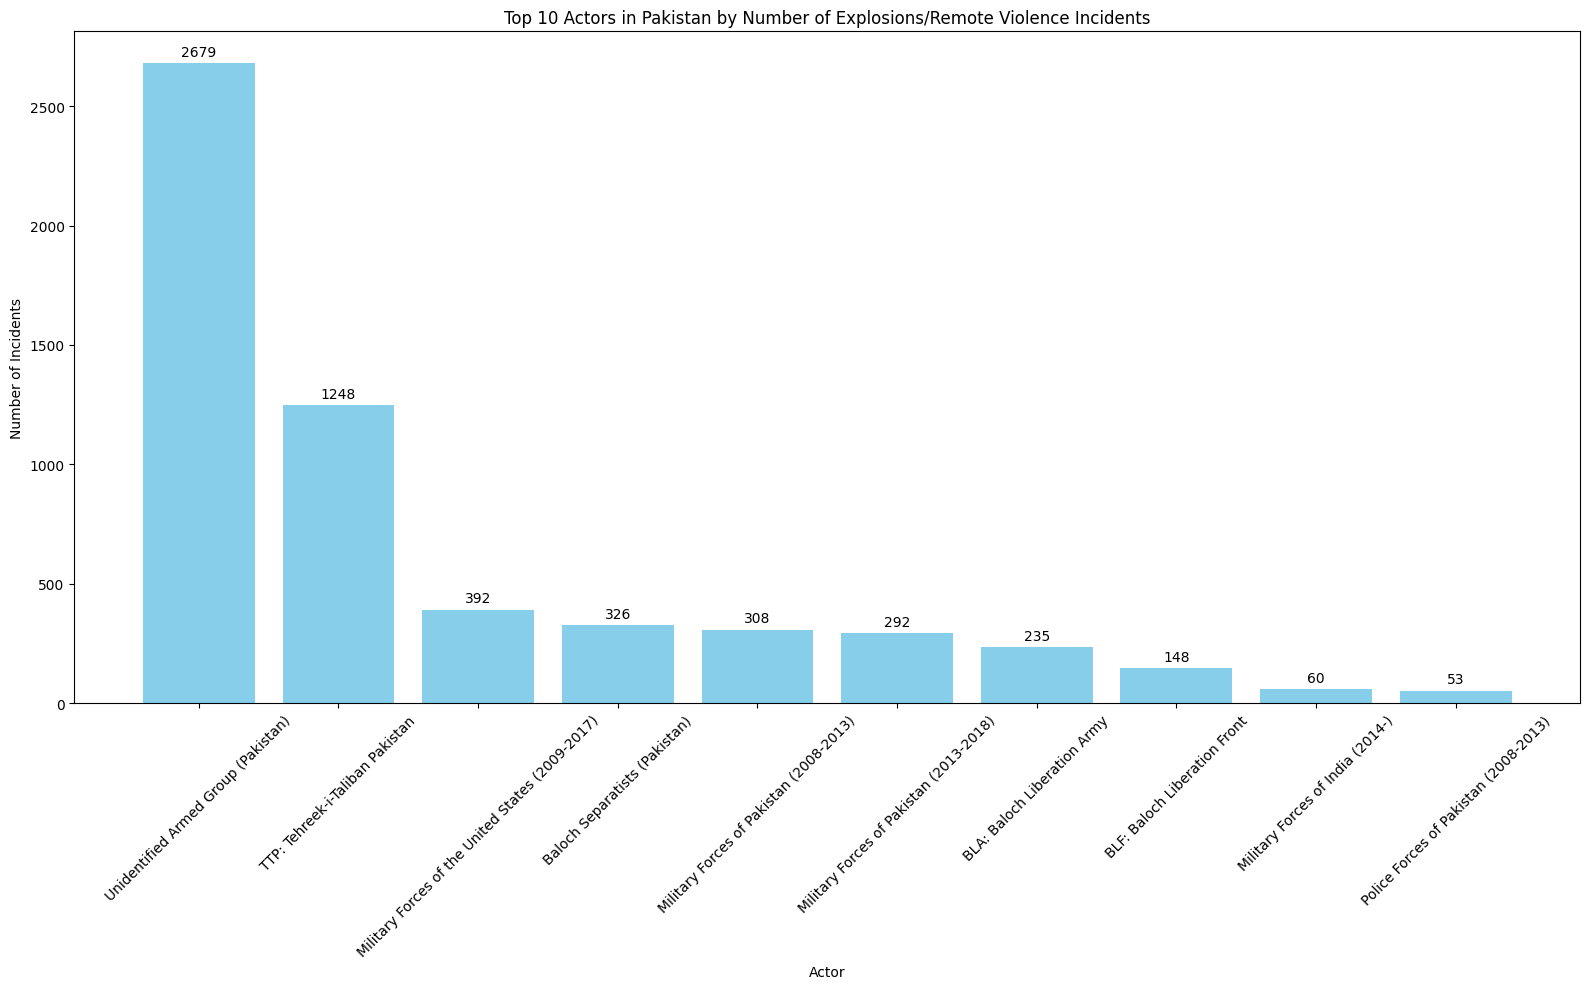

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/My Drive/Conflict_data/ACLED/asia_conflict_data.csv'
df = pd.read_csv(file_path)

# Filter for Yemen and the event type 'Protests'
yemen_explosions_data = df[(df['country'] == 'Pakistan') & (df['event_type'] == 'Explosions/Remote violence')]

# Group by 'actor1' and count the number of incidents
actor_counts = yemen_explosions_data['actor1'].value_counts()

# Get the top 5 actors with the highest number of incidents
top_10_actors = actor_counts.head(10)

# Plot the data
plt.figure(figsize=(16, 10))
bars = plt.bar(top_10_actors.index, top_10_actors.values, color='skyblue')

# Annotate the bars with the total incidents
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Set the title and labels
plt.title('Top 10 Actors in Pakistan by Number of Explosions/Remote Violence Incidents')
plt.xlabel('Actor')
plt.ylabel('Number of Incidents')
plt.tight_layout()

# Show the plot
plt.show()

### Top 10 Actors in Pakistan (2018-2023) by Average Year-Over-Year Growth Rate for "Explosions/Remote Violence"

<ipython-input-8-7a878b50ad08>:6: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Top 10 Actors in Yemen (2018-2023) by Average Year-Over-Year Growth Rate for 'Explosions/Remote Violence':
BLF: Baloch Liberation Front: 1266.30%
BRA: Baloch Republican Army: 400.00%
BLA: Baloch Liberation Army: 263.29%
Baloch Separatists (Pakistan): 227.40%
TTP: Tehreek-i-Taliban Pakistan: 128.80%
Hizbul Ahrar: 112.50%
Military Forces of Pakistan (2022-): 100.00%
Unidentified Armed Group (Afghanistan): 96.67%
Islamic State (Afghanistan): 79.17%
TTP-HGB: Tehreek-i-Taliban Pakistan-Hafiz Gul Bahadur: 50.00%


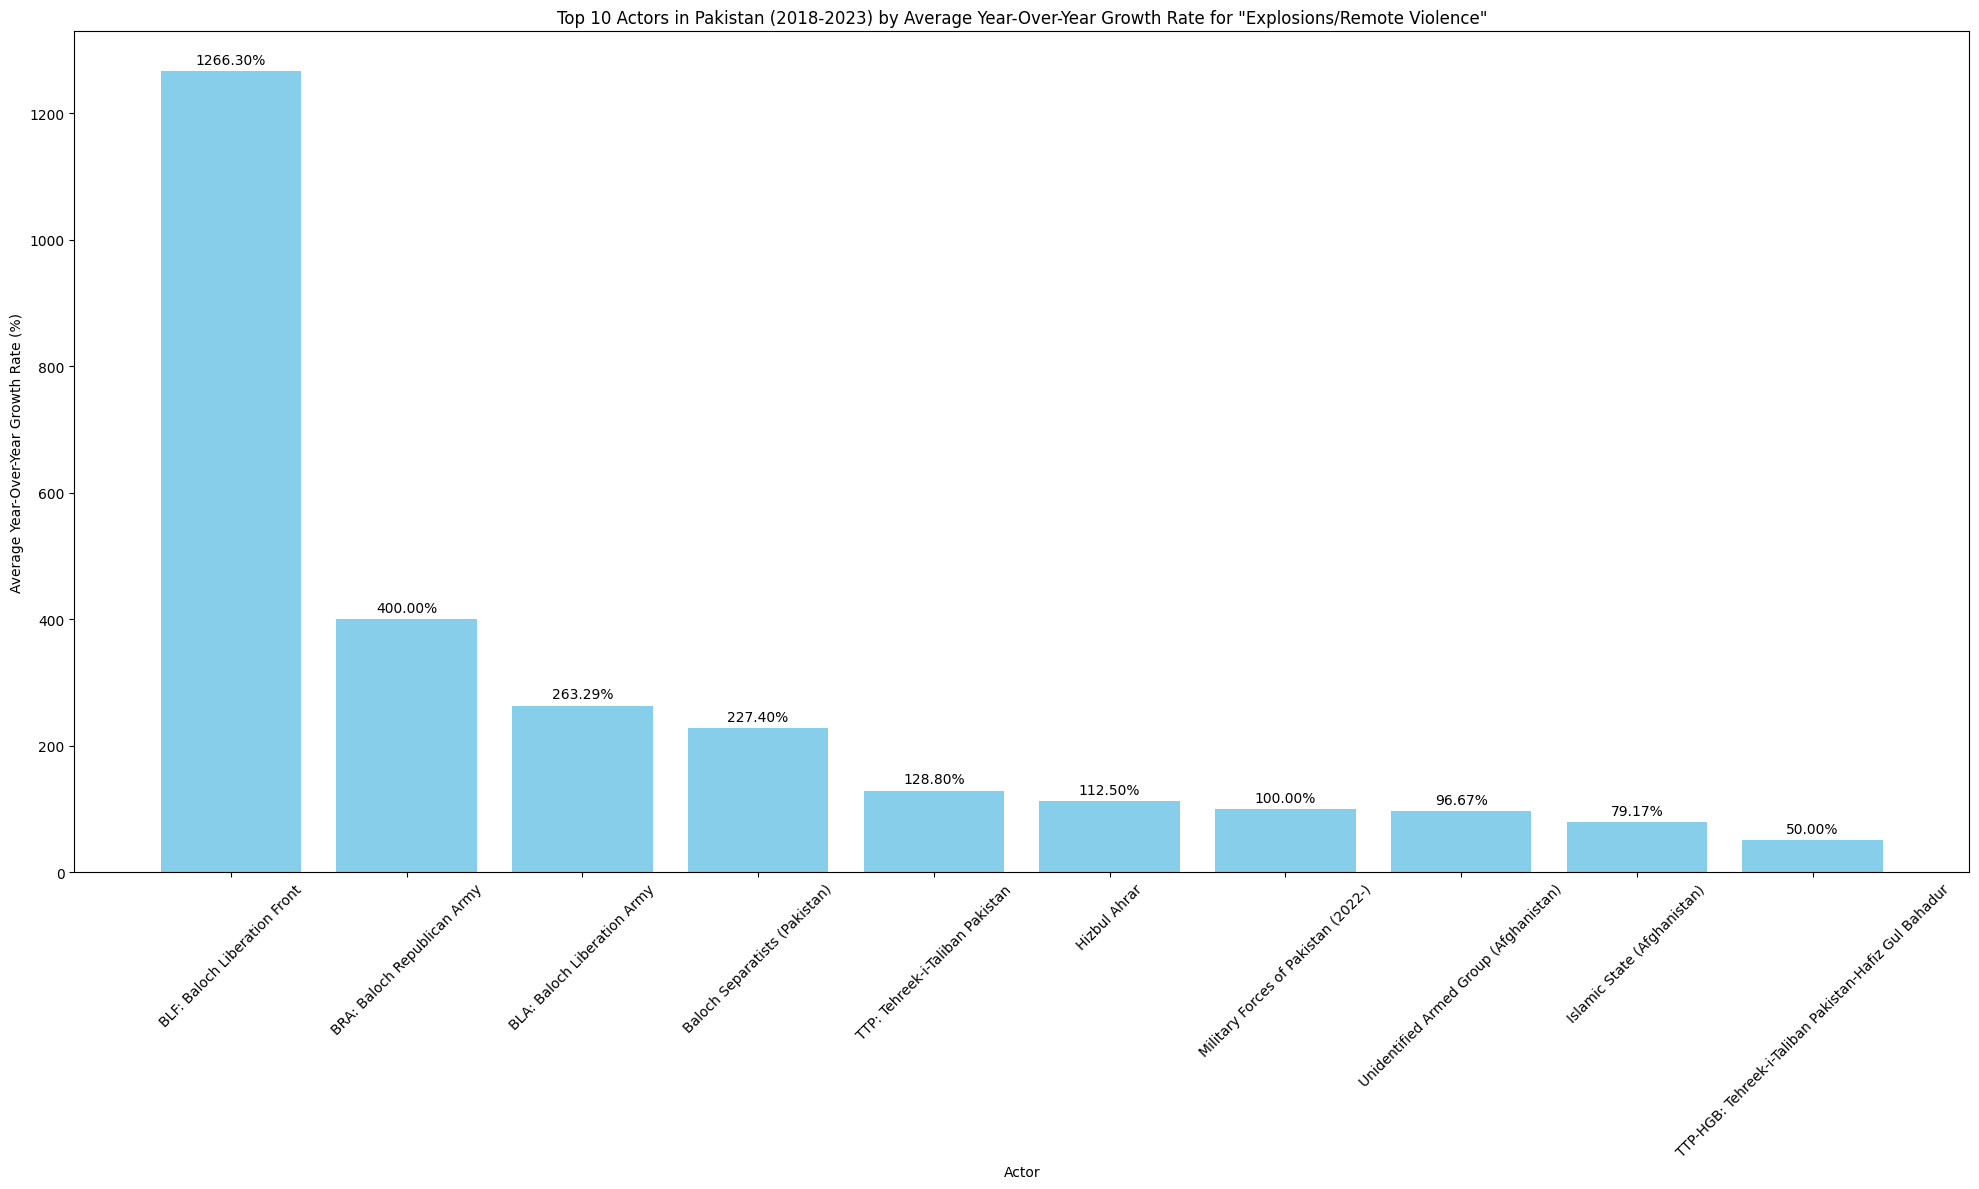

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/My Drive/Conflict_data/ACLED/asia_conflict_data.csv'
df = pd.read_csv(file_path)

# Filter for Yemen, the years 2018-2023, and the event type 'Explosions/Remote Violence'
yemen_violence_data = df[(df['country'] == 'Pakistan') & (df['year'].between(2018, 2023)) & (df['event_type'] == 'Explosions/Remote violence')]

# Create a function to calculate year-over-year growth for a specific actor
def calculate_actor_growth_rate(df, actor):
    actor_data = df[df['actor1'] == actor]
    growth_rates = []
    years = sorted(actor_data['year'].unique())
    for i in range(len(years) - 1):
        year = years[i]
        next_year = years[i + 1]
        count_current_year = actor_data[actor_data['year'] == year].shape[0]
        count_next_year = actor_data[actor_data['year'] == next_year].shape[0]
        if count_current_year == 0:
            growth_rate = 0
        else:
            growth_rate = ((count_next_year - count_current_year) / count_current_year) * 100
        growth_rates.append(growth_rate)
    if growth_rates:
        average_growth_rate = sum(growth_rates) / len(growth_rates)
    else:
        average_growth_rate = 0
    return average_growth_rate

# Calculate the average year-over-year growth rate for each actor
actor_growth_rates = {}
for actor in yemen_violence_data['actor1'].unique():
    avg_growth_rate = calculate_actor_growth_rate(yemen_violence_data, actor)
    actor_growth_rates[actor] = avg_growth_rate

# Convert to a DataFrame and ensure numeric type for sorting
actor_growth_rates_df = pd.DataFrame(list(actor_growth_rates.items()), columns=['Actor', 'Average Year-Over-Year Growth Rate'])
actor_growth_rates_df['Average Year-Over-Year Growth Rate'] = pd.to_numeric(actor_growth_rates_df['Average Year-Over-Year Growth Rate'], errors='coerce')

# Sort by the highest average growth rate and get the top 5 actors
top_10_actors_growth = actor_growth_rates_df.nlargest(10, 'Average Year-Over-Year Growth Rate')

# Print the top 5 actors with the highest average year-over-year growth rates
print("Top 10 Actors in Yemen (2018-2023) by Average Year-Over-Year Growth Rate for 'Explosions/Remote Violence':")
for index, row in top_10_actors_growth.iterrows():
    print(f"{row['Actor']}: {row['Average Year-Over-Year Growth Rate']:.2f}%")

# Plot the data
plt.figure(figsize=(20, 12))
bars = plt.bar(top_10_actors_growth['Actor'], top_10_actors_growth['Average Year-Over-Year Growth Rate'], color='skyblue')

# Annotate the bars with the average growth rate
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

plt.title('Top 10 Actors in Pakistan (2018-2023) by Average Year-Over-Year Growth Rate for "Explosions/Remote Violence"')
plt.xlabel('Actor')
plt.ylabel('Average Year-Over-Year Growth Rate (%)')
plt.tight_layout()

# Show the plot
plt.show()

### Further Analysis on 'BLF: Baloch Liberation Front'

<ipython-input-9-13f18b83f64a>:6: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


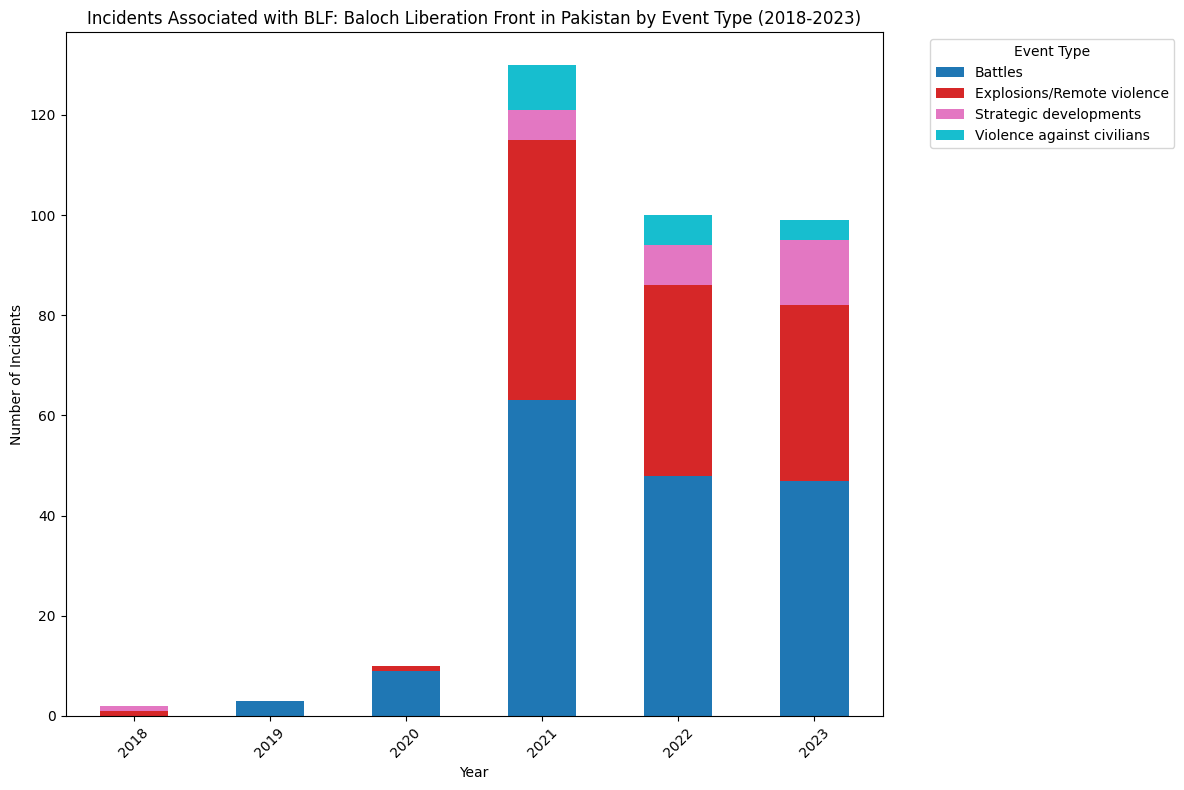

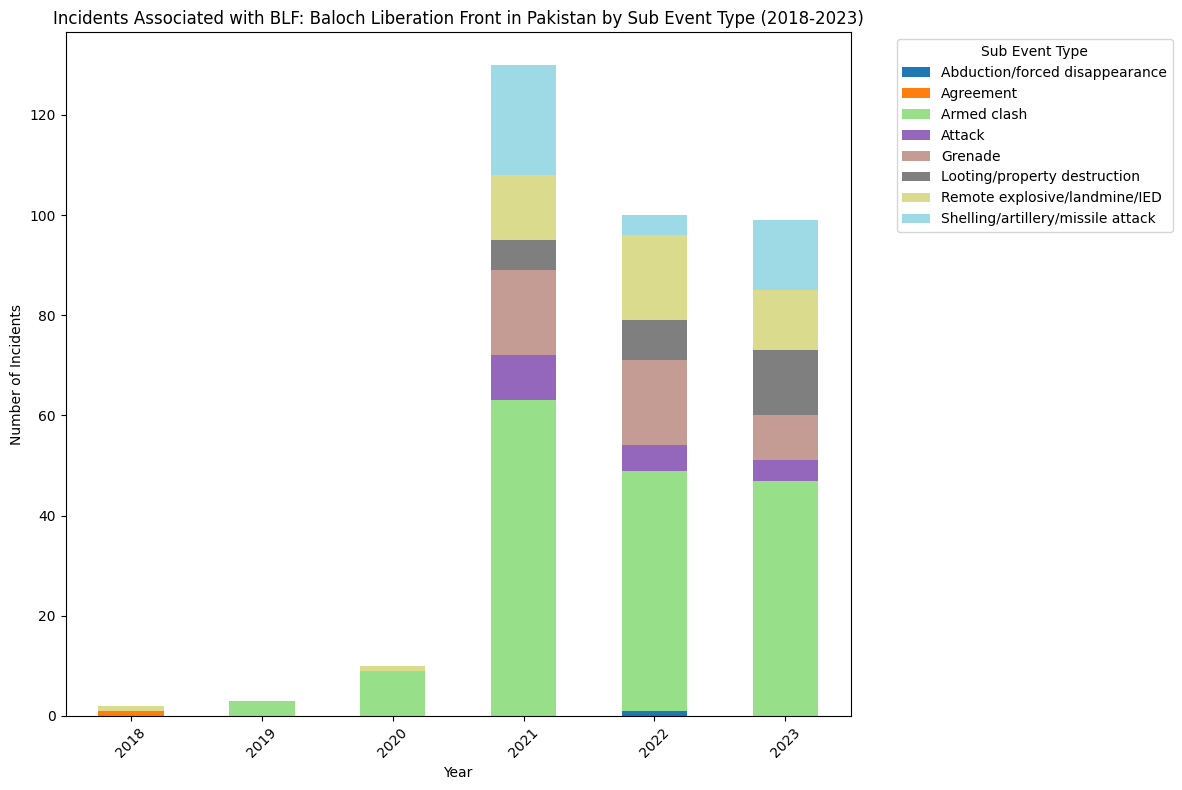

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/My Drive/Conflict_data/ACLED/asia_conflict_data.csv'
df = pd.read_csv(file_path)

# Filter for Yemen, the actor 'Giants Brigades', and the years 2018-2023
giants_data = df[(df['actor1'] == 'BLF: Baloch Liberation Front') & (df['year'].between(2018, 2023))]

# Group by year and count the number of incidents for each event_type
incident_counts_by_event_type = giants_data.groupby(['year', 'event_type']).size().unstack(fill_value=0)

# Group by year and count the number of incidents for each sub_event_type
incident_counts_by_sub_event_type = giants_data.groupby(['year', 'sub_event_type']).size().unstack(fill_value=0)

# Create the first bar chart for event_type with a color palette
plt.figure(figsize=(12, 8))
incident_counts_by_event_type.plot(kind='bar', stacked=True, colormap='tab10', ax=plt.gca())

# Set the title and labels for event_type chart
plt.title('Incidents Associated with BLF: Baloch Liberation Front in Pakistan by Event Type (2018-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)

# Add legend for event_type chart
plt.legend(title='Event Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

# Show the first plot
plt.show()

# Create the second bar chart for sub_event_type with a color palette
plt.figure(figsize=(12, 8))
incident_counts_by_sub_event_type.plot(kind='bar', stacked=True, colormap='tab20', ax=plt.gca())

# Set the title and labels for sub_event_type chart
plt.title('Incidents Associated with BLF: Baloch Liberation Front in Pakistan by Sub Event Type (2018-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)

# Add legend for sub_event_type chart
plt.legend(title='Sub Event Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

# Show the second plot
plt.show()

In [10]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/My Drive/Conflict_data/ACLED/asia_conflict_data.csv'
df = pd.read_csv(file_path)

# Filter for Yemen, the actor 'BLF: Baloch Liberation Front', and the years 2018-2023
giants_data = df[(df['country'] == 'Pakistan') & (df['actor1'] == 'BLF: Baloch Liberation Front') & (df['year'].between(2018, 2023))]

# Function to find the highest 'event_type' for each year
def highest_event_type_per_year(df):
    print("Highest 'Event Type' for each year (2018-2023):")
    for year in range(2018, 2024):
        year_data = df[df['year'] == year]
        if not year_data.empty:
            highest_event_type = year_data['event_type'].value_counts().idxmax()
            event_count = year_data['event_type'].value_counts().max()
            print(f"{year}: {highest_event_type} with {event_count} incidents")
        else:
            print(f"{year}: No data available")

# Function to find the highest 'sub_event_type' for each year
def highest_sub_event_type_per_year(df):
    print("\nHighest 'Sub Event Type' for each year (2018-2023):")
    for year in range(2018, 2024):
        year_data = df[df['year'] == year]
        if not year_data.empty:
            highest_sub_event_type = year_data['sub_event_type'].value_counts().idxmax()
            sub_event_count = year_data['sub_event_type'].value_counts().max()
            print(f"{year}: {highest_sub_event_type} with {sub_event_count} incidents")
        else:
            print(f"{year}: No data available")

# Execute the functions
highest_event_type_per_year(giants_data)
highest_sub_event_type_per_year(giants_data)

<ipython-input-10-6a87a935f323>:5: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Highest 'Event Type' for each year (2018-2023):
2018: Explosions/Remote violence with 1 incidents
2019: Battles with 3 incidents
2020: Battles with 9 incidents
2021: Battles with 63 incidents
2022: Battles with 48 incidents
2023: Battles with 47 incidents

Highest 'Sub Event Type' for each year (2018-2023):
2018: Remote explosive/landmine/IED with 1 incidents
2019: Armed clash with 3 incidents
2020: Armed clash with 9 incidents
2021: Armed clash with 63 incidents
2022: Armed clash with 48 incidents
2023: Armed clash with 47 incidents


### Further Analysis of 'TTP: Tehreek-i-Taliban Pakistan'

<ipython-input-13-897381799deb>:6: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


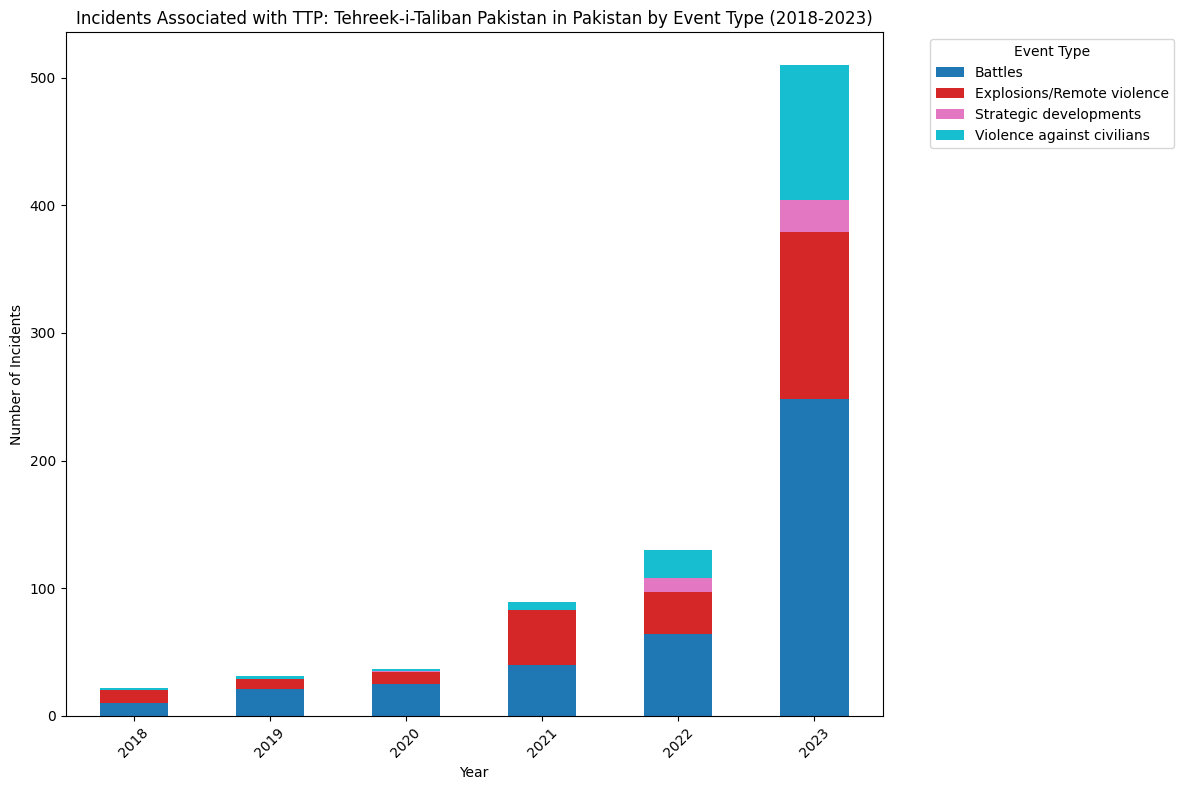

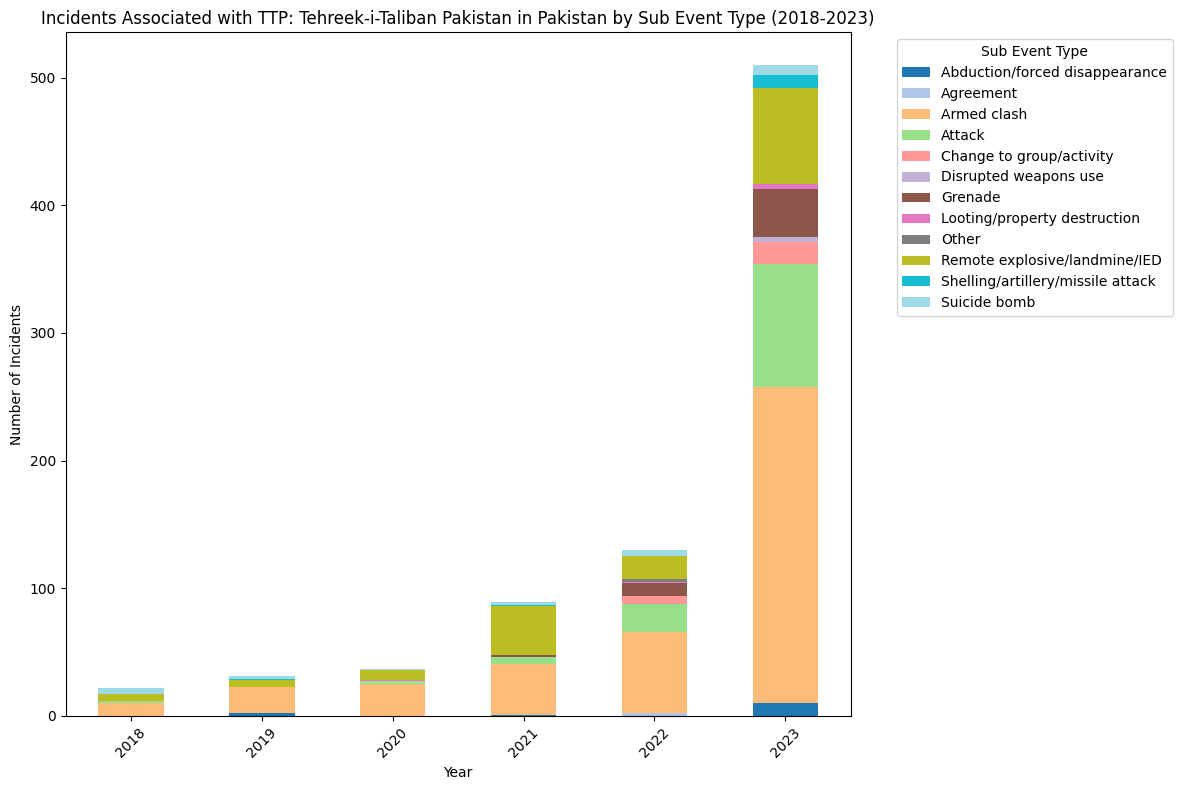

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/My Drive/Conflict_data/ACLED/asia_conflict_data.csv'
df = pd.read_csv(file_path)

# Filter for Yemen, the actor 'TTP: Tehreek-i-Taliban Pakistan', and the years 2018-2023
giants_data = df[(df['actor1'] == 'TTP: Tehreek-i-Taliban Pakistan') & (df['year'].between(2018, 2023))]

# Group by year and count the number of incidents for each event_type
incident_counts_by_event_type = giants_data.groupby(['year', 'event_type']).size().unstack(fill_value=0)

# Group by year and count the number of incidents for each sub_event_type
incident_counts_by_sub_event_type = giants_data.groupby(['year', 'sub_event_type']).size().unstack(fill_value=0)

# Create the first bar chart for event_type with a color palette
plt.figure(figsize=(12, 8))
incident_counts_by_event_type.plot(kind='bar', stacked=True, colormap='tab10', ax=plt.gca())

# Set the title and labels for event_type chart
plt.title('Incidents Associated with TTP: Tehreek-i-Taliban Pakistan in Pakistan by Event Type (2018-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)

# Add legend for event_type chart
plt.legend(title='Event Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

# Show the first plot
plt.show()

# Create the second bar chart for sub_event_type with a color palette
plt.figure(figsize=(12, 8))
incident_counts_by_sub_event_type.plot(kind='bar', stacked=True, colormap='tab20', ax=plt.gca())

# Set the title and labels for sub_event_type chart
plt.title('Incidents Associated with TTP: Tehreek-i-Taliban Pakistan in Pakistan by Sub Event Type (2018-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)

# Add legend for sub_event_type chart
plt.legend(title='Sub Event Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

# Show the second plot
plt.show()

In [14]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/My Drive/Conflict_data/ACLED/asia_conflict_data.csv'
df = pd.read_csv(file_path)

# Filter for Yemen, the actor 'TTP: Tehreek-i-Taliban Pakistan', and the years 2018-2023
giants_data = df[(df['country'] == 'Pakistan') & (df['actor1'] == 'TTP: Tehreek-i-Taliban Pakistan') & (df['year'].between(2018, 2023))]

# Function to find the highest 'event_type' for each year
def highest_event_type_per_year(df):
    print("Highest 'Event Type' for each year (2018-2023):")
    for year in range(2018, 2024):
        year_data = df[df['year'] == year]
        if not year_data.empty:
            highest_event_type = year_data['event_type'].value_counts().idxmax()
            event_count = year_data['event_type'].value_counts().max()
            print(f"{year}: {highest_event_type} with {event_count} incidents")
        else:
            print(f"{year}: No data available")

# Function to find the highest 'sub_event_type' for each year
def highest_sub_event_type_per_year(df):
    print("\nHighest 'Sub Event Type' for each year (2018-2023):")
    for year in range(2018, 2024):
        year_data = df[df['year'] == year]
        if not year_data.empty:
            highest_sub_event_type = year_data['sub_event_type'].value_counts().idxmax()
            sub_event_count = year_data['sub_event_type'].value_counts().max()
            print(f"{year}: {highest_sub_event_type} with {sub_event_count} incidents")
        else:
            print(f"{year}: No data available")

# Execute the functions
highest_event_type_per_year(giants_data)
highest_sub_event_type_per_year(giants_data)

<ipython-input-14-e4a7057784c6>:5: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Highest 'Event Type' for each year (2018-2023):
2018: Explosions/Remote violence with 10 incidents
2019: Battles with 21 incidents
2020: Battles with 25 incidents
2021: Explosions/Remote violence with 43 incidents
2022: Battles with 64 incidents
2023: Battles with 248 incidents

Highest 'Sub Event Type' for each year (2018-2023):
2018: Armed clash with 7 incidents
2019: Armed clash with 21 incidents
2020: Armed clash with 25 incidents
2021: Armed clash with 40 incidents
2022: Armed clash with 64 incidents
2023: Armed clash with 248 incidents
